# Plotting of Data

Please note: The data from thousands of simulations is in two cells at the end of this notebook.  You'll need to run those cells before using the plotAccuracies method defined in the second cell below.  Uncomment the code in the plot cell to save the files to your hard drive.  Leave them commented to just view the plots in the notebook.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
def plotAccuracies(accuracies, p = 21/26, n = 10000, z = 3.265,
                  title = "Average Accuracy of Fridge Locations by KNN Classifier",
                  allLabels = False, best = True, moderate = True, worst = False,
                  a = 0.1,legendoffset = False):
    error = z*np.sqrt(p*(1-p)/n)
    X = np.linspace(1,len(accuracies[0][1]),num=3)
    YNaive = [21/26 for x in X]
    YNaiveLow = [y - error for y in YNaive]
    YNaiveHi = [y + error for y in YNaive]

    fig, ax = plt.subplots(figsize = (9,6))
    ax.plot(X,YNaive,color = 'blue', label = 'Always No Fridge Classifier')
    ax.plot(X,YNaiveLow, color = 'grey',alpha = 0.25, label = '99% Confidence Interval')
    ax.plot(X,YNaiveHi, color = 'grey',alpha = 0.25)

    ax.fill_between(X, YNaiveLow, YNaiveHi,color = 'grey',alpha = 0.25)
    ax.set_xlabel("K value for KNN")
    ax.set_ylabel("Average Accuracy Over "+str(n)+" Trials")
    ax.set_title(title)
    
    if allLabels == True:
        for tup in accuracies:
            ax.plot(np.arange(1,len(tup[1])+1),tup[1],label = tup[0])
    else:
        for tup in accuracies:
            if max(tup[1])>21/26+error and best == True:
                ax.plot(np.arange(1,len(tup[1])+1),tup[1],label = tup[0])
            elif max(tup[1])>21/26 and moderate == True:
                ax.plot(np.arange(1,len(tup[1])+1),tup[1],color = 'orange',alpha= a)
            elif worst == True:
                ax.plot(np.arange(1,len(tup[1])+1),tup[1],color = 'purple',alpha= a/2)  
    plt.ylim([0.6,.9])
    
    if legendoffset:
        ax.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))
    else:
        plt.legend()
    return fig

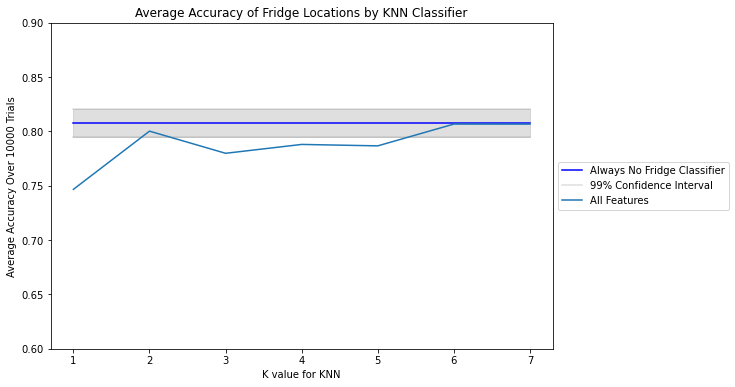

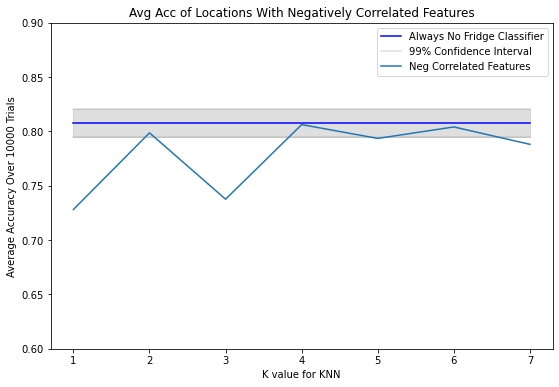

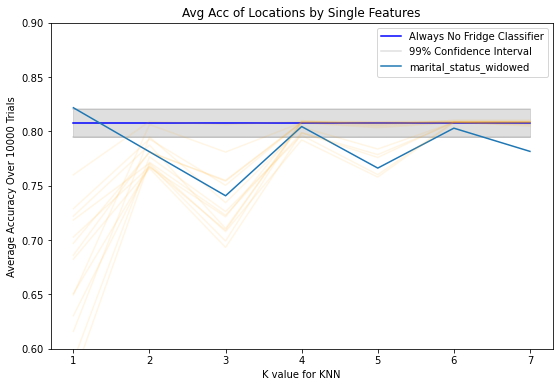

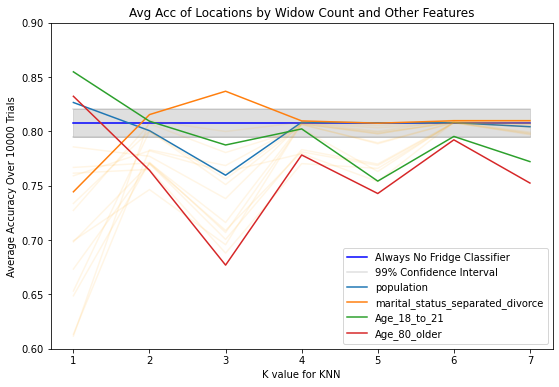

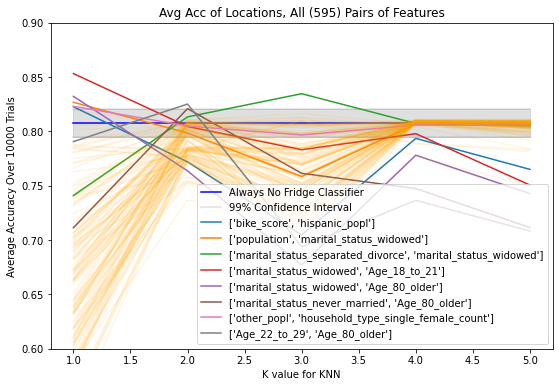

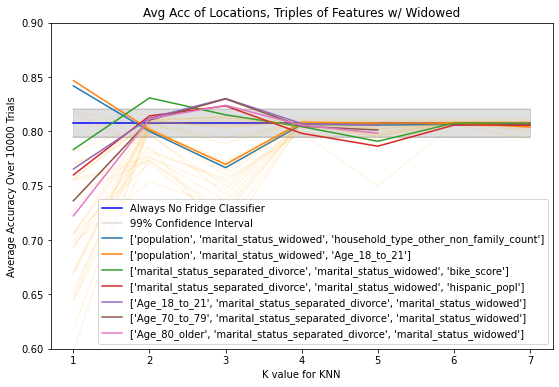

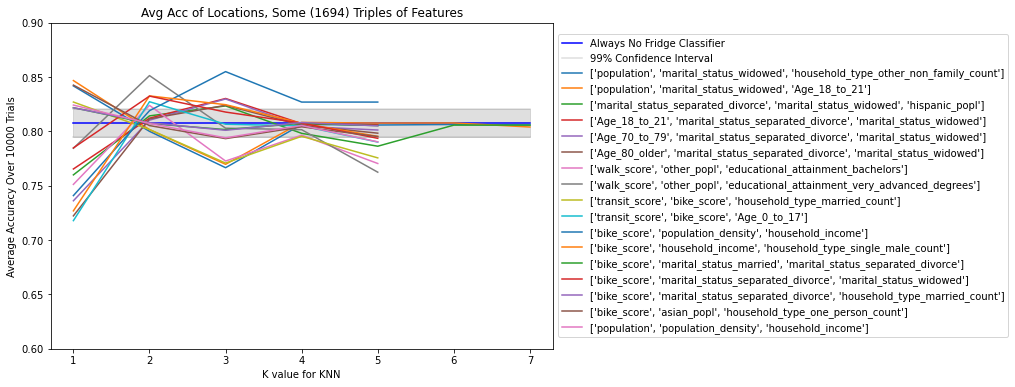

In [11]:
plotAllFeatures = plotAccuracies(AllFeatures,allLabels=True,legendoffset = True)
#plotAllFeatures.savefig('AllFeatures.png')
plotNegCorrFeatures = plotAccuracies(NegCorrFeatures,allLabels = True,title = 'Avg Acc of Locations With Negatively Correlated Features')
#plotNegCorrFeatures.savefig('NegCorrFeatures.png')
plotSingFeatures = plotAccuracies(OneFeatureAcc,title = 'Avg Acc of Locations by Single Features')
#plotSingFeatures.savefig('SingFeatures.png')
plotTwoWidowFeatures = plotAccuracies(TwoFeatureWidowAcc,title = 'Avg Acc of Locations by Widow Count and Other Features')
#plotTwoWidowFeatures.savefig('TwoWidowFeatures.png')
plotTwoFeatures = plotAccuracies(twoFeatAcc,title = 'Avg Acc of Locations, All (595) Pairs of Features')
#plotTwoFeatures.savefig('TwoFeatures.png')
plotSomeThreeFeatures = plotAccuracies(threeFeatWidAcc, title = 'Avg Acc of Locations, Triples of Features w/ Widowed')
#plotSomeThreeFeatures.savefig('SomeThreeFeatures.png')
plotMoreThreeFeatures = plotAccuracies(threeFeatAcc, moderate = False, title = "Avg Acc of Locations, Some (1694) Triples of Features",legendoffset = True)
#plotMoreThreeFeatures.savefig('MoreThreeFeatures.png')

# Data Sets to Plot
RUN THESE CELLS PRIOR TO PLOTTING

In [6]:
AllFeatures = [('All Features', [0.7466684, 0.8001966, 0.77983 , 0.787979 , 0.7866636, 0.8066917,0.8066583])]

NegCorrFeatures = [('Neg Correlated Features', [0.7281158, 0.7986387, 0.7375997, 0.8062174, 0.7935102, 0.8040666,0.7880569])]

OneFeatureAcc = [('walk_score',[0.6509122, 0.7671685, 0.7214234, 0.8085579, 0.8068734, 0.8085913, 0.8085913]),
 ('transit_score',[0.6160746, 0.7947642, 0.7344571, 0.8037574, 0.7837526, 0.808222, 0.8064051]),
 ('bike_score',[0.7288945, 0.7929343, 0.7503872, 0.8086733, 0.8073396, 0.80869, 0.80869 ]),
 ('population',[0.6860945, 0.7813198, 0.7541748, 0.8085542, 0.8072703, 0.8086711, 0.8086711]),
 ('population_density',[0.7028268, 0.7675789, 0.7091578, 0.8086028, 0.8086028, 0.8086028, 0.8086028]),
 ('household_income',[0.676715, 0.7497539, 0.7531638, 0.7864604, 0.7864604, 0.8056257, 0.8056257]),
 ('marital_status_married',[0.6280753, 0.7673162, 0.7105415, 0.7946948, 0.768658, 0.8056404, 0.8056404]),
 ('marital_status_separated_divorce',[0.6417036, 0.7729272, 0.7156663, 0.7948103, 0.7668192, 0.8065385, 0.8065385]),
 ('marital_status_widowed',[0.8217051, 0.7812186, 0.7407637, 0.8044333, 0.7662144, 0.8029355, 0.7815889]),
 ('marital_status_never_married',[0.6119773, 0.7798558, 0.758144, 0.803539, 0.789274, 0.8062224, 0.8062224]),
 ('white_popl',[0.7371973, 0.794243, 0.7702136, 0.7666832, 0.7073938, 0.7565618, 0.732018 ]),
 ('hispanic_popl',[0.5649273, 0.7745926, 0.7280207, 0.806018, 0.7994687, 0.8073518, 0.8073518]),
 ('black_popl',[0.6065545, 0.8051548, 0.8020387, 0.8048878, 0.8008535, 0.8053547, 0.8052879]),
 ('asian_popl', [0.7214436, 0.7641661, 0.7334681, 0.784133, 0.7712348, 0.8044221, 0.7916877]),
 ('mixed_popl',[0.6825046, 0.7659883, 0.6932959, 0.7986606, 0.7760072, 0.8088599, 0.8088599]),
 ('other_popl', [0.6821239, 0.793742, 0.7394552, 0.8040367, 0.7747793, 0.8060376, 0.7990722]),
 ('food_stamps_total', [0.658937, 0.7954845, 0.754235, 0.7811676, 0.7686572, 0.8065247, 0.8058573]),
 ('educational_attainment_no_hs',[0.764309, 0.7920787, 0.7887475, 0.7585889, 0.7023264, 0.8049082, 0.7916443]),
 ('educational_attainment_bachelors',[0.5892503, 0.7765629, 0.726209, 0.7964626, 0.7601585, 0.808676, 0.8047745]),
 ('educational_attainment_very_advanced_degrees',[0.7220595, 0.787433, 0.710662, 0.8077509, 0.8034526, 0.8079008, 0.8062838]),
 ('household_type_married_count',[0.5735049, 0.7715943, 0.7229129, 0.7987767, 0.7786351, 0.8080398, 0.8080398]), 
 ('household_type_single_female_count',[0.5454419, 0.772229, 0.715956, 0.8073055, 0.8073055, 0.8073055, 0.8073055]),
 ('household_type_single_male_count', [0.6928306, 0.7805689, 0.7770809, 0.7793984, 0.7649709, 0.8060505, 0.8060505]),
 ('household_type_one_person_count',[0.6348738, 0.789599, 0.7243775, 0.8060736, 0.8060736, 0.8060736, 0.8060736]),
 ('household_type_other_non_family_count',[0.546691, 0.7939988, 0.7348407, 0.8055245, 0.7994257, 0.8063079, 0.8063079]),
 ('household_type_with_children',[0.760076, 0.8090728, 0.8062739, 0.8092061, 0.8088063, 0.8092061, 0.8092061]),
 ('Age_0_to_17',[0.7338252, 0.8045905, 0.7861012, 0.8067887, 0.8057885, 0.8067887, 0.8067887]),
 ('Age_18_to_21',[0.604907, 0.8041539, 0.7697384, 0.806587, 0.8054368, 0.8066371, 0.8066371]),
 ('Age_22_to_29',[0.7184479, 0.7707252, 0.7077774, 0.7921083, 0.7579635, 0.8081539, 0.8081539]),
 ('Age_30_to_39', [0.6326173, 0.7552652, 0.724951, 0.8068717, 0.8046552, 0.8069882, 0.8069882]),
 ('Age_40_to_49', [0.6634629, 0.7711718, 0.7009421, 0.8065723, 0.7974425, 0.8067537, 0.801468 ]),
 ('Age_50_to_59',[0.6496647, 0.8062738, 0.7809527, 0.8080565, 0.8048416, 0.8082898, 0.8082898]),
 ('Age_60_to_69',[0.6971185, 0.7808019, 0.7549475, 0.8081682, 0.8079178, 0.8081682, 0.8081682]),
 ('Age_70_to_79',[0.6304788, 0.7692242, 0.6991239, 0.8099334, 0.8056509, 0.8102666, 0.8102666]),
 ('Age_80_older', [0.7137147, 0.7565584, 0.723322, 0.775523, 0.727605, 0.7972365, 0.7779503])]

TwoFeatureWidowAcc = [('walk_score',[0.6824518, 0.7792772, 0.7394886, 0.7809182, 0.7371114, 0.8048549, 0.7926203]),
 ('transit_score',[0.7677084, 0.7626918, 0.6996674, 0.7645109, 0.7309317, 0.8051886, 0.7919909]),
 ('bike_score',[0.6687614, 0.7625393, 0.700315,  0.7998633, 0.77356, 0.8048613, 0.8023266]),
 ('population',[0.8265467, 0.8006229, 0.7596671, 0.8083881, 0.8078547, 0.8079714, 0.8042707]),
 ('population_density',[0.766825,  0.770942,  0.7161752, 0.8073691, 0.7978886, 0.808302,  0.8064345]),
 ('household_income',[0.6932502, 0.7578114, 0.7490983, 0.7956905, 0.7607238, 0.8039709, 0.7847759]),
 ('marital_status_married',[0.6487423, 0.7716386, 0.7069732, 0.8066677, 0.788575,  0.8081171, 0.7982846]),
 ('marital_status_separated_divorce',[0.7443983, 0.8154204, 0.8369125, 0.8096186, 0.807518,  0.8097688, 0.8097688]),
 ('marital_status_never_married',[0.7336831, 0.8002601, 0.7510807, 0.8060583, 0.7895292, 0.8080572, 0.8058728]),
 ('white_popl', [0.7615294, 0.7650439, 0.6880262, 0.7703349, 0.7659405, 0.8077849, 0.7977227]),
 ('hispanic_popl',[0.7272797, 0.8069718, 0.7805247, 0.8023554, 0.7631092, 0.8086367, 0.8070188]),
 ('black_popl',[0.6549865, 0.7806235, 0.7434181, 0.8059563, 0.7932109, 0.8075392, 0.806638]),
 ('asian_popl', [0.677818,  0.7448414, 0.6743001, 0.7528457, 0.7142259, 0.7967398, 0.7692652]),
 ('mixed_popl',[0.7857241, 0.7770905, 0.7381555, 0.8077188, 0.8054517, 0.8078189, 0.8077189]),
 ('other_popl',  [0.6469379, 0.772407,  0.7122339, 0.7908628, 0.7666059, 0.8061874, 0.7977854]),
 ('food_stamps_total',[0.7591304, 0.7821184, 0.7626192, 0.7795297, 0.753797,  0.808499,  0.7992271]),
 ('educational_attainment_no_hs', [0.7267162, 0.7676463, 0.7258505, 0.7844153, 0.7505159, 0.7961178, 0.7596687]),
 ('educational_attainment_bachelors',[0.673374,  0.7704138, 0.7006111, 0.7832145, 0.7699053, 0.8080866, 0.7969524]),
 ('educational_attainment_very_advanced_degrees', [0.6734449, 0.7661934, 0.7193915, 0.7900401, 0.7850955, 0.8070184, 0.7938672]),
 ('household_type_married_count',[0.665724,  0.7765219, 0.7421002, 0.805718,  0.7955531, 0.8059356, 0.7977204]), 
 ('household_type_single_female_count',[0.7173083, 0.8009966, 0.7640216, 0.8067427, 0.8030257, 0.8072933, 0.8072933]),
 ('household_type_single_male_count', [0.613467,  0.783057,  0.768567,  0.806542,  0.7977771, 0.8088092, 0.807626 ]),
 ('household_type_one_person_count',[0.6666025, 0.8045018, 0.7857436, 0.8058009, 0.8057009, 0.8058176, 0.8058176]),
 ('household_type_other_non_family_count',[0.7973926, 0.7804857, 0.7577529, 0.8064895, 0.7969578, 0.8076057, 0.8070718]),
 ('household_type_with_children',[0.6117551, 0.8101354, 0.7998761, 0.8083519, 0.8000175, 0.8106684, 0.8106684]),
 ('Age_0_to_17',[0.6531886, 0.8000113, 0.7562875, 0.8068739, 0.7991271, 0.8080066, 0.8075557]),
 ('Age_18_to_21',[0.8547526, 0.8093347, 0.7874618, 0.8022702, 0.7542455, 0.7953351, 0.7721762]),
 ('Age_22_to_29', [0.7947798, 0.798943,  0.767965,  0.8050245, 0.804708,  0.8050078, 0.8046071]),
 ('Age_30_to_39', [0.6993614, 0.7464583, 0.6957627, 0.8074371, 0.8033541, 0.8077037, 0.8075868]),
 ('Age_40_to_49', [0.6984101, 0.7700823, 0.7088582, 0.7811363, 0.768625,  0.8077708, 0.8038686]),
 ('Age_50_to_59',[0.7214776, 0.7497302, 0.7170649, 0.8034403, 0.7948947, 0.8045565, 0.802639 ]),
 ('Age_60_to_69',[0.8056032, 0.8043735, 0.7755438, 0.8063735, 0.8029563, 0.80664, 0.8046728]),
 ('Age_70_to_79', [0.7392703, 0.7971762, 0.7249411, 0.7946878, 0.7531363, 0.8072692, 0.8000047]),
 ('Age_80_older', [0.8322576, 0.7641847, 0.6769818, 0.7782654, 0.7428313, 0.792204,  0.7524549])]

twoFeatAcc = [[['walk_score', 'transit_score'], [0.7356174, 0.7741913, 0.7346872, 0.808923 , 0.8080064]],[['walk_score', 'bike_score'], [0.6457767, 0.7752492, 0.7301865, 0.8079561, 0.803722 ]],[['walk_score', 'population'], [0.6772704, 0.7882817, 0.6991109, 0.8078567, 0.804175 ]],[['walk_score', 'population_density'], [0.7662685, 0.8077052, 0.7980249, 0.8087058, 0.8079889]],[['walk_score', 'household_income'], [0.747067 , 0.7698794, 0.72069  , 0.7711389, 0.7708721]],[['walk_score', 'marital_status_married'], [0.6840775, 0.7901508, 0.728998 , 0.8064259, 0.8059426]],[['walk_score', 'marital_status_separated_divorce'], [0.6646486, 0.7834854, 0.766102 , 0.8095729, 0.8073897]],[['walk_score', 'marital_status_widowed'], [0.6828032, 0.7791244, 0.7387378, 0.7797664, 0.7373922]],[['walk_score', 'marital_status_never_married'], [0.6408125, 0.7723446, 0.7147255, 0.8085587, 0.8014241]],[['walk_score', 'white_popl'], [0.7093276, 0.7942318, 0.7376612, 0.7882682, 0.7559358]],[['walk_score', 'hispanic_popl'], [0.6952171, 0.8023546, 0.7687258, 0.8069681, 0.7874754]],[['walk_score', 'black_popl'], [0.7071475, 0.8009053, 0.7701756, 0.8078366, 0.8078366]],[['walk_score', 'asian_popl'], [0.5839828, 0.760898 , 0.6844002, 0.7915639, 0.7406082]],[['walk_score', 'mixed_popl'], [0.6131269, 0.7948105, 0.7125969, 0.8090558, 0.8087888]],[['walk_score', 'other_popl'], [0.6214636, 0.7575224, 0.7416871, 0.7977053, 0.7775987]],[['walk_score', 'food_stamps_total'], [0.6515834, 0.7573659, 0.7401129, 0.8063033, 0.8060031]],[['walk_score', 'educational_attainment_no_hs'], [0.6971215, 0.7727149, 0.7267783, 0.8081394, 0.8050567]],[['walk_score', 'educational_attainment_bachelors'], [0.7147497, 0.791062 , 0.7225697, 0.7838217, 0.7490538]],[['walk_score', 'educational_attainment_very_advanced_degrees'], [0.6717926, 0.7903813, 0.7291723, 0.7913301, 0.7686225]],[['walk_score', 'household_type_married_count'], [0.7457287, 0.7711098, 0.7329074, 0.8060218, 0.8052044]],[['walk_score', 'household_type_single_female_count'], [0.6388743, 0.7953505, 0.7517606, 0.8065585, 0.8054079]],[['walk_score', 'household_type_single_male_count'], [0.6193179, 0.7772777, 0.754974 , 0.8057575, 0.8055239]],[['walk_score', 'household_type_one_person_count'], [0.6949791, 0.7960336, 0.7419559, 0.8080434, 0.8078765]],[['walk_score', 'household_type_other_non_family_count'], [0.744479 , 0.7933609, 0.7238031, 0.8060866, 0.7997379]],[['walk_score', 'household_type_with_children'], [0.5799406, 0.8042694, 0.7929756, 0.8055036, 0.8054037]],[['walk_score', 'Age_0_to_17'], [0.6712448, 0.7823031, 0.7703468, 0.8079076, 0.8070738]],[['walk_score', 'Age_18_to_21'], [0.6022148, 0.7788685, 0.749471 , 0.8052044, 0.8026037]],[['walk_score', 'Age_22_to_29'], [0.6224944, 0.7525684, 0.7257745, 0.806923 , 0.8064056]],[['walk_score', 'Age_30_to_39'], [0.6495838, 0.7768047, 0.7258248, 0.8025589, 0.7813828]],[['walk_score', 'Age_40_to_49'], [0.5676698, 0.7896823, 0.7173485, 0.8054253, 0.8054086]],[['walk_score', 'Age_50_to_59'], [0.549613 , 0.8014732, 0.7569181, 0.8064384, 0.8062547]],[['walk_score', 'Age_60_to_69'], [0.6370679, 0.7871833, 0.7121911, 0.8052049, 0.8016886]],[['walk_score', 'Age_70_to_79'], [0.7836831, 0.7763566, 0.7237066, 0.8084206, 0.7919754]],[['walk_score', 'Age_80_older'], [0.6552419, 0.7621887, 0.6680722, 0.8067539, 0.7886738]],[['transit_score', 'bike_score'], [0.6569618, 0.80326  , 0.7754297, 0.8029583, 0.7898812]],[['transit_score', 'population'], [0.7477656, 0.7987614, 0.7625515, 0.8053747, 0.8028095]],[['transit_score', 'population_density'], [0.7773723, 0.8073383, 0.8018572, 0.8076216, 0.8076216]],[['transit_score', 'household_income'], [0.7265927, 0.781473 , 0.7757106, 0.8060907, 0.8019724]],[['transit_score', 'marital_status_married'], [0.6895689, 0.8042709, 0.7887647, 0.8050375, 0.7984718]],[['transit_score', 'marital_status_separated_divorce'], [0.6642756, 0.7804872, 0.7772397, 0.804738 , 0.7985224]],[['transit_score', 'marital_status_widowed'], [0.7670904, 0.7608812, 0.6979906, 0.7638844, 0.7313019]],[['transit_score', 'marital_status_never_married'], [0.6422053, 0.7973833, 0.7545086, 0.8072246, 0.8001584]],[['transit_score', 'white_popl'], [0.6957002, 0.784884 , 0.7626031, 0.8099686, 0.8024035]],[['transit_score', 'hispanic_popl'], [0.7273576, 0.8029058, 0.7729762, 0.8038586, 0.7797776]],[['transit_score', 'black_popl'], [0.7389176, 0.7661785, 0.7448439, 0.7875284, 0.7837826]],[['transit_score', 'asian_popl'], [0.6768771, 0.7230106, 0.6746898, 0.781446 , 0.707743 ]],[['transit_score', 'mixed_popl'], [0.6752239, 0.7984074, 0.7615384, 0.8048722, 0.8019398]],[['transit_score', 'other_popl'], [0.5676747, 0.7768948, 0.7342093, 0.8047048, 0.7791491]],[['transit_score', 'food_stamps_total'], [0.6716856, 0.7965763, 0.7490278, 0.8084858, 0.8082855]],[['transit_score', 'educational_attainment_no_hs'], [0.6315045, 0.7702138, 0.7180715, 0.799306 , 0.7847804]],[['transit_score', 'educational_attainment_bachelors'], [0.6665535, 0.8023575, 0.772365 , 0.8055061, 0.7909457]],[['transit_score', 'educational_attainment_very_advanced_degrees'], [0.6603936, 0.7768883, 0.730853 , 0.8029586, 0.7857651]],[['transit_score', 'household_type_married_count'], [0.6931325, 0.8072523, 0.8012539, 0.806919 , 0.8012695]],[['transit_score', 'household_type_single_female_count'], [0.6633316, 0.8011889, 0.7576242, 0.7922772, 0.7690849]],[['transit_score', 'household_type_single_male_count'], [0.7334608, 0.7913014, 0.7358014, 0.8044558, 0.7916092]],[['transit_score', 'household_type_one_person_count'], [0.739998 , 0.8012612, 0.7737985, 0.8072594, 0.8072594]],[['transit_score', 'household_type_other_non_family_count'], [0.6721659, 0.8002379, 0.7710576, 0.8060847, 0.8024194]],[['transit_score', 'household_type_with_children'], [0.6177031, 0.8017904, 0.781811 , 0.8050351, 0.7963521]],[['transit_score', 'Age_0_to_17'], [0.6346104, 0.7792234, 0.7771834, 0.7852093, 0.7815129]],[['transit_score', 'Age_18_to_21'], [0.5765055, 0.784022 , 0.7577757, 0.8032603, 0.7726961]],[['transit_score', 'Age_22_to_29'], [0.7289271, 0.7823685, 0.7794533, 0.8068869, 0.8053207]],[['transit_score', 'Age_30_to_39'], [0.64375  , 0.7825032, 0.7459794, 0.8089857, 0.8056015]],[['transit_score', 'Age_40_to_49'], [0.6302915, 0.8080529, 0.788975 , 0.8044384, 0.7838301]],[['transit_score', 'Age_50_to_59'], [0.6561608, 0.8051546, 0.7882637, 0.8062709, 0.8062542]],[['transit_score', 'Age_60_to_69'], [0.7146269, 0.8010574, 0.7642064, 0.8074542, 0.8071372]],[['transit_score', 'Age_70_to_79'], [0.6462393, 0.7851557, 0.7982689, 0.8005274, 0.7751421]],[['transit_score', 'Age_80_older'], [0.5972441, 0.7802581, 0.7427869, 0.7986591, 0.7742781]],[['bike_score', 'population'], [0.7685992, 0.7957288, 0.7412373, 0.8059055, 0.800373 ]],[['bike_score', 'population_density'], [0.7402193, 0.8077388, 0.809656 , 0.8075887, 0.8066545]],[['bike_score', 'household_income'], [0.7197079, 0.7684984, 0.6996819, 0.8056752, 0.802007 ]],[['bike_score', 'marital_status_married'], [0.6650637, 0.802207 , 0.7666877, 0.8004028, 0.7798826]],[['bike_score', 'marital_status_separated_divorce'], [0.7210101, 0.7953625, 0.7275557, 0.7842777, 0.7679373]],[['bike_score', 'marital_status_widowed'], [0.6699591, 0.765419 , 0.7035639, 0.8007414, 0.7753889]],[['bike_score', 'marital_status_never_married'], [0.7277576, 0.8051718, 0.7876838, 0.8016743, 0.7799023]],[['bike_score', 'white_popl'], [0.6386065, 0.7765608, 0.7422714, 0.8079052, 0.8074221]],[['bike_score', 'hispanic_popl'], [0.8226491, 0.771908 , 0.7046546, 0.7935223, 0.76503  ]],[['bike_score', 'black_popl'], [0.7011174, 0.7983467, 0.7401043, 0.7942146, 0.7662666]],[['bike_score', 'asian_popl'], [0.6795438, 0.7727762, 0.7256686, 0.8067373, 0.7937751]],[['bike_score', 'mixed_popl'], [0.6122509, 0.7768449, 0.7469927, 0.8075551, 0.8024889]],[['bike_score', 'other_popl'], [0.6183102, 0.7524017, 0.7091594, 0.8077408, 0.8074407]],[['bike_score', 'food_stamps_total'], [0.7195092, 0.7753108, 0.7439922, 0.805791 , 0.7972934]],[['bike_score', 'educational_attainment_no_hs'], [0.6386044, 0.7822877, 0.6817786, 0.7998251, 0.7680612]],[['bike_score', 'educational_attainment_bachelors'], [0.6930315, 0.7816733, 0.7598221, 0.8084038, 0.8081205]],[['bike_score', 'educational_attainment_very_advanced_degrees'], [0.6764084, 0.7960431, 0.7416448, 0.8058549, 0.8055715]],[['bike_score', 'household_type_married_count'], [0.6971035, 0.8026072, 0.7768934, 0.8059205, 0.7933751]],[['bike_score', 'household_type_single_female_count'], [0.7724008, 0.799512 , 0.7507802, 0.7985247, 0.7614404]],[['bike_score', 'household_type_single_male_count'], [0.7231856, 0.783104 , 0.7818552, 0.8054074, 0.7963908]],[['bike_score', 'household_type_one_person_count'], [0.6658309, 0.8001449, 0.770482 , 0.806592 , 0.806425 ]],[['bike_score', 'household_type_other_non_family_count'], [0.7058058, 0.8045383, 0.7711097, 0.8106182, 0.8105849]],[['bike_score', 'household_type_with_children'], [0.7730629, 0.8053691, 0.786879 , 0.8053838, 0.7963523]],[['bike_score', 'Age_0_to_17'], [0.6663774, 0.7871185, 0.8016993, 0.7877225, 0.783793 ]],[['bike_score', 'Age_18_to_21'], [0.6858461, 0.7490615, 0.7070116, 0.8071211, 0.7893788]],[['bike_score', 'Age_22_to_29'], [0.7495771, 0.8014579, 0.7738245, 0.8042232, 0.8042232]],[['bike_score', 'Age_30_to_39'], [0.6485967, 0.7977731, 0.7477682, 0.7988518, 0.7889039]],[['bike_score', 'Age_40_to_49'], [0.7233772, 0.8021406, 0.7567536, 0.7957747, 0.7729096]],[['bike_score', 'Age_50_to_59'], [0.702426 , 0.7967133, 0.7456179, 0.7968582, 0.7809306]],[['bike_score', 'Age_60_to_69'], [0.6572461, 0.8002401, 0.7622196, 0.80652  , 0.8020055]],[['bike_score', 'Age_70_to_79'], [0.6137013, 0.7866466, 0.6989156, 0.8034865, 0.7873102]],[['bike_score', 'Age_80_older'], [0.6518921, 0.776161 , 0.7378275, 0.803527 , 0.7898455]],[['population', 'population_density'], [0.6828542, 0.774306 , 0.7347691, 0.8091508, 0.8068516]],[['population', 'household_income'], [0.635668 , 0.7802533, 0.7434358, 0.8068013, 0.7984684]],[['population', 'marital_status_married'], [0.6926051, 0.7861487, 0.7852679, 0.8088527, 0.7955874]],[['population', 'marital_status_separated_divorce'], [0.6549496, 0.7695454, 0.7186918, 0.8024854, 0.7911392]],[['population', 'marital_status_widowed'], [0.8267457, 0.7984726, 0.7584696, 0.8067536, 0.8064537]],[['population', 'marital_status_never_married'], [0.7161825, 0.8059025, 0.7763378, 0.8067366, 0.7947747]],[['population', 'white_popl'], [0.6278366, 0.7813345, 0.7517031, 0.7992027, 0.7836085]],[['population', 'hispanic_popl'], [0.6599245, 0.7566003, 0.7276176, 0.8073233, 0.8062231]],[['population', 'black_popl'], [0.6042159, 0.7790373, 0.7508648, 0.8085516, 0.8085349]],[['population', 'asian_popl'], [0.6863725, 0.7787934, 0.7482061, 0.8078052, 0.7998732]],[['population', 'mixed_popl'], [0.5917488, 0.7742632, 0.7409747, 0.7980057, 0.7851249]],[['population', 'other_popl'], [0.7524778, 0.8059379, 0.8129044, 0.8049875, 0.8025376]],[['population', 'food_stamps_total'], [0.6620855, 0.7826068, 0.7603071, 0.7970407, 0.7682203]],[['population', 'educational_attainment_no_hs'], [0.7048913, 0.795963 , 0.7441786, 0.8072217, 0.8015751]],[['population', 'educational_attainment_bachelors'], [0.6326046, 0.8041733, 0.7682334, 0.7963233, 0.7676546]],[['population', 'educational_attainment_very_advanced_degrees'], [0.6501989, 0.7791361, 0.7577041, 0.8019864, 0.7834415]],[['population', 'household_type_married_count'], [0.7252656, 0.7888318, 0.8066274, 0.789854 , 0.789854 ]],[['population', 'household_type_single_female_count'], [0.6974859, 0.8058392, 0.7833693, 0.8078387, 0.8078387]],[['population', 'household_type_single_male_count'], [0.7188388, 0.7815739, 0.7737858, 0.7823653, 0.7622122]],[['population', 'household_type_one_person_count'], [0.7502884, 0.8031701, 0.7708797, 0.8092492, 0.8091825]],[['population', 'household_type_other_non_family_count'], [0.74899  , 0.8005754, 0.7604503, 0.8054723, 0.7947262]],[['population', 'household_type_with_children'], [0.763745 , 0.8046904, 0.7957451, 0.8056234, 0.8056234]],[['population', 'Age_0_to_17'], [0.6909402, 0.784202 , 0.7784882, 0.8079544, 0.8079544]],[['population', 'Age_18_to_21'], [0.6543956, 0.7798507, 0.7437137, 0.8043352, 0.7961188]],[['population', 'Age_22_to_29'], [0.7251541, 0.7760744, 0.7383899, 0.803904 , 0.7982204]],[['population', 'Age_30_to_39'], [0.7108342, 0.7990363, 0.7513233, 0.8071172, 0.8039351]],[['population', 'Age_40_to_49'], [0.6048616, 0.7994658, 0.7631921, 0.8073443, 0.806144 ]],[['population', 'Age_50_to_59'], [0.6374342, 0.8029429, 0.7591121, 0.8066399, 0.8040749]],[['population', 'Age_60_to_69'], [0.6527427, 0.7558453, 0.736953 , 0.8072358, 0.8070191]],[['population', 'Age_70_to_79'], [0.6831292, 0.7906299, 0.7285549, 0.7954403, 0.7811972]],[['population', 'Age_80_older'], [0.7210188, 0.7798402, 0.6806959, 0.774052 , 0.7413684]],[['population_density', 'household_income'], [0.7914061, 0.8069965, 0.8104317, 0.8055165, 0.7999642]],[['population_density', 'marital_status_married'], [0.6621883, 0.806062 , 0.7792106, 0.7975941, 0.7754054]],[['population_density', 'marital_status_separated_divorce'], [0.6738465, 0.8071857, 0.7866828, 0.8089849, 0.8089849]],[['population_density', 'marital_status_widowed'], [0.7681774, 0.7723441, 0.7151928, 0.8068418, 0.7983276]],[['population_density', 'marital_status_never_married'], [0.7382604, 0.7739714, 0.7344053, 0.8091515, 0.8087683]],[['population_density', 'white_popl'], [0.7806571, 0.7952263, 0.7237116, 0.8050546, 0.7962753]],[['population_density', 'hispanic_popl'], [0.6518108, 0.8075914, 0.7942954, 0.8086746, 0.8070251]],[['population_density', 'black_popl'], [0.7671804, 0.8054233, 0.80534  , 0.8054233, 0.8054233]],[['population_density', 'asian_popl'], [0.5991373, 0.7944781, 0.7029177, 0.8074688, 0.8043015]],[['population_density', 'mixed_popl'], [0.7810042, 0.8028029, 0.7585158, 0.8078351, 0.8078351]],[['population_density', 'other_popl'], [0.7139909, 0.7767249, 0.7256368, 0.8028919, 0.7772824]],[['population_density', 'food_stamps_total'], [0.819085 , 0.806207 , 0.8056737, 0.8062236, 0.8062236]],[['population_density', 'educational_attainment_no_hs'], [0.7926314, 0.8043057, 0.7824175, 0.803871 , 0.7958208]],[['population_density', 'educational_attainment_bachelors'], [0.7300364, 0.7714462, 0.728204 , 0.8065539, 0.7941968]],[['population_density', 'educational_attainment_very_advanced_degrees'], [0.7907903, 0.7694957, 0.6939204, 0.8039718, 0.7829452]],[['population_density', 'household_type_married_count'], [0.6913471, 0.8068216, 0.7966446, 0.8049033, 0.793606 ]],[['population_density', 'household_type_single_female_count'], [0.664361 , 0.8089046, 0.8032739, 0.8091713, 0.8091713]],[['population_density', 'household_type_single_male_count'], [0.7550282, 0.8006601, 0.7601909, 0.8061224, 0.7964918]],[['population_density', 'household_type_one_person_count'], [0.5892712, 0.7717438, 0.7155594, 0.8078861, 0.8078861]],[['population_density', 'household_type_other_non_family_count'], [0.6886974, 0.7699124, 0.7076756, 0.8067732, 0.8067232]],[['population_density', 'household_type_with_children'], [0.7152045, 0.8100169, 0.8036704, 0.8104665, 0.8104665]],[['population_density', 'Age_0_to_17'], [0.65845  , 0.8045733, 0.7939793, 0.8057725, 0.8057558]],[['population_density', 'Age_18_to_21'], [0.7108161, 0.7689418, 0.7211391, 0.8060017, 0.8059184]],[['population_density', 'Age_22_to_29'], [0.6628758, 0.7716279, 0.7151074, 0.8086548, 0.8086548]],[['population_density', 'Age_30_to_39'], [0.705246 , 0.7763561, 0.7381001, 0.8060711, 0.8010894]],[['population_density', 'Age_40_to_49'], [0.6024194, 0.778243 , 0.7491814, 0.8077073, 0.8030255]],[['population_density', 'Age_50_to_59'], [0.6943309, 0.7543227, 0.7274542, 0.8084399, 0.8042405]],[['population_density', 'Age_60_to_69'], [0.6834197, 0.7909514, 0.7255801, 0.8081244, 0.808091 ]],[['population_density', 'Age_70_to_79'], [0.7019929, 0.781374 , 0.7720141, 0.8043082, 0.7937422]],[['population_density', 'Age_80_older'], [0.7796346, 0.7828646, 0.7699134, 0.7994016, 0.7875045]],[['household_income', 'marital_status_married'], [0.645172 , 0.7835194, 0.7752092, 0.8073357, 0.8029188]],[['household_income', 'marital_status_separated_divorce'], [0.6631873, 0.7789102, 0.7513196, 0.798511 , 0.7718942]],[['household_income', 'marital_status_widowed'], [0.6959338, 0.7589063, 0.7500451, 0.7968263, 0.7617566]],[['household_income', 'marital_status_never_married'], [0.5755593, 0.7934149, 0.7281674, 0.7879906, 0.7872246]],[['household_income', 'white_popl'], [0.692897 , 0.7498201, 0.7448904, 0.7876583, 0.7872252]],[['household_income', 'hispanic_popl'], [0.7686828, 0.7752595, 0.7453517, 0.796421 , 0.7747359]],[['household_income', 'black_popl'], [0.6386734, 0.8035734, 0.7743733, 0.8095375, 0.8094709]],[['household_income', 'asian_popl'], [0.6982153, 0.748468 , 0.7357379, 0.7849251, 0.772967 ]],[['household_income', 'mixed_popl'], [0.7069268, 0.7966399, 0.7427072, 0.8085692, 0.8051366]],[['household_income', 'other_popl'], [0.6803509, 0.7819025, 0.7978479, 0.7858437, 0.7671897]],[['household_income', 'food_stamps_total'], [0.7401826, 0.7961662, 0.7453561, 0.8080025, 0.8038019]],[['household_income', 'educational_attainment_no_hs'], [0.7082578, 0.7773908, 0.7404231, 0.7874066, 0.7783789]],[['household_income', 'educational_attainment_bachelors'], [0.6190678, 0.7765807, 0.7794191, 0.789107 , 0.7867093]],[['household_income', 'educational_attainment_very_advanced_degrees'], [0.6398506, 0.7829603, 0.7732221, 0.7899107, 0.7894111]],[['household_income', 'household_type_married_count'], [0.6580349, 0.7804876, 0.773627 , 0.8051218, 0.8039047]],[['household_income', 'household_type_single_female_count'], [0.5721432, 0.8032401, 0.771563 , 0.8063211, 0.8060873]],[['household_income', 'household_type_single_male_count'], [0.7913635, 0.803357 , 0.7834647, 0.790275 , 0.7898752]],[['household_income', 'household_type_one_person_count'], [0.7006377, 0.7956798, 0.7491064, 0.7982245, 0.7820319]],[['household_income', 'household_type_other_non_family_count'], [0.56593  , 0.7778473, 0.7828143, 0.7887771, 0.784915 ]],[['household_income', 'household_type_with_children'], [0.6574455, 0.8035408, 0.7780035, 0.806273 , 0.8055889]],[['household_income', 'Age_0_to_17'], [0.5640484, 0.778324 , 0.7503512, 0.8046558, 0.7918249]],[['household_income', 'Age_18_to_21'], [0.605935 , 0.7377945, 0.694631 , 0.7888926, 0.7888926]],[['household_income', 'Age_22_to_29'], [0.6315343, 0.8009725, 0.7697998, 0.7991525, 0.7881709]],[['household_income', 'Age_30_to_39'], [0.5886999, 0.7711913, 0.7555527, 0.7871113, 0.784681 ]],[['household_income', 'Age_40_to_49'], [0.6201769, 0.8013552, 0.7557416, 0.8088001, 0.8029177]],[['household_income', 'Age_50_to_59'], [0.6331028, 0.7820983, 0.7698569, 0.8078664, 0.8064656]],[['household_income', 'Age_60_to_69'], [0.6836055, 0.7700595, 0.7206899, 0.806519 , 0.8007688]],[['household_income', 'Age_70_to_79'], [0.6876024, 0.7822231, 0.7584776, 0.800371 , 0.7777534]],[['household_income', 'Age_80_older'], [0.6839558, 0.7567708, 0.7386026, 0.787961 , 0.781536 ]],[['marital_status_married', 'marital_status_separated_divorce'], [0.7998143, 0.7828189, 0.7822689, 0.8076197, 0.8076197]],[['marital_status_married', 'marital_status_widowed'], [0.6483344, 0.7699815, 0.704229 , 0.8038576, 0.786113 ]],[['marital_status_married', 'marital_status_never_married'], [0.6993058, 0.8069798, 0.7931371, 0.7863398, 0.77613  ]],[['marital_status_married', 'white_popl'], [0.7599982, 0.7952441, 0.7372352, 0.7971412, 0.7704886]],[['marital_status_married', 'hispanic_popl'], [0.6959029, 0.7785024, 0.7350651, 0.810867 , 0.8091507]],[['marital_status_married', 'black_popl'], [0.7495276, 0.7828571, 0.7727172, 0.8079061, 0.8032399]],[['marital_status_married', 'asian_popl'], [0.6696511, 0.8046876, 0.7790039, 0.8080666, 0.7976342]],[['marital_status_married', 'mixed_popl'], [0.67338  , 0.7694635, 0.7256468, 0.768522 , 0.7564609]],[['marital_status_married', 'other_popl'], [0.6873191, 0.7837456, 0.7758565, 0.78738  , 0.7779522]],[['marital_status_married', 'food_stamps_total'], [0.6984519, 0.8031796, 0.765173 , 0.7951462, 0.7640016]],[['marital_status_married', 'educational_attainment_no_hs'], [0.6153554, 0.7992071, 0.7504614, 0.8099537, 0.8073681]],[['marital_status_married', 'educational_attainment_bachelors'], [0.6636619, 0.7465609, 0.7067614, 0.7950126, 0.7684422]],[['marital_status_married', 'educational_attainment_very_advanced_degrees'], [0.6704193, 0.7966465, 0.7523952, 0.8003287, 0.7702278]],[['marital_status_married', 'household_type_married_count'], [0.5824432, 0.7743904, 0.7352498, 0.7905563, 0.7690179]],[['marital_status_married', 'household_type_single_female_count'], [0.6873068, 0.7819529, 0.776423 , 0.806322 , 0.8059222]],[['marital_status_married', 'household_type_single_male_count'], [0.7856454, 0.7836505, 0.8097099, 0.7889559, 0.7834254]],[['marital_status_married', 'household_type_one_person_count'], [0.7075625, 0.7960812, 0.7365452, 0.8019387, 0.7905086]],[['marital_status_married', 'household_type_other_non_family_count'], [0.6350126, 0.7520277, 0.7208789, 0.7786992, 0.7551657]],[['marital_status_married', 'household_type_with_children'], [0.7406282, 0.7824341, 0.7737123, 0.8081171, 0.8081004]],[['marital_status_married', 'Age_0_to_17'], [0.7030976, 0.785466 , 0.7835673, 0.8099332, 0.8057816]],[['marital_status_married', 'Age_18_to_21'], [0.6302745, 0.7710122, 0.7348319, 0.7976228, 0.7801626]],[['marital_status_married', 'Age_22_to_29'], [0.7985738, 0.78125  , 0.7627368, 0.8017697, 0.7808282]],[['marital_status_married', 'Age_30_to_39'], [0.6865312, 0.7750763, 0.7243468, 0.802616 , 0.7854908]],[['marital_status_married', 'Age_40_to_49'], [0.7754039, 0.7848533, 0.7842377, 0.809006 , 0.8060052]],[['marital_status_married', 'Age_50_to_59'], [0.6757271, 0.7705795, 0.7287164, 0.8069882, 0.8046882]],[['marital_status_married', 'Age_60_to_69'], [0.7120501, 0.7844828, 0.7686797, 0.8104355, 0.8102687]],[['marital_status_married', 'Age_70_to_79'], [0.5920989, 0.770848 , 0.7194643, 0.8040391, 0.7911458]],[['marital_status_married', 'Age_80_older'], [0.614384 , 0.7279315, 0.7040866, 0.7839329, 0.7568122]],[['marital_status_separated_divorce', 'marital_status_widowed'], [0.7409882, 0.8133073, 0.8346346, 0.8072567, 0.8052051]],[['marital_status_separated_divorce', 'marital_status_never_married'], [0.6243177, 0.7699136, 0.7006252, 0.805204 , 0.7925074]],[['marital_status_separated_divorce', 'white_popl'], [0.6434309, 0.7707134, 0.7231359, 0.7896027, 0.7887038]],[['marital_status_separated_divorce', 'hispanic_popl'], [0.6585519, 0.7497344, 0.6905683, 0.7990209, 0.7797794]],[['marital_status_separated_divorce', 'black_popl'], [0.6437544, 0.8008078, 0.7566585, 0.8083529, 0.8071188]],[['marital_status_separated_divorce', 'asian_popl'], [0.6866277, 0.7778093, 0.7647465, 0.805474 , 0.7966408]],[['marital_status_separated_divorce', 'mixed_popl'], [0.6499012, 0.7715295, 0.7158172, 0.8069209, 0.804955 ]],[['marital_status_separated_divorce', 'other_popl'], [0.7409272, 0.8068541, 0.8008726, 0.807104 , 0.8070207]],[['marital_status_separated_divorce', 'food_stamps_total'], [0.720921 , 0.8061892, 0.7856695, 0.806856 , 0.7984425]],[['marital_status_separated_divorce', 'educational_attainment_no_hs'], [0.6884369, 0.7791391, 0.744776 , 0.8015548, 0.7849953]],[['marital_status_separated_divorce', 'educational_attainment_bachelors'], [0.5792899, 0.8011884, 0.7611553, 0.8084868, 0.8083533]],[['marital_status_separated_divorce', 'educational_attainment_very_advanced_degrees'], [0.5714038, 0.7794032, 0.7573455, 0.8075735, 0.8075568]],[['marital_status_separated_divorce', 'household_type_married_count'], [0.7446558, 0.7847372, 0.7846539, 0.8096736, 0.8096736]],[['marital_status_separated_divorce', 'household_type_single_female_count'], [0.5379582, 0.780767 , 0.7593185, 0.807767 , 0.8066335]],[['marital_status_separated_divorce', 'household_type_single_male_count'], [0.6701397, 0.7816735, 0.7702674, 0.8047763, 0.7920643]],[['marital_status_separated_divorce', 'household_type_one_person_count'], [0.683356 , 0.8023054, 0.7824378, 0.8076872, 0.8074535]],[['marital_status_separated_divorce', 'household_type_other_non_family_count'], [0.6546442, 0.7792717, 0.7416847, 0.8064246, 0.7946139]],[['marital_status_separated_divorce', 'household_type_with_children'], [0.6562888, 0.7998562, 0.76219  , 0.8076055, 0.8071057]],[['marital_status_separated_divorce', 'Age_0_to_17'], [0.6380708, 0.7959264, 0.7377317, 0.8078875, 0.8077539]],[['marital_status_separated_divorce', 'Age_18_to_21'], [0.6393145, 0.7874553, 0.6963907, 0.7976596, 0.7759213]],[['marital_status_separated_divorce', 'Age_22_to_29'], [0.6609697, 0.7712647, 0.7205188, 0.8065215, 0.7969414]],[['marital_status_separated_divorce', 'Age_30_to_39'], [0.6780057, 0.7785233, 0.7505307, 0.8062373, 0.8049198]],[['marital_status_separated_divorce', 'Age_40_to_49'], [0.7063548, 0.7978232, 0.7579037, 0.8080853, 0.8078353]],[['marital_status_separated_divorce', 'Age_50_to_59'], [0.5889065, 0.8088992, 0.7981187, 0.808983 , 0.8048167]],[['marital_status_separated_divorce', 'Age_60_to_69'], [0.579787 , 0.7714131, 0.7270284, 0.8055197, 0.7957377]],[['marital_status_separated_divorce', 'Age_70_to_79'], [0.679768 , 0.8066193, 0.7962092, 0.8074858, 0.8074691]],[['marital_status_separated_divorce', 'Age_80_older'], [0.5987063, 0.7460528, 0.6859848, 0.7938417, 0.7865959]],[['marital_status_widowed', 'marital_status_never_married'], [0.7313044, 0.7981792, 0.7486448, 0.8048412, 0.7870312]],[['marital_status_widowed', 'white_popl'], [0.7618441, 0.7622975, 0.6835751, 0.7673367, 0.7632084]],[['marital_status_widowed', 'hispanic_popl'], [0.7270338, 0.8061091, 0.7793444, 0.799927 , 0.7616456]],[['marital_status_widowed', 'black_popl'], [0.6577643, 0.781422 , 0.7433823, 0.8076861, 0.793642 ]],[['marital_status_widowed', 'asian_popl'], [0.678285 , 0.7436224, 0.6736963, 0.7541272, 0.7160465]],[['marital_status_widowed', 'mixed_popl'], [0.784531 , 0.7762369, 0.735003 , 0.8077661, 0.8056656]],[['marital_status_widowed', 'other_popl'], [0.6453888, 0.772876 , 0.7100335, 0.7905339, 0.7653099]],[['marital_status_widowed', 'food_stamps_total'], [0.7622948, 0.7819257, 0.7639915, 0.7782196, 0.7529375]],[['marital_status_widowed', 'educational_attainment_no_hs'], [0.7275179, 0.764025 , 0.7240842, 0.7807139, 0.7484498]],[['marital_status_widowed', 'educational_attainment_bachelors'], [0.6721941, 0.7683476, 0.6978568, 0.7794648, 0.7677042]],[['marital_status_widowed', 'educational_attainment_very_advanced_degrees'], [0.6743152, 0.7646618, 0.7178745, 0.7885577, 0.7840957]],[['marital_status_widowed', 'household_type_married_count'], [0.6645235, 0.7743771, 0.7400774, 0.8050265, 0.7947769]],[['marital_status_widowed', 'household_type_single_female_count'], [0.7181182, 0.8010936, 0.7664155, 0.8067582, 0.8030074]],[['marital_status_widowed', 'household_type_single_male_count'], [0.611712 , 0.7844007, 0.7697634, 0.8081666, 0.7995181]],[['marital_status_widowed', 'household_type_one_person_count'], [0.6639045, 0.8076039, 0.7876266, 0.8094037, 0.8092034]],[['marital_status_widowed', 'household_type_other_non_family_count'], [0.796645 , 0.7818504, 0.7590333, 0.8076171, 0.7965854]],[['marital_status_widowed', 'household_type_with_children'], [0.60942  , 0.8078384, 0.7969776, 0.8060869, 0.797454 ]],[['marital_status_widowed', 'Age_0_to_17'], [0.6520251, 0.7994059, 0.755622 , 0.8053697, 0.7974567]],[['marital_status_widowed', 'Age_18_to_21'], [0.8531497, 0.8045063, 0.7831151, 0.7978577, 0.7506019]],[['marital_status_widowed', 'Age_22_to_29'], [0.7916981, 0.8017508, 0.7695376, 0.8077144, 0.8073478]],[['marital_status_widowed', 'Age_30_to_39'], [0.7053809, 0.7487293, 0.6981936, 0.8076202, 0.8039545]],[['marital_status_widowed', 'Age_40_to_49'], [0.6953642, 0.7690283, 0.7083151, 0.7803157, 0.7688544]],[['marital_status_widowed', 'Age_50_to_59'], [0.7237623, 0.7542858, 0.7211074, 0.8074685, 0.7995218]],[['marital_status_widowed', 'Age_60_to_69'], [0.8014889, 0.8050864, 0.7763408, 0.8080362, 0.8043689]],[['marital_status_widowed', 'Age_70_to_79'], [0.7382265, 0.7952302, 0.7240294, 0.7913437, 0.7519243]],[['marital_status_widowed', 'Age_80_older'], [0.8322214, 0.7636722, 0.6770467, 0.7780656, 0.7427782]],[['marital_status_never_married', 'white_popl'], [0.6214903, 0.7830227, 0.7704392, 0.7860283, 0.7645732]],[['marital_status_never_married', 'hispanic_popl'], [0.6617053, 0.7828352, 0.7668934, 0.8071855, 0.7992224]],[['marital_status_never_married', 'black_popl'], [0.6041642, 0.7702136, 0.7665658, 0.7867984, 0.7843173]],[['marital_status_never_married', 'asian_popl'], [0.633366 , 0.7805859, 0.7478551, 0.8039497, 0.7828256]],[['marital_status_never_married', 'mixed_popl'], [0.6652659, 0.7512757, 0.7176695, 0.7976547, 0.7783848]],[['marital_status_never_married', 'other_popl'], [0.6809247, 0.8086911, 0.8062441, 0.8080071, 0.8032239]],[['marital_status_never_married', 'food_stamps_total'], [0.6528281, 0.7864507, 0.7779741, 0.7817128, 0.7650851]],[['marital_status_never_married', 'educational_attainment_no_hs'], [0.7540652, 0.7944315, 0.7464161, 0.765622 , 0.7460525]],[['marital_status_never_married', 'educational_attainment_bachelors'], [0.5958657, 0.7528823, 0.7689312, 0.7771331, 0.7531119]],[['marital_status_never_married', 'educational_attainment_very_advanced_degrees'], [0.6644228, 0.7772427, 0.7410437, 0.789526 , 0.7807148]],[['marital_status_never_married', 'household_type_married_count'], [0.7271887, 0.777362 , 0.7980381, 0.7867751, 0.7858587]],[['marital_status_never_married', 'household_type_single_female_count'], [0.6265469, 0.8025102, 0.7729141, 0.8056099, 0.8056099]],[['marital_status_never_married', 'household_type_single_male_count'], [0.6702089, 0.7640216, 0.7771337, 0.7815923, 0.7667197]],[['marital_status_never_married', 'household_type_one_person_count'], [0.6654588, 0.7977924, 0.7532232, 0.8058707, 0.8058707]],[['marital_status_never_married', 'household_type_other_non_family_count'], [0.5927691, 0.797976 , 0.7372718, 0.8020235, 0.7804162]],[['marital_status_never_married', 'household_type_with_children'], [0.7399629, 0.8060887, 0.8044223, 0.8061385, 0.8061385]],[['marital_status_never_married', 'Age_0_to_17'], [0.6243447, 0.8053571, 0.7881986, 0.8067901, 0.8046392]],[['marital_status_never_married', 'Age_18_to_21'], [0.561786 , 0.7831021, 0.7538388, 0.800308 , 0.7650263]],[['marital_status_never_married', 'Age_22_to_29'], [0.7163471, 0.7784573, 0.7311159, 0.8015257, 0.7720914]],[['marital_status_never_married', 'Age_30_to_39'], [0.7352468, 0.7931664, 0.717125 , 0.8068736, 0.8019066]],[['marital_status_never_married', 'Age_40_to_49'], [0.5626297, 0.7722104, 0.7090274, 0.8081197, 0.8036542]],[['marital_status_never_married', 'Age_50_to_59'], [0.6119134, 0.7973618, 0.7232222, 0.8075069, 0.7993591]],[['marital_status_never_married', 'Age_60_to_69'], [0.5863415, 0.7997851, 0.7523056, 0.8078669, 0.8077667]],[['marital_status_never_married', 'Age_70_to_79'], [0.5711739, 0.7773103, 0.7427682, 0.8062039, 0.7978529]],[['marital_status_never_married', 'Age_80_older'], [0.7113541, 0.8209138, 0.7614055, 0.7473823, 0.7114825]],[['white_popl', 'hispanic_popl'], [0.7102331, 0.7494641, 0.703503 , 0.8012288, 0.7748667]],[['white_popl', 'black_popl'], [0.591854 , 0.8036886, 0.7705976, 0.8069551, 0.805804 ]],[['white_popl', 'asian_popl'], [0.7277363, 0.7771417, 0.7883798, 0.7892462, 0.7831462]],[['white_popl', 'mixed_popl'], [0.6049109, 0.7344856, 0.7034739, 0.7619119, 0.745223 ]],[['white_popl', 'other_popl'], [0.711883 , 0.7429637, 0.7001331, 0.7466639, 0.7382472]],[['white_popl', 'food_stamps_total'], [0.6192301, 0.7955268, 0.745929 , 0.8049693, 0.7940376]],[['white_popl', 'educational_attainment_no_hs'], [0.5858461, 0.7366849, 0.7281689, 0.8085005, 0.7959881]],[['white_popl', 'educational_attainment_bachelors'], [0.5836554, 0.7450302, 0.6670213, 0.7779512, 0.746857 ]],[['white_popl', 'educational_attainment_very_advanced_degrees'], [0.6214355, 0.730471 , 0.7127623, 0.7917548, 0.7490581]],[['white_popl', 'household_type_married_count'], [0.705625 , 0.7930915, 0.7399334, 0.797569 , 0.7784792]],[['white_popl', 'household_type_single_female_count'], [0.6727173, 0.771777 , 0.7048617, 0.8091176, 0.8091176]],[['white_popl', 'household_type_single_male_count'], [0.7873624, 0.7824834, 0.809856 , 0.7774963, 0.7492846]],[['white_popl', 'household_type_one_person_count'], [0.6262154, 0.7539366, 0.722496 , 0.8083222, 0.8079887]],[['white_popl', 'household_type_other_non_family_count'], [0.746233 , 0.8078487, 0.6903304, 0.7777297, 0.7414611]],[['white_popl', 'household_type_with_children'], [0.7317217, 0.8041059, 0.7845509, 0.8091207, 0.8091207]],[['white_popl', 'Age_0_to_17'], [0.7019688, 0.7764422, 0.7457458, 0.8078546, 0.8078546]],[['white_popl', 'Age_18_to_21'], [0.6738814, 0.7749387, 0.7327944, 0.7924421, 0.7352856]],[['white_popl', 'Age_22_to_29'], [0.7283687, 0.790886 , 0.7178576, 0.7814485, 0.7330098]],[['white_popl', 'Age_30_to_39'], [0.5724078, 0.7385347, 0.6500442, 0.7767008, 0.7423566]],[['white_popl', 'Age_40_to_49'], [0.629928 , 0.7996134, 0.7575608, 0.8063084, 0.8017426]],[['white_popl', 'Age_50_to_59'], [0.5553301, 0.7619505, 0.6945171, 0.8023061, 0.7967218]],[['white_popl', 'Age_60_to_69'], [0.6408828, 0.7971771, 0.7522457, 0.8083521, 0.8081686]],[['white_popl', 'Age_70_to_79'], [0.6669117, 0.7542983, 0.7235903, 0.8064378, 0.7960419]],[['white_popl', 'Age_80_older'], [0.7493427, 0.7738863, 0.7336167, 0.7487683, 0.7036246]],[['hispanic_popl', 'black_popl'], [0.6353016, 0.8074914, 0.7837996, 0.8092075, 0.8092075]],[['hispanic_popl', 'asian_popl'], [0.6579708, 0.7470637, 0.6698564, 0.802708 , 0.7809857]],[['hispanic_popl', 'mixed_popl'], [0.6624672, 0.8000735, 0.7480133, 0.8081522, 0.8071686]],[['hispanic_popl', 'other_popl'], [0.7091029, 0.7966109, 0.7297273, 0.7871304, 0.7652417]],[['hispanic_popl', 'food_stamps_total'], [0.7367011, 0.8057704, 0.7869856, 0.7971213, 0.7747496]],[['hispanic_popl', 'educational_attainment_no_hs'], [0.7585606, 0.7776461, 0.7378787, 0.7903033, 0.7847227]],[['hispanic_popl', 'educational_attainment_bachelors'], [0.6412071, 0.7761599, 0.7342072, 0.8061538, 0.7936291]],[['hispanic_popl', 'educational_attainment_very_advanced_degrees'], [0.5920295, 0.771612 , 0.716625 , 0.7979916, 0.7660114]],[['hispanic_popl', 'household_type_married_count'], [0.6231022, 0.7777745, 0.7482066, 0.8064906, 0.8052563]],[['hispanic_popl', 'household_type_single_female_count'], [0.6675768, 0.7661141, 0.6991971, 0.8075521, 0.8064185]],[['hispanic_popl', 'household_type_single_male_count'], [0.7835148, 0.7796736, 0.7501795, 0.7982056, 0.787277 ]],[['hispanic_popl', 'household_type_one_person_count'], [0.697534 , 0.8067215, 0.80104  , 0.8063715, 0.801656 ]],[['hispanic_popl', 'household_type_other_non_family_count'], [0.6889292, 0.7959079, 0.7382751, 0.8078021, 0.8056193]],[['hispanic_popl', 'household_type_with_children'], [0.7627439, 0.7774722, 0.747214 , 0.8086515, 0.8031358]],[['hispanic_popl', 'Age_0_to_17'], [0.7823802, 0.7917776, 0.7184378, 0.8076513, 0.8036678]],[['hispanic_popl', 'Age_18_to_21'], [0.650318 , 0.7793731, 0.7367454, 0.806923 , 0.8021042]],[['hispanic_popl', 'Age_22_to_29'], [0.6971901, 0.7943263, 0.7413978, 0.8066027, 0.8043703]],[['hispanic_popl', 'Age_30_to_39'], [0.6777187, 0.8065212, 0.7968571, 0.8065708, 0.8030354]],[['hispanic_popl', 'Age_40_to_49'], [0.684193 , 0.7721608, 0.7150324, 0.8048214, 0.8012207]],[['hispanic_popl', 'Age_50_to_59'], [0.6551583, 0.8004262, 0.7626668, 0.8069737, 0.8036398]],[['hispanic_popl', 'Age_60_to_69'], [0.5964892, 0.8001764, 0.7658985, 0.8010242, 0.7924227]],[['hispanic_popl', 'Age_70_to_79'], [0.5356603, 0.7762401, 0.7376953, 0.8072704, 0.8043364]],[['hispanic_popl', 'Age_80_older'], [0.6523431, 0.7343222, 0.7201796, 0.8044563, 0.787482 ]],[['black_popl', 'asian_popl'], [0.6752535, 0.8041341, 0.7669385, 0.8057991, 0.7945663]],[['black_popl', 'mixed_popl'], [0.5906567, 0.8080857, 0.7955254, 0.8086521, 0.8074514]],[['black_popl', 'other_popl'], [0.6659262, 0.7824703, 0.7772239, 0.8055012, 0.8009184]],[['black_popl', 'food_stamps_total'], [0.6890614, 0.8000282, 0.7628622, 0.7815656, 0.7672856]],[['black_popl', 'educational_attainment_no_hs'], [0.6915804, 0.7751662, 0.7449606, 0.7858666, 0.7722749]],[['black_popl', 'educational_attainment_bachelors'], [0.5558278, 0.7716257, 0.7218034, 0.8084521, 0.8041846]],[['black_popl', 'educational_attainment_very_advanced_degrees'], [0.6188913, 0.7987086, 0.7516146, 0.8095342, 0.8083004]],[['black_popl', 'household_type_married_count'], [0.6814174, 0.7797875, 0.7759083, 0.8024377, 0.7937721]],[['black_popl', 'household_type_single_female_count'], [0.5475275, 0.7927821, 0.728882 , 0.8054268, 0.8054268]],[['black_popl', 'household_type_single_male_count'], [0.6432102, 0.8018569, 0.7710625, 0.8075025, 0.8041517]],[['black_popl', 'household_type_one_person_count'], [0.6102939, 0.8035244, 0.7850365, 0.8085398, 0.8073218]],[['black_popl', 'household_type_other_non_family_count'], [0.5831206, 0.8103557, 0.8066062, 0.8104889, 0.8102721]],[['black_popl', 'household_type_with_children'], [0.7007889, 0.8059538, 0.777757 , 0.8092186, 0.8091186]],[['black_popl', 'Age_0_to_17'], [0.5941535, 0.803313 , 0.7690323, 0.8066783, 0.8042951]],[['black_popl', 'Age_18_to_21'], [0.6299145, 0.8061359, 0.801471 , 0.8062858, 0.8058685]],[['black_popl', 'Age_22_to_29'], [0.5975248, 0.7843499, 0.7799352, 0.8082197, 0.8072357]],[['black_popl', 'Age_30_to_39'], [0.6195666, 0.7826353, 0.7727384, 0.8069689, 0.8069689]],[['black_popl', 'Age_40_to_49'], [0.6118765, 0.7871817, 0.6987741, 0.7987596, 0.7698586]],[['black_popl', 'Age_50_to_59'], [0.606165 , 0.8014225, 0.7643268, 0.8079707, 0.806687 ]],[['black_popl', 'Age_60_to_69'], [0.5831025, 0.8048061, 0.7880952, 0.8063725, 0.8059889]],[['black_popl', 'Age_70_to_79'], [0.6493967, 0.7969943, 0.7455138, 0.8033922, 0.7900302]],[['black_popl', 'Age_80_older'], [0.6868105, 0.759997 , 0.6907194, 0.7763216, 0.7244657]],[['asian_popl', 'mixed_popl'], [0.5873219, 0.7802556, 0.7474982, 0.7966908, 0.7708875]],[['asian_popl', 'other_popl'], [0.7803175, 0.7538077, 0.6309158, 0.7772779, 0.7114448]],[['asian_popl', 'food_stamps_total'], [0.5986861, 0.7598895, 0.7560276, 0.7959091, 0.7643772]],[['asian_popl', 'educational_attainment_no_hs'], [0.6342952, 0.7738967, 0.7242404, 0.8025221, 0.7764239]],[['asian_popl', 'educational_attainment_bachelors'], [0.6808862, 0.7574927, 0.7542157, 0.7999198, 0.7690204]],[['asian_popl', 'educational_attainment_very_advanced_degrees'], [0.6554418, 0.770285 , 0.768541 , 0.7845501, 0.762068 ]],[['asian_popl', 'household_type_married_count'], [0.6871257, 0.8057531, 0.7854666, 0.7998184, 0.7874227]],[['asian_popl', 'household_type_single_female_count'], [0.6494317, 0.7271919, 0.7017923, 0.8053923, 0.8031926]],[['asian_popl', 'household_type_single_male_count'], [0.7280929, 0.8024045, 0.780826 , 0.7864434, 0.7734032]],[['asian_popl', 'household_type_one_person_count'], [0.7032068, 0.8016891, 0.7691264, 0.808287 , 0.8081034]],[['asian_popl', 'household_type_other_non_family_count'], [0.7064489, 0.77199  , 0.7272712, 0.79984  , 0.7708885]],[['asian_popl', 'household_type_with_children'], [0.785187 , 0.8091673, 0.8054338, 0.8093673, 0.8091503]],[['asian_popl', 'Age_0_to_17'], [0.7110374, 0.7829184, 0.7718614, 0.8066391, 0.8020393]],[['asian_popl', 'Age_18_to_21'], [0.6100206, 0.7884206, 0.6980568, 0.769074 , 0.7641279]],[['asian_popl', 'Age_22_to_29'], [0.6993477, 0.7443883, 0.6887621, 0.8045744, 0.7998247]],[['asian_popl', 'Age_30_to_39'], [0.5591469, 0.7786441, 0.7464882, 0.8081363, 0.7986053]],[['asian_popl', 'Age_40_to_49'], [0.5650126, 0.7748296, 0.7342911, 0.8072398, 0.795476 ]],[['asian_popl', 'Age_50_to_59'], [0.588307 , 0.7943933, 0.7419774, 0.8065047, 0.8052542]],[['asian_popl', 'Age_60_to_69'], [0.633125 , 0.8048229, 0.7782221, 0.8075402, 0.8072902]],[['asian_popl', 'Age_70_to_79'], [0.6658972, 0.7515189, 0.7109239, 0.8045882, 0.7855448]],[['asian_popl', 'Age_80_older'], [0.6823879, 0.7803881, 0.7572113, 0.7873253, 0.7346412]],[['mixed_popl', 'other_popl'], [0.6873979, 0.8029929, 0.7714867, 0.806438 , 0.7895424]],[['mixed_popl', 'food_stamps_total'], [0.6548946, 0.7689286, 0.7155715, 0.7788364, 0.7657914]],[['mixed_popl', 'educational_attainment_no_hs'], [0.7595817, 0.7708127, 0.7150928, 0.8044377, 0.7888436]],[['mixed_popl', 'educational_attainment_bachelors'], [0.6395722, 0.7705981, 0.7428209, 0.7752164, 0.7355379]],[['mixed_popl', 'educational_attainment_very_advanced_degrees'], [0.6726516, 0.7474389, 0.7261774, 0.7795993, 0.7480471]],[['mixed_popl', 'household_type_married_count'], [0.699548 , 0.7754478, 0.791077 , 0.7860782, 0.7792154]],[['mixed_popl', 'household_type_single_female_count'], [0.6328119, 0.7825682, 0.7697311, 0.8094029, 0.8092193]],[['mixed_popl', 'household_type_single_male_count'], [0.7216807, 0.7506001, 0.7628245, 0.7815294, 0.765218 ]],[['mixed_popl', 'household_type_one_person_count'], [0.6915683, 0.7920408, 0.7293402, 0.8072819, 0.8048492]],[['mixed_popl', 'household_type_other_non_family_count'], [0.6129712, 0.7417152, 0.7164716, 0.7878236, 0.7776291]],[['mixed_popl', 'household_type_with_children'], [0.7176398, 0.8042742, 0.8040741, 0.8042742, 0.8042742]],[['mixed_popl', 'Age_0_to_17'], [0.7104698, 0.7818702, 0.7807211, 0.8062863, 0.8062696]],[['mixed_popl', 'Age_18_to_21'], [0.6217988, 0.789419 , 0.7173295, 0.7913137, 0.7663772]],[['mixed_popl', 'Age_22_to_29'], [0.7087826, 0.7747809, 0.7279551, 0.8004935, 0.7722104]],[['mixed_popl', 'Age_30_to_39'], [0.7376719, 0.7849901, 0.6874123, 0.7873771, 0.7851791]],[['mixed_popl', 'Age_40_to_49'], [0.6293413, 0.8032275, 0.7577717, 0.8045575, 0.7936454]],[['mixed_popl', 'Age_50_to_59'], [0.6078039, 0.7707964, 0.706571 , 0.8069897, 0.8045558]],[['mixed_popl', 'Age_60_to_69'], [0.5350265, 0.8031216, 0.768647 , 0.8063548, 0.8063548]],[['mixed_popl', 'Age_70_to_79'], [0.5885161, 0.7757294, 0.7345275, 0.8050742, 0.7944752]],[['mixed_popl', 'Age_80_older'], [0.6812863, 0.7795184, 0.6992495, 0.7374292, 0.7077066]],[['other_popl', 'food_stamps_total'], [0.6820115, 0.7993108, 0.7683001, 0.8059411, 0.8032413]],[['other_popl', 'educational_attainment_no_hs'], [0.6434777, 0.8049346, 0.7781519, 0.8073475, 0.7985822]],[['other_popl', 'educational_attainment_bachelors'], [0.6504828, 0.7655568, 0.6983205, 0.7777432, 0.7554918]],[['other_popl', 'educational_attainment_very_advanced_degrees'], [0.6563199, 0.7639324, 0.6957723, 0.7513021, 0.7294662]],[['other_popl', 'household_type_married_count'], [0.6897581, 0.8017168, 0.7703763, 0.7884585, 0.7778502]],[['other_popl', 'household_type_single_female_count'], [0.8230811, 0.8049411, 0.7966282, 0.8058077, 0.8058077]],[['other_popl', 'household_type_single_male_count'], [0.7418875, 0.8105889, 0.8127228, 0.7884932, 0.7815495]],[['other_popl', 'household_type_one_person_count'], [0.733189 , 0.8068513, 0.7976718, 0.8077675, 0.8042523]],[['other_popl', 'household_type_other_non_family_count'], [0.6041457, 0.7813211, 0.7691838, 0.8015548, 0.7742995]],[['other_popl', 'household_type_with_children'], [0.7915114, 0.8060378, 0.8051538, 0.8060712, 0.8058541]],[['other_popl', 'Age_0_to_17'], [0.7707255, 0.8047876, 0.7984753, 0.8035375, 0.7965227]],[['other_popl', 'Age_18_to_21'], [0.6026596, 0.800231 , 0.7485455, 0.7969982, 0.7549337]],[['other_popl', 'Age_22_to_29'], [0.6573538, 0.8069719, 0.798439 , 0.8071362, 0.8049037]],[['other_popl', 'Age_30_to_39'], [0.6680784, 0.799626 , 0.7734781, 0.8072502, 0.7941037]],[['other_popl', 'Age_40_to_49'], [0.7232222, 0.8061208, 0.7964294, 0.8055703, 0.794772 ]],[['other_popl', 'Age_50_to_59'], [0.6891206, 0.8102108, 0.8165569, 0.8065248, 0.8062246]],[['other_popl', 'Age_60_to_69'], [0.6930031, 0.8061839, 0.7898066, 0.8066674, 0.7987028]],[['other_popl', 'Age_70_to_79'], [0.6743677, 0.7807226, 0.7619538, 0.8025091, 0.7787546]],[['other_popl', 'Age_80_older'], [0.5886729, 0.7176003, 0.6895809, 0.7593101, 0.7313648]],[['food_stamps_total', 'educational_attainment_no_hs'], [0.6773989, 0.7804802, 0.7567573, 0.7786532, 0.7556129]],[['food_stamps_total', 'educational_attainment_bachelors'], [0.5839564, 0.7822891, 0.7594209, 0.8081702, 0.8032869]],[['food_stamps_total', 'educational_attainment_very_advanced_degrees'], [0.6537567, 0.7818747, 0.7643534, 0.8059094, 0.794495 ]],[['food_stamps_total', 'household_type_married_count'], [0.7446623, 0.806517 , 0.7913907, 0.8049847, 0.785257 ]],[['food_stamps_total', 'household_type_single_female_count'], [0.6360561, 0.7837532, 0.7720113, 0.8093542, 0.8074708]],[['food_stamps_total', 'household_type_single_male_count'], [0.7168967, 0.782137 , 0.7786725, 0.8063743, 0.8027892]],[['food_stamps_total', 'household_type_one_person_count'], [0.6019359, 0.781704 , 0.7718282, 0.8067081, 0.8065913]],[['food_stamps_total', 'household_type_other_non_family_count'], [0.6639458, 0.8016376, 0.7696313, 0.8061174, 0.795587 ]],[['food_stamps_total', 'household_type_with_children'], [0.6607686, 0.7830999, 0.7688623, 0.8087367, 0.8067526]],[['food_stamps_total', 'Age_0_to_17'], [0.6720188, 0.7758267, 0.7430448, 0.7912333, 0.7683752]],[['food_stamps_total', 'Age_18_to_21'], [0.6844263, 0.7948289, 0.7455231, 0.7800305, 0.765551 ]],[['food_stamps_total', 'Age_22_to_29'], [0.6776618, 0.8009417, 0.7611197, 0.8075533, 0.8059699]],[['food_stamps_total', 'Age_30_to_39'], [0.6595333, 0.7788783, 0.7527317, 0.8096083, 0.8092414]],[['food_stamps_total', 'Age_40_to_49'], [0.6569688, 0.7982574, 0.7399058, 0.7732879, 0.7462485]],[['food_stamps_total', 'Age_50_to_59'], [0.668143 , 0.7933487, 0.729832 , 0.8030887, 0.7843481]],[['food_stamps_total', 'Age_60_to_69'], [0.6319594, 0.8035227, 0.7682274, 0.8050392, 0.7957559]],[['food_stamps_total', 'Age_70_to_79'], [0.6866778, 0.7722306, 0.7205153, 0.802775 , 0.7751791]],[['food_stamps_total', 'Age_80_older'], [0.6662904, 0.7850822, 0.7000034, 0.7626904, 0.7402773]],[['educational_attainment_no_hs', 'educational_attainment_bachelors'], [0.5615348, 0.7704441, 0.7247605, 0.8057883, 0.7970077]],[['educational_attainment_no_hs', 'educational_attainment_very_advanced_degrees'], [0.696043 , 0.7718271, 0.7296421, 0.8058569, 0.7953427]],[['educational_attainment_no_hs', 'household_type_married_count'], [0.710893 , 0.8081347, 0.7920429, 0.8092681, 0.8073339]],[['educational_attainment_no_hs', 'household_type_single_female_count'], [0.649398 , 0.7830363, 0.7793561, 0.8071073, 0.806957 ]],[['educational_attainment_no_hs', 'household_type_single_male_count'], [0.7221152, 0.8072704, 0.7913949, 0.8072879, 0.7995738]],[['educational_attainment_no_hs', 'household_type_one_person_count'], [0.6193706, 0.7579163, 0.7457753, 0.8093843, 0.808951 ]],[['educational_attainment_no_hs', 'household_type_other_non_family_count'], [0.6825694, 0.7532586, 0.7243603, 0.8084039, 0.8064714]],[['educational_attainment_no_hs', 'household_type_with_children'], [0.6589972, 0.779674 , 0.7561404, 0.8058382, 0.8056546]],[['educational_attainment_no_hs', 'Age_0_to_17'], [0.6051408, 0.7564436, 0.7519816, 0.8046783, 0.8023938]],[['educational_attainment_no_hs', 'Age_18_to_21'], [0.7849014, 0.7717632, 0.728383 , 0.7501101, 0.7171358]],[['educational_attainment_no_hs', 'Age_22_to_29'], [0.7244807, 0.7726741, 0.7253789, 0.809685 , 0.8084347]],[['educational_attainment_no_hs', 'Age_30_to_39'], [0.7176689, 0.744915 , 0.6964142, 0.8044718, 0.8001396]],[['educational_attainment_no_hs', 'Age_40_to_49'], [0.6636007, 0.751025 , 0.7137127, 0.7827549, 0.7570835]],[['educational_attainment_no_hs', 'Age_50_to_59'], [0.6415608, 0.7324774, 0.7144562, 0.8061229, 0.8034235]],[['educational_attainment_no_hs', 'Age_60_to_69'], [0.6324562, 0.7446854, 0.6832455, 0.7965586, 0.7760689]],[['educational_attainment_no_hs', 'Age_70_to_79'], [0.6812198, 0.7889041, 0.7111165, 0.8049692, 0.7890069]],[['educational_attainment_no_hs', 'Age_80_older'], [0.7154136, 0.7464716, 0.7097326, 0.7721562, 0.7170919]],[['educational_attainment_bachelors', 'educational_attainment_very_advanced_degrees'], [0.6214124, 0.7803975, 0.7685923, 0.8040164, 0.7913695]],[['educational_attainment_bachelors', 'household_type_married_count'], [0.6615707, 0.7481677, 0.7193341, 0.7774742, 0.7668942]],[['educational_attainment_bachelors', 'household_type_single_female_count'], [0.6038521, 0.7781711, 0.7268844, 0.8109007, 0.8109007]],[['educational_attainment_bachelors', 'household_type_single_male_count'], [0.7880165, 0.7747988, 0.7739896, 0.7678875, 0.7578301]],[['educational_attainment_bachelors', 'household_type_one_person_count'], [0.6189341, 0.7801401, 0.7517069, 0.8076046, 0.7992075]],[['educational_attainment_bachelors', 'household_type_other_non_family_count'], [0.6405944, 0.7746249, 0.7262347, 0.7905238, 0.7465453]],[['educational_attainment_bachelors', 'household_type_with_children'], [0.7963938, 0.8028588, 0.7935468, 0.8038586, 0.8038586]],[['educational_attainment_bachelors', 'Age_0_to_17'], [0.6653782, 0.7766692, 0.7475749, 0.8067991, 0.8056485]],[['educational_attainment_bachelors', 'Age_18_to_21'], [0.5546781, 0.7673348, 0.7021768, 0.7967575, 0.7680034]],[['educational_attainment_bachelors', 'Age_22_to_29'], [0.6754916, 0.792662 , 0.7218475, 0.7961892, 0.7624729]],[['educational_attainment_bachelors', 'Age_30_to_39'], [0.5339689, 0.7704416, 0.7041371, 0.7917244, 0.7529482]],[['educational_attainment_bachelors', 'Age_40_to_49'], [0.6586374, 0.7936583, 0.7490853, 0.8024661, 0.7867759]],[['educational_attainment_bachelors', 'Age_50_to_59'], [0.5575302, 0.7725274, 0.7101742, 0.8051398, 0.7893628]],[['educational_attainment_bachelors', 'Age_60_to_69'], [0.6032849, 0.7910968, 0.7092924, 0.8088011, 0.807717 ]],[['educational_attainment_bachelors', 'Age_70_to_79'], [0.6419757, 0.7755438, 0.731127 , 0.8055205, 0.7920413]],[['educational_attainment_bachelors', 'Age_80_older'], [0.6822144, 0.7560826, 0.734681 , 0.7609144, 0.7366643]],[['educational_attainment_very_advanced_degrees', 'household_type_married_count'], [0.6823842, 0.8005734, 0.7621036, 0.7990856, 0.7812109]],[['educational_attainment_very_advanced_degrees', 'household_type_single_female_count'], [0.683953 , 0.802153 , 0.7588495, 0.8094816, 0.8094816]],[['educational_attainment_very_advanced_degrees', 'household_type_single_male_count'], [0.785367 , 0.7788124, 0.7951194, 0.7845168, 0.7642651]],[['educational_attainment_very_advanced_degrees', 'household_type_one_person_count'], [0.6604718, 0.7995932, 0.7632341, 0.8056237, 0.7982738]],[['educational_attainment_very_advanced_degrees', 'household_type_other_non_family_count'], [0.5964629, 0.776987 , 0.7464332, 0.7955541, 0.765753 ]],[['educational_attainment_very_advanced_degrees', 'household_type_with_children'], [0.7708024, 0.8033406, 0.7820877, 0.8089242, 0.8089242]],[['educational_attainment_very_advanced_degrees', 'Age_0_to_17'], [0.6935438, 0.7988018, 0.7572672, 0.8060488, 0.8055819]],[['educational_attainment_very_advanced_degrees', 'Age_18_to_21'], [0.6659463, 0.7939148, 0.7412229, 0.806106 , 0.8007572]],[['educational_attainment_very_advanced_degrees', 'Age_22_to_29'], [0.6060448, 0.7557527, 0.7297327, 0.8054531, 0.7982361]],[['educational_attainment_very_advanced_degrees', 'Age_30_to_39'], [0.6733435, 0.778685 , 0.734876 , 0.7918873, 0.7544538]],[['educational_attainment_very_advanced_degrees', 'Age_40_to_49'], [0.6491573, 0.8008938, 0.760343 , 0.8035435, 0.7825357]],[['educational_attainment_very_advanced_degrees', 'Age_50_to_59'], [0.7314743, 0.8022215, 0.7614852, 0.7985682, 0.7874729]],[['educational_attainment_very_advanced_degrees', 'Age_60_to_69'], [0.6407181, 0.7792062, 0.7480346, 0.8068539, 0.8064538]],[['educational_attainment_very_advanced_degrees', 'Age_70_to_79'], [0.6548883, 0.774393 , 0.731845 , 0.8040263, 0.7915612]],[['educational_attainment_very_advanced_degrees', 'Age_80_older'], [0.7136834, 0.7505632, 0.7154421, 0.7772374, 0.715514 ]],[['household_type_married_count', 'household_type_single_female_count'], [0.6687628, 0.784336 , 0.783503 , 0.808271 , 0.8079043]],[['household_type_married_count', 'household_type_single_male_count'], [0.7492506, 0.7829211, 0.8058155, 0.7893437, 0.7879114]],[['household_type_married_count', 'household_type_one_person_count'], [0.7618607, 0.7835549, 0.7846594, 0.7992397, 0.7884106]],[['household_type_married_count', 'household_type_other_non_family_count'], [0.6454761, 0.7708361, 0.7253206, 0.7699242, 0.7698909]],[['household_type_married_count', 'household_type_with_children'], [0.6630107, 0.7835875, 0.7826041, 0.8081059, 0.8081059]],[['household_type_married_count', 'Age_0_to_17'], [0.6629694, 0.7855862, 0.783937 , 0.8099882, 0.809838 ]],[['household_type_married_count', 'Age_18_to_21'], [0.5539133, 0.7521584, 0.7219615, 0.7993547, 0.7866581]],[['household_type_married_count', 'Age_22_to_29'], [0.7180036, 0.7758918, 0.7413133, 0.7888924, 0.7876756]],[['household_type_married_count', 'Age_30_to_39'], [0.693987 , 0.7741872, 0.7721847, 0.7893911, 0.7846273]],[['household_type_married_count', 'Age_40_to_49'], [0.6973436, 0.7828052, 0.784623 , 0.8075584, 0.8064084]],[['household_type_married_count', 'Age_50_to_59'], [0.6681505, 0.7793444, 0.759032 , 0.7997774, 0.7883632]],[['household_type_married_count', 'Age_60_to_69'], [0.7183823, 0.7832046, 0.7802569, 0.8079879, 0.8077542]],[['household_type_married_count', 'Age_70_to_79'], [0.5822706, 0.7497809, 0.7054179, 0.8062076, 0.7926127]],[['household_type_married_count', 'Age_80_older'], [0.6468315, 0.7474391, 0.6919537, 0.7875794, 0.7777524]],[['household_type_single_female_count', 'household_type_single_male_count'], [0.7450765, 0.7993591, 0.76665  , 0.8061233, 0.8061233]],[['household_type_single_female_count', 'household_type_one_person_count'], [0.6375398, 0.7809205, 0.7734592, 0.8057241, 0.8057241]],[['household_type_single_female_count', 'household_type_other_non_family_count'], [0.6271252, 0.7687928, 0.7119572, 0.8050873, 0.8050873]],[['household_type_single_female_count', 'household_type_with_children'], [0.7087447, 0.8051696, 0.7890615, 0.8060528, 0.805886 ]],[['household_type_single_female_count', 'Age_0_to_17'], [0.7182721, 0.7990872, 0.7515062, 0.8064531, 0.8043352]],[['household_type_single_female_count', 'Age_18_to_21'], [0.610264 , 0.7821012, 0.6865991, 0.8085034, 0.8085034]],[['household_type_single_female_count', 'Age_22_to_29'], [0.6492434, 0.7265029, 0.687569 , 0.805503 , 0.805503 ]],[['household_type_single_female_count', 'Age_30_to_39'], [0.6483718, 0.8072684, 0.7754547, 0.8096525, 0.8029727]],[['household_type_single_female_count', 'Age_40_to_49'], [0.5554937, 0.7763065, 0.718066 , 0.8089665, 0.8071493]],[['household_type_single_female_count', 'Age_50_to_59'], [0.5798773, 0.8077551, 0.805906 , 0.8078051, 0.8077384]],[['household_type_single_female_count', 'Age_60_to_69'], [0.5701728, 0.8051549, 0.7943107, 0.8061877, 0.8060709]],[['household_type_single_female_count', 'Age_70_to_79'], [0.6061172, 0.7825909, 0.7787942, 0.8085087, 0.8085087]],[['household_type_single_female_count', 'Age_80_older'], [0.618365 , 0.7641701, 0.6775705, 0.7826826, 0.7686368]],[['household_type_single_male_count', 'household_type_one_person_count'], [0.6760697, 0.7793723, 0.7705173, 0.8011597, 0.7858512]],[['household_type_single_male_count', 'household_type_other_non_family_count'], [0.757356 , 0.770637 , 0.76751  , 0.7785993, 0.7637767]],[['household_type_single_male_count', 'household_type_with_children'], [0.6973814, 0.782783 , 0.7781711, 0.8075868, 0.8036192]],[['household_type_single_male_count', 'Age_0_to_17'], [0.755541 , 0.7812723, 0.7774243, 0.8042725, 0.7957263]],[['household_type_single_male_count', 'Age_18_to_21'], [0.7024584, 0.7823099, 0.8072938, 0.7846023, 0.7677958]],[['household_type_single_male_count', 'Age_22_to_29'], [0.7239957, 0.7421098, 0.7587088, 0.7706858, 0.7667563]],[['household_type_single_male_count', 'Age_30_to_39'], [0.7170614, 0.7809419, 0.7637114, 0.7840126, 0.7663877]],[['household_type_single_male_count', 'Age_40_to_49'], [0.5953234, 0.7528396, 0.7289189, 0.7822462, 0.7374081]],[['household_type_single_male_count', 'Age_50_to_59'], [0.686385 , 0.7751105, 0.7459026, 0.8026715, 0.7853947]],[['household_type_single_male_count', 'Age_60_to_69'], [0.6839757, 0.7967902, 0.7474878, 0.803119 , 0.7907579]],[['household_type_single_male_count', 'Age_70_to_79'], [0.7775741, 0.7763795, 0.7843125, 0.78714  , 0.7834085]],[['household_type_single_male_count', 'Age_80_older'], [0.7413722, 0.7999161, 0.8062027, 0.7681205, 0.7592268]],[['household_type_one_person_count', 'household_type_other_non_family_count'], [0.580473 , 0.7753009, 0.7372968, 0.8079095, 0.8078594]],[['household_type_one_person_count', 'household_type_with_children'], [0.7024846, 0.8026915, 0.7844009, 0.8078241, 0.8078241]],[['household_type_one_person_count', 'Age_0_to_17'], [0.6621173, 0.7813914, 0.7803921, 0.805742 , 0.805742 ]],[['household_type_one_person_count', 'Age_18_to_21'], [0.6400513, 0.7936644, 0.7375912, 0.8049575, 0.8049575]],[['household_type_one_person_count', 'Age_22_to_29'], [0.5975981, 0.7915467, 0.7244914, 0.8083714, 0.8081546]],[['household_type_one_person_count', 'Age_30_to_39'], [0.6342627, 0.8006884, 0.7567194, 0.808785 , 0.8076512]],[['household_type_one_person_count', 'Age_40_to_49'], [0.6192951, 0.7716416, 0.7210982, 0.8077331, 0.8061157]],[['household_type_one_person_count', 'Age_50_to_59'], [0.6529684, 0.7816873, 0.765152 , 0.8068575, 0.8059067]],[['household_type_one_person_count', 'Age_60_to_69'], [0.6317883, 0.8062889, 0.7886813, 0.8085548, 0.8085381]],[['household_type_one_person_count', 'Age_70_to_79'], [0.6769563, 0.7892132, 0.7126781, 0.8068203, 0.8059028]],[['household_type_one_person_count', 'Age_80_older'], [0.6407771, 0.7460206, 0.6727673, 0.7897624, 0.7539118]],[['household_type_other_non_family_count', 'household_type_with_children'], [0.8054782, 0.8089711, 0.7993562, 0.8098873, 0.8098873]],[['household_type_other_non_family_count', 'Age_0_to_17'], [0.7031777, 0.7947453, 0.7456894, 0.8062079, 0.8062079]],[['household_type_other_non_family_count', 'Age_18_to_21'], [0.6939229, 0.7707252, 0.7045213, 0.7957541, 0.7645523]],[['household_type_other_non_family_count', 'Age_22_to_29'], [0.5940507, 0.7843678, 0.6716478, 0.7822877, 0.7400434]],[['household_type_other_non_family_count', 'Age_30_to_39'], [0.6473647, 0.7751119, 0.7225468, 0.8031219, 0.7804284]],[['household_type_other_non_family_count', 'Age_40_to_49'], [0.6065612, 0.7803493, 0.7501449, 0.8082674, 0.8069501]],[['household_type_other_non_family_count', 'Age_50_to_59'], [0.5834927, 0.7921787, 0.705201 , 0.8078061, 0.7995255]],[['household_type_other_non_family_count', 'Age_60_to_69'], [0.6233419, 0.8014032, 0.758544 , 0.8089007, 0.808884 ]],[['household_type_other_non_family_count', 'Age_70_to_79'], [0.6620657, 0.777356 , 0.7388451, 0.8076858, 0.8035021]],[['household_type_other_non_family_count', 'Age_80_older'], [0.627379 , 0.7610182, 0.7671182, 0.7602071, 0.7284204]],[['household_type_with_children', 'Age_0_to_17'], [0.6720142, 0.80792  , 0.806487 , 0.8077534, 0.8041214]],[['household_type_with_children', 'Age_18_to_21'], [0.7330857, 0.8077367, 0.8059702, 0.8077868, 0.807437 ]],[['household_type_with_children', 'Age_22_to_29'], [0.7800431, 0.807288 , 0.7979102, 0.8082042, 0.8082042]],[['household_type_with_children', 'Age_30_to_39'], [0.7870784, 0.8070013, 0.7978219, 0.8077347, 0.8077347]],[['household_type_with_children', 'Age_40_to_49'], [0.6831593, 0.8010219, 0.7524502, 0.8066705, 0.8058536]],[['household_type_with_children', 'Age_50_to_59'], [0.6453867, 0.8083353, 0.8078684, 0.808352 , 0.808352 ]],[['household_type_with_children', 'Age_60_to_69'], [0.6990895, 0.8088454, 0.8056454, 0.8089786, 0.8089786]],[['household_type_with_children', 'Age_70_to_79'], [0.7133451, 0.8063523, 0.7917629, 0.8075358, 0.8075191]],[['household_type_with_children', 'Age_80_older'], [0.7347829, 0.7887506, 0.7144378, 0.7805007, 0.7680415]],[['Age_0_to_17', 'Age_18_to_21'], [0.6680137, 0.8057529, 0.7793222, 0.8089196, 0.8049206]],[['Age_0_to_17', 'Age_22_to_29'], [0.740766 , 0.757759 , 0.7391023, 0.8095156, 0.8095156]],[['Age_0_to_17', 'Age_30_to_39'], [0.7161167, 0.806305 , 0.7943273, 0.8075051, 0.8075051]],[['Age_0_to_17', 'Age_40_to_49'], [0.5673296, 0.7792024, 0.7517572, 0.8044527, 0.795489 ]],[['Age_0_to_17', 'Age_50_to_59'], [0.6440571, 0.8071016, 0.8052523, 0.8071016, 0.8071016]],[['Age_0_to_17', 'Age_60_to_69'], [0.6734954, 0.8065037, 0.7934092, 0.8077203, 0.8077036]],[['Age_0_to_17', 'Age_70_to_79'], [0.6272212, 0.7944011, 0.7386402, 0.807041 , 0.805224 ]],[['Age_0_to_17', 'Age_80_older'], [0.7308324, 0.7703768, 0.7127395, 0.7700535, 0.7633314]],[['Age_18_to_21', 'Age_22_to_29'], [0.7740803, 0.7982426, 0.7295503, 0.7968752, 0.7633182]],[['Age_18_to_21', 'Age_30_to_39'], [0.6669311, 0.7929401, 0.7142774, 0.8068824, 0.7992002]],[['Age_18_to_21', 'Age_40_to_49'], [0.6616666, 0.7691314, 0.7056298, 0.8062242, 0.7963455]],[['Age_18_to_21', 'Age_50_to_59'], [0.5627893, 0.8033931, 0.7659469, 0.8068903, 0.8036922]],[['Age_18_to_21', 'Age_60_to_69'], [0.6404214, 0.7531073, 0.7230895, 0.8032927, 0.803126 ]],[['Age_18_to_21', 'Age_70_to_79'], [0.6510228, 0.7682458, 0.697448 , 0.8069698, 0.8012193]],[['Age_18_to_21', 'Age_80_older'], [0.7324071, 0.7793057, 0.7387464, 0.7909046, 0.7450211]],[['Age_22_to_29', 'Age_30_to_39'], [0.7117912, 0.7744748, 0.7238703, 0.8060191, 0.7933411]],[['Age_22_to_29', 'Age_40_to_49'], [0.6193613, 0.7774354, 0.7484091, 0.8049532, 0.8036691]],[['Age_22_to_29', 'Age_50_to_59'], [0.6329874, 0.7641508, 0.6749337, 0.8087171, 0.8038684]],[['Age_22_to_29', 'Age_60_to_69'], [0.6781337, 0.8026447, 0.7595688, 0.8072758, 0.8072758]],[['Age_22_to_29', 'Age_70_to_79'], [0.6794924, 0.7807564, 0.7614066, 0.8068699, 0.8032861]],[['Age_22_to_29', 'Age_80_older'], [0.7905406, 0.8250927, 0.6938665, 0.7365574, 0.7083388]],[['Age_30_to_39', 'Age_40_to_49'], [0.6796339, 0.7927585, 0.7253992, 0.8040193, 0.7954041]],[['Age_30_to_39', 'Age_50_to_59'], [0.7707221, 0.7924985, 0.7037969, 0.8077583, 0.8064582]],[['Age_30_to_39', 'Age_60_to_69'], [0.5872839, 0.7724764, 0.719515 , 0.8085039, 0.8085039]],[['Age_30_to_39', 'Age_70_to_79'], [0.571867 , 0.7860378, 0.6947183, 0.8068579, 0.7970123]],[['Age_30_to_39', 'Age_80_older'], [0.6848402, 0.7645603, 0.6672722, 0.7662074, 0.741837 ]],[['Age_40_to_49', 'Age_50_to_59'], [0.6131999, 0.8037601, 0.7797229, 0.8056424, 0.8054255]],[['Age_40_to_49', 'Age_60_to_69'], [0.6343284, 0.8051924, 0.7925645, 0.8064094, 0.8063594]],[['Age_40_to_49', 'Age_70_to_79'], [0.6008178, 0.7835236, 0.7657555, 0.8054551, 0.7891946]],[['Age_40_to_49', 'Age_80_older'], [0.5994367, 0.7277177, 0.6848222, 0.7864254, 0.7339433]],[['Age_50_to_59', 'Age_60_to_69'], [0.6335571, 0.8047911, 0.7640179, 0.808822 , 0.8087719]],[['Age_50_to_59', 'Age_70_to_79'], [0.6711076, 0.7992278, 0.7581395, 0.8056898, 0.8018055]],[['Age_50_to_59', 'Age_80_older'], [0.6274468, 0.7551558, 0.7069616, 0.7976745, 0.7667188]],[['Age_60_to_69', 'Age_70_to_79'], [0.7203292, 0.7795532, 0.7626213, 0.8048731, 0.8003895]],[['Age_60_to_69', 'Age_80_older'], [0.731014 , 0.7648835, 0.663919 , 0.8069045, 0.7977742]],[['Age_70_to_79', 'Age_80_older'], [0.6602947, 0.7561079, 0.6361201, 0.7813802, 0.7497229]]]

threeFeatWidAcc = [[['population', 'marital_status_widowed', 'walk_score'], [0.6949151, 0.7993257, 0.7483297, 0.79649 , 0.7652156, 0.8024839, 0.7862826]],
[['population', 'marital_status_widowed', 'transit_score'], [0.7624,    0.7807711, 0.7715501, 0.8026051, 0.7884921, 0.8039383, 0.7957193]],
[['population', 'marital_status_widowed', 'bike_score'], [0.7207085, 0.7981758, 0.751849,  0.8068708, 0.8026375, 0.8068537, 0.8040857]],
[['population', 'marital_status_widowed', 'population_density'], [0.7476483, 0.7769518, 0.7469979, 0.8072056, 0.8048559, 0.8072722, 0.8064556]],
[['population', 'marital_status_widowed', 'household_income'], [0.6994502, 0.7816522 ,0.7590873, 0.7910138, 0.7589122, 0.8039237 ,0.7773063]],
[['population', 'marital_status_widowed', 'marital_status_married'], [0.7158925, 0.7695827,0.7082148 ,0.8065916, 0.8046078 ,0.806325 , 0.8025413]],
[['population', 'marital_status_widowed', 'marital_status_separated_divorce'], [0.7303044 ,0.8064359,0.8008927 ,0.8071862, 0.804985 , 0.8073031, 0.8073031]],
[['population', 'marital_status_widowed', 'marital_status_never_married'], [0.76267,   0.7761082, 0.7466639, 0.806939,  0.8057724, 0.806605,  0.8032676]],
[['population', 'marital_status_widowed', 'white_popl'], [0.7422137, 0.7733295, 0.72663   ,0.8081895 ,0.8073399 ,0.8079894, 0.8035402]],
[['population', 'marital_status_widowed', 'hispanic_popl'], [0.7107731, 0.8038395, 0.7811909, 0.8050028 ,0.7935072 ,0.806137,  0.8056027]],
[['population', 'marital_status_widowed', 'black_popl'], [0.6102154 ,0.8059048, 0.7935101 ,0.8055217, 0.797274  ,0.8063379 ,0.8059042]],
[['population', 'marital_status_widowed', 'asian_popl'], [0.6993144 ,0.7868342, 0.7022271, 0.8077915, 0.8050915, 0.8071756, 0.8012316]],
[['population', 'marital_status_widowed', 'mixed_popl'], [0.6975441, 0.7535574, 0.7301736 ,0.8076065 ,0.8060556 ,0.80774 ,  0.80774  ]],
[['population', 'marital_status_widowed', 'other_popl'], [0.7036445, 0.8064218, 0.788282 , 0.8075051, 0.8042566, 0.8055218, 0.797055 ]],
[['population', 'marital_status_widowed', 'food_stamps_total'], [0.753254 , 0.7717892, 0.7432166, 0.7747259, 0.7461576,0.8074873, 0.8003506]],
[['population', 'marital_status_widowed', 'educational_attainment_no_hs'], [0.8174071, 0.7831318, 0.7543664, 0.7985416, 0.7497937, 0.8062664, 0.7930179]],
[['population', 'marital_status_widowed', 'educational_attainment_bachelors'], [0.6887581 ,0.790162 , 0.7215139, 0.8075176 ,0.8066179, 0.8071845, 0.8036845]],
[['population', 'marital_status_widowed', 'educational_attainment_very_advanced_degrees'], [0.7050656, 0.7708455 ,0.7136262 ,0.8056665, 0.7953024, 0.8079666, 0.8035177]],
[['population', 'marital_status_widowed', 'household_type_married_count'], [0.6793827, 0.7906837, 0.7286352, 0.8045918, 0.802425 , 0.8042753, 0.7990102]],
[['population', 'marital_status_widowed', 'household_type_single_female_count'], [0.6910242, 0.8046742, 0.7971746, 0.8049409, 0.8048908, 0.8049409, 0.8049409]],
[['population', 'marital_status_widowed', 'household_type_single_male_count'], [0.6943755, 0.7809564, 0.7565731, 0.7997354, 0.7876566, 0.8078363, 0.8071196]],
[['population', 'marital_status_widowed', 'household_type_one_person_count'], [0.77086,   0.7968068, 0.7498113 ,0.8078854 ,0.8076854 ,0.8078854, 0.8078854]],
[['population', 'marital_status_widowed', 'household_type_other_non_family_count'], [0.8417908, 0.8000237 ,0.7665818 ,0.806339 , 0.8058388, 0.8063222, 0.8059217]],
[['population', 'marital_status_widowed', 'household_type_with_children'], [0.6706893, 0.8105224 ,0.8029084 ,0.8110225, 0.8108223 ,0.8110225, 0.8109891]],
[['population', 'marital_status_widowed', 'Age_0_to_17'], [0.6686923 ,0.8070072, 0.7940131, 0.8079402, 0.8063392, 0.8081072 ,0.8080571]],
[['population', 'marital_status_widowed', 'Age_18_to_21'], [0.8467266, 0.8015915, 0.769681,  0.808257,  0.807624,  0.8077405, 0.8039898]],
[['population', 'marital_status_widowed', 'Age_22_to_29'], [0.8188293, 0.8030035, 0.763425,  0.809384,  0.8093006, 0.8094007, 0.8091837]],
[['population', 'marital_status_widowed', 'Age_30_to_39'], [0.7735544, 0.7631009 ,0.6963453, 0.8042042, 0.7998872, 0.8044543, 0.8041373]],
[['population', 'marital_status_widowed', 'Age_40_to_49'], [0.6451989, 0.7765392, 0.7469252, 0.8073007 ,0.8023202, 0.8078508, 0.8050176]],
[['population', 'marital_status_widowed', 'Age_50_to_59'], [0.7555076 ,0.7765015 ,0.7361499 ,0.8069469 ,0.7957478, 0.8079806, 0.8079138]],
[['population', 'marital_status_widowed', 'Age_60_to_69'], [0.7688407 ,0.804418,  0.767429,  0.8065347 ,0.7985191, 0.8086847, 0.8086513]],
[['population', 'marital_status_widowed', 'Age_70_to_79'], [0.75427 ,  0.8001052, 0.7600017, 0.8073348, 0.8058682, 0.8064171, 0.7985492]],
[['population', 'marital_status_widowed', 'Age_80_older'], [0.7541382 ,0.773113 , 0.7224389, 0.8085882, 0.801723,  0.8079053, 0.7995574]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'walk_score'], [0.6754484, 0.8060225, 0.7807884, 0.804739,  0.7847836, 0.8045511, 0.7963131]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'transit_score'], [0.7564512, 0.8087171, 0.8050356, 0.8076837, 0.7978397, 0.8088839, 0.8088004]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'bike_score'], [0.7832771, 0.830782,  0.815218,  0.8043699, 0.7908268, 0.8075537, 0.8072701]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'population'], [0.7315465, 0.8057417, 0.8000966, 0.8064083, 0.8043067, 0.8064751, 0.8064751]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'population_density'], [0.6943154, 0.8005049, 0.7814526, 0.8056202, 0.8056202, 0.8056202, 0.8056202]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'household_income'], [0.7138562, 0.8011776, 0.7716479, 0.8031198, 0.7833993, 0.8067342, 0.8006312]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'marital_status_married'], [0.7554027, 0.80369,   0.7772368, 0.8059881, 0.8032876, 0.8059049, 0.8025381]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'marital_status_never_married'], [0.7273711, 0.8077559, 0.8072239, 0.8077724, 0.805655,  0.8078723, 0.8078723]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'white_popl'], [0.7057294, 0.8108042, 0.8125523, 0.806821,  0.802838,  0.8073213, 0.8073046]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'hispanic_popl'], [0.7599691, 0.8142421, 0.8233838, 0.7981725, 0.7863419, 0.8057391, 0.8057391]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'black_popl'], [0.6444825, 0.8024417, 0.7692319, 0.8064892, 0.7965402, 0.8086722, 0.8082384]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'asian_popl'], [0.6703386, 0.8110204, 0.8129823, 0.8047037, 0.7922402, 0.806955,  0.8031059]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'mixed_popl'], [0.6938677, 0.7996399, 0.766332,  0.8055692, 0.7992359, 0.8063027, 0.8063027]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'other_popl'], [0.7054898, 0.8022871, 0.772393 , 0.8088334, 0.8080333, 0.8089168, 0.8089168]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'food_stamps_total'], [0.73975,   0.8050749, 0.7739119, 0.7910967, 0.7584846, 0.804901, 0.7962628]],
[['educational_attainment_no_hs', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7629288, 0.8065237, 0.8027491, 0.8039238, 0.7894924]],
[['educational_attainment_bachelors', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.6183429, 0.8031848, 0.7598108, 0.8081657, 0.8068154]],
[['educational_attainment_very_advanced_degrees', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.6544039, 0.7986249, 0.7418895, 0.8078395, 0.8067729]],
[['household_type_married_count', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7364663, 0.8068282, 0.788874,  0.8087951, 0.8044127]],
[['household_type_single_female_count', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.6609371, 0.7827556, 0.7738805, 0.8073746, 0.8035902]],
[['household_type_single_male_count', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7025893, 0.7799409, 0.7603395, 0.8049916, 0.8012412]],
[['household_type_one_person_count', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7815643, 0.8080527, 0.8058863, 0.8080361, 0.8072526]],
[['household_type_other_non_family_count', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7560734, 0.8093533, 0.8137716, 0.8088527, 0.8077186]],
[['household_type_with_children', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.6494835, 0.8077712, 0.8103381, 0.8075877, 0.8075877]],
[['Age_0_to_17', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.5984533, 0.8076891, 0.8088399, 0.8075724, 0.8075724]],
[['Age_18_to_21', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7654024, 0.812108,  0.8302377, 0.8071071, 0.8059231]],
[['Age_22_to_29', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7667767, 0.8075957, 0.8058137, 0.8075957, 0.8067287]],
[['Age_30_to_39', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7483539, 0.8004554, 0.7614714, 0.8075015, 0.8062675]],
[['Age_40_to_49', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.746812,  0.799875,  0.7762229, 0.8054554, 0.8053385]],
[['Age_50_to_59', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.6929079 ,0.8014533, 0.7702144, 0.8080188, 0.806785 ]],
[['Age_60_to_69', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7102392, 0.8047418, 0.7890859, 0.8056088, 0.8019073]],
[['Age_70_to_79', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7361499, 0.8102911, 0.8297871, 0.8046918, 0.8012246]],
[['Age_80_older', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7222672, 0.8115085, 0.8239684, 0.8056082, 0.7983253]]]


# 1694 Feature-Triple Accuracies for Plotting

In [7]:
threeFeatAcc = [[['population', 'marital_status_widowed', 'walk_score'], [0.6949151, 0.7993257, 0.7483297, 0.79649 , 0.7652156, 0.8024839, 0.7862826]],
[['population', 'marital_status_widowed', 'transit_score'], [0.7624,    0.7807711, 0.7715501, 0.8026051, 0.7884921, 0.8039383, 0.7957193]],
[['population', 'marital_status_widowed', 'bike_score'], [0.7207085, 0.7981758, 0.751849,  0.8068708, 0.8026375, 0.8068537, 0.8040857]],
[['population', 'marital_status_widowed', 'population_density'], [0.7476483, 0.7769518, 0.7469979, 0.8072056, 0.8048559, 0.8072722, 0.8064556]],
[['population', 'marital_status_widowed', 'household_income'], [0.6994502, 0.7816522 ,0.7590873, 0.7910138, 0.7589122, 0.8039237 ,0.7773063]],
[['population', 'marital_status_widowed', 'marital_status_married'], [0.7158925, 0.7695827,0.7082148 ,0.8065916, 0.8046078 ,0.806325 , 0.8025413]],
[['population', 'marital_status_widowed', 'marital_status_separated_divorce'], [0.7303044 ,0.8064359,0.8008927 ,0.8071862, 0.804985 , 0.8073031, 0.8073031]],
[['population', 'marital_status_widowed', 'marital_status_never_married'], [0.76267,   0.7761082, 0.7466639, 0.806939,  0.8057724, 0.806605,  0.8032676]],
[['population', 'marital_status_widowed', 'white_popl'], [0.7422137, 0.7733295, 0.72663   ,0.8081895 ,0.8073399 ,0.8079894, 0.8035402]],
[['population', 'marital_status_widowed', 'hispanic_popl'], [0.7107731, 0.8038395, 0.7811909, 0.8050028 ,0.7935072 ,0.806137,  0.8056027]],
[['population', 'marital_status_widowed', 'black_popl'], [0.6102154 ,0.8059048, 0.7935101 ,0.8055217, 0.797274  ,0.8063379 ,0.8059042]],
[['population', 'marital_status_widowed', 'asian_popl'], [0.6993144 ,0.7868342, 0.7022271, 0.8077915, 0.8050915, 0.8071756, 0.8012316]],
[['population', 'marital_status_widowed', 'mixed_popl'], [0.6975441, 0.7535574, 0.7301736 ,0.8076065 ,0.8060556 ,0.80774 ,  0.80774  ]],
[['population', 'marital_status_widowed', 'other_popl'], [0.7036445, 0.8064218, 0.788282 , 0.8075051, 0.8042566, 0.8055218, 0.797055 ]],
[['population', 'marital_status_widowed', 'food_stamps_total'], [0.753254 , 0.7717892, 0.7432166, 0.7747259, 0.7461576,0.8074873, 0.8003506]],
[['population', 'marital_status_widowed', 'educational_attainment_no_hs'], [0.8174071, 0.7831318, 0.7543664, 0.7985416, 0.7497937, 0.8062664, 0.7930179]],
[['population', 'marital_status_widowed', 'educational_attainment_bachelors'], [0.6887581 ,0.790162 , 0.7215139, 0.8075176 ,0.8066179, 0.8071845, 0.8036845]],
[['population', 'marital_status_widowed', 'educational_attainment_very_advanced_degrees'], [0.7050656, 0.7708455 ,0.7136262 ,0.8056665, 0.7953024, 0.8079666, 0.8035177]],
[['population', 'marital_status_widowed', 'household_type_married_count'], [0.6793827, 0.7906837, 0.7286352, 0.8045918, 0.802425 , 0.8042753, 0.7990102]],
[['population', 'marital_status_widowed', 'household_type_single_female_count'], [0.6910242, 0.8046742, 0.7971746, 0.8049409, 0.8048908, 0.8049409, 0.8049409]],
[['population', 'marital_status_widowed', 'household_type_single_male_count'], [0.6943755, 0.7809564, 0.7565731, 0.7997354, 0.7876566, 0.8078363, 0.8071196]],
[['population', 'marital_status_widowed', 'household_type_one_person_count'], [0.77086,   0.7968068, 0.7498113 ,0.8078854 ,0.8076854 ,0.8078854, 0.8078854]],
[['population', 'marital_status_widowed', 'household_type_other_non_family_count'], [0.8417908, 0.8000237 ,0.7665818 ,0.806339 , 0.8058388, 0.8063222, 0.8059217]],
[['population', 'marital_status_widowed', 'household_type_with_children'], [0.6706893, 0.8105224 ,0.8029084 ,0.8110225, 0.8108223 ,0.8110225, 0.8109891]],
[['population', 'marital_status_widowed', 'Age_0_to_17'], [0.6686923 ,0.8070072, 0.7940131, 0.8079402, 0.8063392, 0.8081072 ,0.8080571]],
[['population', 'marital_status_widowed', 'Age_18_to_21'], [0.8467266, 0.8015915, 0.769681,  0.808257,  0.807624,  0.8077405, 0.8039898]],
[['population', 'marital_status_widowed', 'Age_22_to_29'], [0.8188293, 0.8030035, 0.763425,  0.809384,  0.8093006, 0.8094007, 0.8091837]],
[['population', 'marital_status_widowed', 'Age_30_to_39'], [0.7735544, 0.7631009 ,0.6963453, 0.8042042, 0.7998872, 0.8044543, 0.8041373]],
[['population', 'marital_status_widowed', 'Age_40_to_49'], [0.6451989, 0.7765392, 0.7469252, 0.8073007 ,0.8023202, 0.8078508, 0.8050176]],
[['population', 'marital_status_widowed', 'Age_50_to_59'], [0.7555076 ,0.7765015 ,0.7361499 ,0.8069469 ,0.7957478, 0.8079806, 0.8079138]],
[['population', 'marital_status_widowed', 'Age_60_to_69'], [0.7688407 ,0.804418,  0.767429,  0.8065347 ,0.7985191, 0.8086847, 0.8086513]],
[['population', 'marital_status_widowed', 'Age_70_to_79'], [0.75427 ,  0.8001052, 0.7600017, 0.8073348, 0.8058682, 0.8064171, 0.7985492]],
[['population', 'marital_status_widowed', 'Age_80_older'], [0.7541382 ,0.773113 , 0.7224389, 0.8085882, 0.801723,  0.8079053, 0.7995574]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'walk_score'], [0.6754484, 0.8060225, 0.7807884, 0.804739,  0.7847836, 0.8045511, 0.7963131]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'transit_score'], [0.7564512, 0.8087171, 0.8050356, 0.8076837, 0.7978397, 0.8088839, 0.8088004]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'population'], [0.7315465, 0.8057417, 0.8000966, 0.8064083, 0.8043067, 0.8064751, 0.8064751]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'population_density'], [0.6943154, 0.8005049, 0.7814526, 0.8056202, 0.8056202, 0.8056202, 0.8056202]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'household_income'], [0.7138562, 0.8011776, 0.7716479, 0.8031198, 0.7833993, 0.8067342, 0.8006312]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'marital_status_married'], [0.7554027, 0.80369,   0.7772368, 0.8059881, 0.8032876, 0.8059049, 0.8025381]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'marital_status_never_married'], [0.7273711, 0.8077559, 0.8072239, 0.8077724, 0.805655,  0.8078723, 0.8078723]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'white_popl'], [0.7057294, 0.8108042, 0.8125523, 0.806821,  0.802838,  0.8073213, 0.8073046]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'hispanic_popl'], [0.7599691, 0.8142421, 0.8233838, 0.7981725, 0.7863419, 0.8057391, 0.8057391]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'black_popl'], [0.6444825, 0.8024417, 0.7692319, 0.8064892, 0.7965402, 0.8086722, 0.8082384]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'asian_popl'], [0.6703386, 0.8110204, 0.8129823, 0.8047037, 0.7922402, 0.806955,  0.8031059]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'mixed_popl'], [0.6938677, 0.7996399, 0.766332,  0.8055692, 0.7992359, 0.8063027, 0.8063027]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'other_popl'], [0.7054898, 0.8022871, 0.772393 , 0.8088334, 0.8080333, 0.8089168, 0.8089168]],
[['marital_status_separated_divorce', 'marital_status_widowed', 'food_stamps_total'], [0.73975,   0.8050749, 0.7739119, 0.7910967, 0.7584846, 0.804901, 0.7962628]],
[['educational_attainment_no_hs', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7629288, 0.8065237, 0.8027491, 0.8039238, 0.7894924]],
[['educational_attainment_bachelors', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.6183429, 0.8031848, 0.7598108, 0.8081657, 0.8068154]],
[['educational_attainment_very_advanced_degrees', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.6544039, 0.7986249, 0.7418895, 0.8078395, 0.8067729]],
[['household_type_married_count', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7364663, 0.8068282, 0.788874,  0.8087951, 0.8044127]],
[['household_type_single_female_count', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.6609371, 0.7827556, 0.7738805, 0.8073746, 0.8035902]],
[['household_type_single_male_count', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7025893, 0.7799409, 0.7603395, 0.8049916, 0.8012412]],
[['household_type_one_person_count', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7815643, 0.8080527, 0.8058863, 0.8080361, 0.8072526]],
[['household_type_other_non_family_count', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7560734, 0.8093533, 0.8137716, 0.8088527, 0.8077186]],
[['household_type_with_children', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.6494835, 0.8077712, 0.8103381, 0.8075877, 0.8075877]],
[['Age_0_to_17', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.5984533, 0.8076891, 0.8088399, 0.8075724, 0.8075724]],
[['Age_18_to_21', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7654024, 0.812108,  0.8302377, 0.8071071, 0.8059231]],
[['Age_22_to_29', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7667767, 0.8075957, 0.8058137, 0.8075957, 0.8067287]],
[['Age_30_to_39', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7483539, 0.8004554, 0.7614714, 0.8075015, 0.8062675]],
[['Age_40_to_49', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.746812,  0.799875,  0.7762229, 0.8054554, 0.8053385]],
[['Age_50_to_59', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.6929079 ,0.8014533, 0.7702144, 0.8080188, 0.806785 ]],
[['Age_60_to_69', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7102392, 0.8047418, 0.7890859, 0.8056088, 0.8019073]],
[['Age_70_to_79', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7361499, 0.8102911, 0.8297871, 0.8046918, 0.8012246]],
[['Age_80_older', 'marital_status_separated_divorce', 'marital_status_widowed'], [0.7222672, 0.8115085, 0.8239684, 0.8056082, 0.7983253]],
[['walk_score','transit_score','bike_score'],[0.6552755,0.7789206,0.7487301,0.8065548,0.8058214]],
[['walk_score','transit_score','population'],[0.700916,0.805869,0.7784351,0.8076185,0.8017352]],
[['walk_score','transit_score','population_density'],[0.7873661,0.809252,0.8091519,0.809252,0.808619,]],
[['walk_score','transit_score','household_income'],[0.7506614,0.7912653,0.735784,0.7679539,0.7671375]],
[['walk_score','transit_score','marital_status_married'],[0.7226351,0.8036394,0.7753592,0.8069892,0.8052054]],
[['walk_score','transit_score','marital_status_separated_divorce'],[0.646705,0.803088,0.7687469,0.8094365,0.8078685]],
[['walk_score','transit_score','marital_status_widowed'],[0.7165263,0.7827173,0.7514171,0.7901267,0.7319689]],
[['walk_score','transit_score','marital_status_never_married'],[0.6817443,0.7962965,0.747098,0.8082561,0.8020392]],
[['walk_score','transit_score','white_popl'],[0.6814395,0.8065551,0.7853675,0.8024575,0.7760918]],
[['walk_score','transit_score','hispanic_popl'],[0.7381329,0.8007774,0.7690102,0.8012423,0.7744377]],
[['walk_score','transit_score','black_popl'],[0.7106173,0.8006718,0.7679468,0.8067689,0.8065686]],
[['walk_score','transit_score','asian_popl'],[0.655049,0.7822231,0.7369135,0.7909108,0.7345843]],
[['walk_score','transit_score','mixed_popl'],[0.6706724,0.8041255,0.7789541,0.806075,0.8040591]],
[['walk_score','transit_score','other_popl'],[0.6027954,0.8040354,0.7820253,0.8065324,0.7923816]],
[['walk_score','transit_score','food_stamps_total'],[0.6604821,0.7791672,0.7414124,0.8098008,0.8087168]],
[['walk_score','transit_score','educational_attainment_no_hs'],[0.7025599,0.7724312,0.7233417,0.8083751,0.8058927]],
[['walk_score','transit_score','educational_attainment_bachelors'],[0.7243104,0.8050719,0.7764337,0.7971583,0.7758685]],
[['walk_score','transit_score','educational_attainment_very_advanced_degrees'],[0.7349666,0.7991371,0.7594207,0.7917783,0.7691526]],
[['walk_score','transit_score','household_type_married_count'],[0.7293476,0.8045234,0.7783406,0.8074401,0.8059728]],
[['walk_score','transit_score','household_type_single_female_count'],[0.659709,0.7774555,0.7562903,0.8044907,0.8038408]],
[['walk_score','transit_score','household_type_single_male_count'],[0.6436783,0.7967284,0.7548404,0.8071197,0.8036191]],
[['walk_score','transit_score','household_type_one_person_count'],[0.7046689,0.8030888,0.7764519,0.8091372,0.8088366]],
[['walk_score','transit_score','household_type_other_non_family_count'],[0.701842,0.8073052,0.801375,0.8073714,0.8038226]],
[['walk_score','transit_score','household_type_with_children'],[0.5785557,0.8018512,0.7815671,0.8070334,0.8067332]],
[['walk_score','transit_score','Age_0_to_17'],[0.6338321,0.7833333,0.7796862,0.8077021,0.8055858]],
[['walk_score','transit_score','Age_18_to_21'],[0.6640843,0.8015036,0.7632133,0.8087682,0.8047363]],
[['walk_score','transit_score','Age_22_to_29'],[0.6864084,0.7840514,0.7783226,0.8081038,0.8074537]],
[['walk_score','transit_score','Age_30_to_39'],[0.7307516,0.7805321,0.7460417,0.807933,0.8038998]],
[['walk_score','transit_score','Age_40_to_49'],[0.5951574,0.8082555,0.7717217,0.8110876,0.8107705]],
[['walk_score','transit_score','Age_50_to_59'],[0.6496542,0.8038564,0.770709,0.8072876,0.8056881]],
[['walk_score','transit_score','Age_60_to_69'],[0.6725392,0.8003061,0.7523068,0.8078696,0.8030359]],
[['walk_score','transit_score','Age_70_to_79'],[0.7304452,0.7822065,0.7520965,0.8073388,0.7898087]],
[['walk_score','transit_score','Age_80_older'],[0.6229925,0.7781913,0.7277943,0.809686,0.8031204]],
[['walk_score','bike_score','population'],[0.6948286,0.7938787,0.7137663,0.8094031,0.8074688]],
[['walk_score','bike_score','population_density'],[0.7130621,0.8023939,0.7896347,0.8027936,0.7976943]],
[['walk_score','bike_score','household_income'],[0.7555813,0.7971353,0.7567262,0.8075765,0.8040751]],
[['walk_score','bike_score','marital_status_married'],[0.7356858,0.7788721,0.7586882,0.806471,0.8048206]],
[['walk_score','bike_score','marital_status_separated_divorce'],[0.6713506,0.7811025,0.7529086,0.8070027,0.801336,]],
[['walk_score','bike_score','marital_status_widowed'],[0.7018923,0.7954757,0.7124478,0.8007569,0.7593417]],
[['walk_score','bike_score','marital_status_never_married'],[0.656998,0.7567236,0.7260435,0.8081374,0.8023216]],
[['walk_score','bike_score','white_popl'],[0.6798131,0.7737896,0.7261677,0.8074012,0.8030328]],
[['walk_score','bike_score','hispanic_popl'],[0.6803062,0.7928279,0.7230249,0.796874,0.7545591]],
[['walk_score','bike_score','black_popl'],[0.6358686,0.7778353,0.7480348,0.8074508,0.806483,]],
[['walk_score','bike_score','asian_popl'],[0.6384987,0.7665306,0.6902754,0.7976267,0.7625306]],
[['walk_score','bike_score','mixed_popl'],[0.597885,0.8005546,0.7454072,0.8095005,0.8095005]],
[['walk_score','bike_score','other_popl'],[0.5699129,0.804837,0.7755635,0.7992037,0.7775646]],
[['walk_score','bike_score','food_stamps_total'],[0.7070757,0.7767116,0.7397329,0.8074216,0.8061041]],
[['walk_score','bike_score','educational_attainment_no_hs'],[0.6444902,0.7536929,0.7216293,0.8045224,0.7884605]],
[['walk_score','bike_score','educational_attainment_bachelors'],[0.6859547,0.791132,0.7371346,0.7992381,0.7876749]],
[['walk_score','bike_score','educational_attainment_very_advanced_degrees'],[0.7380072,0.8002977,0.7671279,0.8071222,0.798824,]],
[['walk_score','bike_score','household_type_married_count'],[0.7492412,0.7824544,0.7700329,0.8089211,0.8062866]],
[['walk_score','bike_score','household_type_single_female_count'],[0.6488356,0.7744599,0.7406324,0.8062035,0.8055865]],
[['walk_score','bike_score','household_type_single_male_count'],[0.6658613,0.800571,0.7672785,0.8071016,0.8061844]],
[['walk_score','bike_score','household_type_one_person_count'],[0.6430362,0.8016211,0.7655884,0.8087854,0.8078511]],
[['walk_score','bike_score','household_type_other_non_family_count'],[0.6670114,0.8060418,0.7723938,0.8062408,0.7932266]],
[['walk_score','bike_score','household_type_with_children'],[0.6559303,0.8024012,0.7670729,0.8085478,0.808982,]],
[['walk_score','bike_score','Age_0_to_17'],[0.7417461,0.8035885,0.7648989,0.8105211,0.8103557]],
[['walk_score','bike_score','Age_18_to_21'],[0.6108257,0.7715795,0.7115587,0.8050398,0.7971584]],
[['walk_score','bike_score','Age_22_to_29'],[0.687781,0.8037256,0.7802891,0.8053587,0.8020571]],
[['walk_score','bike_score','Age_30_to_39'],[0.6468054,0.7790887,0.7430336,0.8041394,0.7912567]],
[['walk_score','bike_score','Age_40_to_49'],[0.5680677,0.7355351,0.7317877,0.8077032,0.8070874]],
[['walk_score','bike_score','Age_50_to_59'],[0.5540334,0.7750696,0.7118577,0.8089001,0.8078498]],
[['walk_score','bike_score','Age_60_to_69'],[0.6049295,0.7896338,0.7043298,0.8081727,0.8077386]],
[['walk_score','bike_score','Age_70_to_79'],[0.6757533,0.7663678,0.6928041,0.8022188,0.7663218]],
[['walk_score','bike_score','Age_80_older'],[0.6751857,0.7707772,0.7076721,0.8075703,0.7985387]],
[['walk_score','population','population_density'],[0.7549758,0.8089105,0.7988159,0.8098436,0.8091435]],
[['walk_score','population','household_income'],[0.6906994,0.7869048,0.7049743,0.8036576,0.7909275]],
[['walk_score','population','marital_status_married'],[0.6889065,0.7912982,0.7294471,0.8063903,0.8063069]],
[['walk_score','population','marital_status_separated_divorce'],[0.6716676,0.7809855,0.761519,0.8071392,0.8070891]],
[['walk_score','population','marital_status_widowed'],[0.6954718,0.8001737,0.7510937,0.7973708,0.7665933]],
[['walk_score','population','marital_status_never_married'],[0.7107315,0.7990232,0.7404149,0.8082027,0.8056033]],
[['walk_score','population','white_popl'],[0.6631146,0.7734795,0.7151109,0.8102557,0.8077401]],
[['walk_score','population','hispanic_popl'],[0.69912,0.804791,0.7733083,0.8052915,0.7922461]],
[['walk_score','population','black_popl'],[0.6275722,0.8058042,0.7898439,0.8067363,0.8065527]],
[['walk_score','population','asian_popl'],[0.6129446,0.7482478,0.6885347,0.8014895,0.783947,]],
[['walk_score','population','mixed_popl'],[0.5876935,0.7675918,0.6969431,0.8059323,0.8058989]],
[['walk_score','population','other_popl'],[0.7242506,0.8075008,0.7806678,0.8095155,0.8047489]],
[['walk_score','population','food_stamps_total'],[0.6418391,0.80559,0.7805664,0.8079052,0.8076715]],
[['walk_score','population','educational_attainment_no_hs'],[0.6205864,0.8058411,0.7890485,0.8068408,0.8006915]],
[['walk_score','population','educational_attainment_bachelors'],[0.6623245,0.7692471,0.7204784,0.807205,0.8068048]],
[['walk_score','population','educational_attainment_very_advanced_degrees'],[0.6516967,0.7755914,0.7418179,0.8077708,0.8063032]],
[['walk_score','population','household_type_married_count'],[0.6975106,0.7715545,0.7310069,0.8066695,0.8065862]],
[['walk_score','population','household_type_single_female_count'],[0.6561974,0.8049259,0.7929648,0.8053425,0.804259,]],
[['walk_score','population','household_type_single_male_count'],[0.6277943,0.7565607,0.7376919,0.8072919,0.805326,]],
[['walk_score','population','household_type_one_person_count'],[0.7620581,0.7998216,0.743552,0.8098001,0.8088662]],
[['walk_score','population','household_type_other_non_family_count'],[0.7057714,0.7906984,0.7142134,0.8055413,0.8023244]],
[['walk_score','population','household_type_with_children'],[0.6660135,0.8063561,0.7992087,0.8066395,0.8066228]],
[['walk_score','population','Age_0_to_17'],[0.6198407,0.8066918,0.7918329,0.8074578,0.8066573]],
[['walk_score','population','Age_18_to_21'],[0.6781883,0.786966,0.7045914,0.8050402,0.800941,]],
[['walk_score','population','Age_22_to_29'],[0.7383587,0.7836646,0.6875913,0.8064394,0.8031897]],
[['walk_score','population','Age_30_to_39'],[0.6804863,0.7929733,0.7090692,0.8085172,0.8072497]],
[['walk_score','population','Age_40_to_49'],[0.6596835,0.795929,0.7290398,0.808622,0.808622,]],
[['walk_score','population','Age_50_to_59'],[0.5800528,0.8027041,0.7575176,0.8068691,0.8068691]],
[['walk_score','population','Age_60_to_69'],[0.6201265,0.7761556,0.7319225,0.8075038,0.8065025]],
[['walk_score','population','Age_70_to_79'],[0.7081227,0.7710625,0.7200242,0.8063562,0.8006229]],
[['walk_score','population','Age_80_older'],[0.6643153,0.7609146,0.6593851,0.8080031,0.7937409]],
[['walk_score','population_density','household_income'],[0.7055612,0.7936679,0.7479406,0.7695896,0.7696063]],
[['walk_score','population_density','marital_status_married'],[0.6888786,0.7989438,0.761805,0.8033425,0.7913122]],
[['walk_score','population_density','marital_status_separated_divorce'],[0.7222822,0.8083857,0.8052867,0.8085524,0.8084188]],
[['walk_score','population_density','marital_status_widowed'],[0.7421743,0.8068727,0.8044414,0.8066226,0.8008401]],
[['walk_score','population_density','marital_status_never_married'],[0.7057311,0.8087186,0.8084354,0.8086687,0.807501,]],
[['walk_score','population_density','white_popl'],[0.7291378,0.8057389,0.7762956,0.8038418,0.7858806]],
[['walk_score','population_density','hispanic_popl'],[0.7233939,0.8063895,0.8047901,0.8061395,0.8021236]],
[['walk_score','population_density','black_popl'],[0.7555705,0.8049531,0.8042037,0.8049865,0.8049531]],
[['walk_score','population_density','asian_popl'],[0.6610514,0.8085871,0.799975,0.8082377,0.7984742]],
[['walk_score','population_density','mixed_popl'],[0.7091361,0.8075857,0.8043206,0.8077524,0.8075522]],
[['walk_score','population_density','other_popl'],[0.712455,0.8045752,0.7805766,0.7962263,0.7734411]],
[['walk_score','population_density','food_stamps_total'],[0.7606668,0.8077208,0.8076542,0.8077208,0.8077208]],
[['walk_score','population_density','educational_attainment_no_hs'],[0.7654782,0.8080365,0.8075361,0.8080365,0.8077693]],
[['walk_score','population_density','educational_attainment_bachelors'],[0.7526387,0.8028066,0.7728491,0.7955259,0.7729542]],
[['walk_score','population_density','educational_attainment_very_advanced_degrees'],[0.7433161,0.7992945,0.7641527,0.7882175,0.7578337]],
[['walk_score','population_density','household_type_married_count'],[0.6953011,0.7984746,0.7606727,0.8045729,0.799107,]],
[['walk_score','population_density','household_type_single_female_count'],[0.7271274,0.809553,0.806437,0.8096531,0.8096531]],
[['walk_score','population_density','household_type_single_male_count'],[0.7664646,0.8099391,0.8097447,0.8071199,0.8071199]],
[['walk_score','population_density','household_type_one_person_count'],[0.7024428,0.8036067,0.7753582,0.8098562,0.8096392]],
[['walk_score','population_density','household_type_other_non_family_count'],[0.7228629,0.8072893,0.8014234,0.8073397,0.8039903]],
[['walk_score','population_density','household_type_with_children'],[0.7213958,0.8072237,0.8063573,0.8072237,0.8072237]],
[['walk_score','population_density','Age_0_to_17'],[0.735342,0.8076739,0.8076739,0.8076739,0.807557,]],
[['walk_score','population_density','Age_18_to_21'],[0.7605688,0.807605,0.8046218,0.8076549,0.8065713]],
[['walk_score','population_density','Age_22_to_29'],[0.693893,0.8051371,0.7939926,0.8062204,0.8059702]],
[['walk_score','population_density','Age_30_to_39'],[0.759751,0.8079165,0.7840787,0.8096489,0.8079328]],
[['walk_score','population_density','Age_40_to_49'],[0.659737,0.8072354,0.7908441,0.8086185,0.8077513]],
[['walk_score','population_density','Age_50_to_59'],[0.6969983,0.8040865,0.7942071,0.8049197,0.8047527]],
[['walk_score','population_density','Age_60_to_69'],[0.6943843,0.8074046,0.7995565,0.8077879,0.8074707]],
[['walk_score','population_density','Age_70_to_79'],[0.7588774,0.806306,0.7978597,0.8059062,0.7992237]],
[['walk_score','population_density','Age_80_older'],[0.7144663,0.8038729,0.7826854,0.8053709,0.800505,]],
[['walk_score','household_income','marital_status_married'],[0.667823,0.7951772,0.7434713,0.8079848,0.8048683]],
[['walk_score','household_income','marital_status_separated_divorce'],[0.7372977,0.794748,0.7284222,0.8040536,0.787195,]],
[['walk_score','household_income','marital_status_widowed'],[0.757203,0.7908983,0.7053531,0.7581825,0.7100077]],
[['walk_score','household_income','marital_status_never_married'],[0.6846535,0.7689764,0.7172138,0.7686996,0.7619886]],
[['walk_score','household_income','white_popl'],[0.680957,0.7694836,0.722682,0.7693721,0.7669076]],
[['walk_score','household_income','hispanic_popl'],[0.7101672,0.7900549,0.7210724,0.7606471,0.7274266]],
[['walk_score','household_income','black_popl'],[0.6754189,0.7834043,0.7820049,0.8075074,0.807474,]],
[['walk_score','household_income','asian_popl'],[0.7413696,0.7686251,0.7118568,0.7678498,0.755457,]],
[['walk_score','household_income','mixed_popl'],[0.7269464,0.7935356,0.7374757,0.8059753,0.8033589]],
[['walk_score','household_income','other_popl'],[0.7556199,0.8057674,0.7843527,0.8021213,0.7770161]],
[['walk_score','household_income','food_stamps_total'],[0.7211584,0.7959624,0.7547104,0.8065032,0.8053192]],
[['walk_score','household_income','educational_attainment_no_hs'],[0.6914894,0.7972089,0.7521195,0.8001862,0.7867401]],
[['walk_score','household_income','educational_attainment_bachelors'],[0.6222036,0.770111,0.7203126,0.7685873,0.7683043]],
[['walk_score','household_income','educational_attainment_very_advanced_degrees'],[0.6862383,0.7704915,0.7231487,0.7699202,0.7698371]],
[['walk_score','household_income','household_type_married_count'],[0.6486974,0.7941967,0.7356764,0.807272,0.8065723]],
[['walk_score','household_income','household_type_single_female_count'],[0.6912179,0.7994924,0.7623531,0.8056065,0.8017391]],
[['walk_score','household_income','household_type_single_male_count'],[0.7629636,0.783034,0.7814176,0.807155,0.8038729]],
[['walk_score','household_income','household_type_one_person_count'],[0.665719,0.7889963,0.7121775,0.8093193,0.8090692]],
[['walk_score','household_income','household_type_other_non_family_count'],[0.6826893,0.7676626,0.7102817,0.7682871,0.7654891]],
[['walk_score','household_income','household_type_with_children'],[0.7239187,0.8013727,0.7711596,0.8075019,0.805951,]],
[['walk_score','household_income','Age_0_to_17'],[0.714706,0.7961772,0.7546256,0.8060183,0.7969884]],
[['walk_score','household_income','Age_18_to_21'],[0.7340444,0.7684462,0.7127564,0.7697523,0.7676535]],
[['walk_score','household_income','Age_22_to_29'],[0.6682838,0.785785,0.7038853,0.7686059,0.7671071]],
[['walk_score','household_income','Age_30_to_39'],[0.6513331,0.7701467,0.7125401,0.7990758,0.7867974]],
[['walk_score','household_income','Age_40_to_49'],[0.6884737,0.7980111,0.7543556,0.8089356,0.8084518]],
[['walk_score','household_income','Age_50_to_59'],[0.6664693,0.7956642,0.7362035,0.8076877,0.8063545]],
[['walk_score','household_income','Age_60_to_69'],[0.712622,0.7903519,0.71917,0.8068736,0.8047246]],
[['walk_score','household_income','Age_70_to_79'],[0.6962387,0.788598,0.7115237,0.7786133,0.7503329]],
[['walk_score','household_income','Age_80_older'],[0.7023072,0.7693142,0.7182549,0.7796348,0.767572,]],
[['walk_score','marital_status_married','marital_status_separated_divorce'],[0.73024,0.8023085,0.7613526,0.8101373,0.8101373]],
[['walk_score','marital_status_married','marital_status_widowed'],[0.5986461,0.8024891,0.750615,0.8056519,0.7944566]],
[['walk_score','marital_status_married','marital_status_never_married'],[0.7076716,0.7916989,0.7273496,0.8077734,0.807207,]],
[['walk_score','marital_status_married','white_popl'],[0.7043899,0.7713836,0.7285142,0.8069763,0.8064762]],
[['walk_score','marital_status_married','hispanic_popl'],[0.6570039,0.7796357,0.7456442,0.8065354,0.8036682]],
[['walk_score','marital_status_married','black_popl'],[0.6677866,0.799241,0.7541187,0.806755,0.8051377]],
[['walk_score','marital_status_married','asian_popl'],[0.6590776,0.7890611,0.6977052,0.8083829,0.8062659]],
[['walk_score','marital_status_married','mixed_popl'],[0.6373466,0.7937113,0.7283959,0.8080716,0.8079716]],
[['walk_score','marital_status_married','other_popl'],[0.764691,0.8013095,0.7561727,0.800056,0.7778804]],
[['walk_score','marital_status_married','food_stamps_total'],[0.6742833,0.8051882,0.744125,0.8115366,0.8093704]],
[['walk_score','marital_status_married','educational_attainment_no_hs'],[0.6948088,0.8083524,0.7755256,0.8116522,0.8112854]],
[['walk_score','marital_status_married','educational_attainment_bachelors'],[0.7053745,0.7730794,0.7315274,0.8080521,0.8076182]],
[['walk_score','marital_status_married','educational_attainment_very_advanced_degrees'],[0.6997188,0.771694,0.7288434,0.8069381,0.8068214]],
[['walk_score','marital_status_married','household_type_married_count'],[0.7192627,0.7716587,0.7327077,0.8079531,0.8067023]],
[['walk_score','marital_status_married','household_type_single_female_count'],[0.6386786,0.8016917,0.7622523,0.8085377,0.8069876]],
[['walk_score','marital_status_married','household_type_single_male_count'],[0.6933346,0.7744559,0.7303016,0.7999227,0.7784004]],
[['walk_score','marital_status_married','household_type_one_person_count'],[0.7031613,0.7926824,0.7239205,0.8092731,0.8081896]],
[['walk_score','marital_status_married','household_type_other_non_family_count'],[0.7160891,0.7893328,0.7216382,0.8061067,0.8057231]],
[['walk_score','marital_status_married','household_type_with_children'],[0.710528,0.8047872,0.7741251,0.8079704,0.8075866]],
[['walk_score','marital_status_married','Age_0_to_17'],[0.6897576,0.7946783,0.7349232,0.806791,0.8066576]],
[['walk_score','marital_status_married','Age_18_to_21'],[0.6843069,0.7929916,0.7310091,0.8080153,0.8076322]],
[['walk_score','marital_status_married','Age_22_to_29'],[0.7225022,0.7931321,0.728965,0.809306,0.809306,]],
[['walk_score','marital_status_married','Age_30_to_39'],[0.6866026,0.7916125,0.7215404,0.8081365,0.8061033]],
[['walk_score','marital_status_married','Age_40_to_49'],[0.688271,0.7946117,0.7273915,0.8078049,0.8077549]],
[['walk_score','marital_status_married','Age_50_to_59'],[0.6648149,0.7993049,0.7574527,0.8065023,0.8060853]],
[['walk_score','marital_status_married','Age_60_to_69'],[0.7067651,0.797626,0.7528283,0.8066415,0.805291,]],
[['walk_score','marital_status_married','Age_70_to_79'],[0.773109,0.7759386,0.7331515,0.8117178,0.8111511]],
[['walk_score','marital_status_married','Age_80_older'],[0.6786502,0.7526076,0.7275612,0.8067529,0.8022687]],
[['walk_score','marital_status_separated_divorce','marital_status_widowed'],[0.6769786,0.8062057,0.7811211,0.8050219,0.7864827]],
[['walk_score','marital_status_separated_divorce','marital_status_never_married'],[0.6448915,0.8030279,0.7728814,0.809725,0.8094579]],
[['walk_score','marital_status_separated_divorce','white_popl'],[0.6246746,0.7985394,0.7689359,0.8052033,0.8043191]],
[['walk_score','marital_status_separated_divorce','hispanic_popl'],[0.6864274,0.8084715,0.7905903,0.8008704,0.7778645]],
[['walk_score','marital_status_separated_divorce','black_popl'],[0.679022,0.8067703,0.7906793,0.803653,0.7858593]],
[['walk_score','marital_status_separated_divorce','asian_popl'],[0.6435463,0.7758939,0.7463393,0.8046256,0.8002436]],
[['walk_score','marital_status_separated_divorce','mixed_popl'],[0.6449001,0.7816229,0.7632178,0.8064423,0.806242,]],
[['walk_score','marital_status_separated_divorce','other_popl'],[0.6062855,0.7998586,0.7654107,0.8062388,0.8060387]],
[['walk_score','marital_status_separated_divorce','food_stamps_total'],[0.6547328,0.8063704,0.7872481,0.8068032,0.7988716]],
[['walk_score','marital_status_separated_divorce','educational_attainment_no_hs'],[0.6485484,0.8034184,0.7834838,0.8075825,0.8019673]],
[['walk_score','marital_status_separated_divorce','educational_attainment_bachelors'],[0.633754,0.8058249,0.7850197,0.8074897,0.803805,]],
[['walk_score','marital_status_separated_divorce','educational_attainment_very_advanced_degrees'],[0.6175525,0.8058677,0.7808663,0.8084159,0.8082156]],
[['walk_score','marital_status_separated_divorce','household_type_married_count'],[0.735761,0.8048551,0.7754579,0.807554,0.8073037]],
[['walk_score','marital_status_separated_divorce','household_type_single_female_count'],[0.6127402,0.8039532,0.7911927,0.8018362,0.7884581]],
[['walk_score','marital_status_separated_divorce','household_type_single_male_count'],[0.5499957,0.7778909,0.7392946,0.8088521,0.8086519]],
[['walk_score','marital_status_separated_divorce','household_type_one_person_count'],[0.6380863,0.8025721,0.7696973,0.8084203,0.8081198]],
[['walk_score','marital_status_separated_divorce','household_type_other_non_family_count'],[0.6161346,0.776662,0.7463189,0.8072727,0.8050708]],
[['walk_score','marital_status_separated_divorce','household_type_with_children'],[0.6436161,0.8075169,0.8060333,0.8074502,0.8062325]],
[['walk_score','marital_status_separated_divorce','Age_0_to_17'],[0.6095457,0.8064381,0.8028212,0.8064379,0.8054372]],
[['walk_score','marital_status_separated_divorce','Age_18_to_21'],[0.6531458,0.7780557,0.7490107,0.8071359,0.8026366]],
[['walk_score','marital_status_separated_divorce','Age_22_to_29'],[0.6185218,0.7714747,0.7323559,0.8057205,0.8044697]],
[['walk_score','marital_status_separated_divorce','Age_30_to_39'],[0.6814662,0.7820874,0.7593373,0.8083369,0.8083369]],
[['walk_score','marital_status_separated_divorce','Age_40_to_49'],[0.6778776,0.8091253,0.8052594,0.8092252,0.8092085]],
[['walk_score','marital_status_separated_divorce','Age_50_to_59'],[0.6011467,0.8077089,0.7857871,0.8095908,0.8095741]],
[['walk_score','marital_status_separated_divorce','Age_60_to_69'],[0.6651643,0.7811028,0.7662137,0.8032027,0.7950553]],
[['walk_score','marital_status_separated_divorce','Age_70_to_79'],[0.7477217,0.7997621,0.7651355,0.8062247,0.8061913]],
[['walk_score','marital_status_separated_divorce','Age_80_older'],[0.6117582,0.7799516,0.7467478,0.8082702,0.8031206]],
[['walk_score','marital_status_widowed','marital_status_never_married'],[0.6885,0.7828196,0.7662588,0.799439,0.7611294]],
[['walk_score','marital_status_widowed','white_popl'],[0.6823197,0.7526262,0.6967549,0.7841516,0.7241453]],
[['walk_score','marital_status_widowed','hispanic_popl'],[0.6712314,0.7749276,0.7114235,0.7733798,0.6999689]],
[['walk_score','marital_status_widowed','black_popl'],[0.716783,0.8013919,0.7551375,0.7980705,0.7834757]],
[['walk_score','marital_status_widowed','asian_popl'],[0.6662595,0.7615883,0.6578493,0.7619331,0.695887,]],
[['walk_score','marital_status_widowed','mixed_popl'],[0.6822655,0.7827799,0.7646374,0.8068818,0.7983164]],
[['walk_score','marital_status_widowed','other_popl'],[0.683164,0.8036737,0.7536348,0.7893947,0.7262451]],
[['walk_score','marital_status_widowed','food_stamps_total'],[0.7227244,0.7824128,0.7642423,0.8070682,0.799604,]],
[['walk_score','marital_status_widowed','educational_attainment_no_hs'],[0.7080632,0.7803161,0.7383449,0.7823431,0.7294326]],
[['walk_score','marital_status_widowed','educational_attainment_bachelors'],[0.6982337,0.7799249,0.7373625,0.790965,0.7540187]],
[['walk_score','marital_status_widowed','educational_attainment_very_advanced_degrees'],[0.6971866,0.7913163,0.7162557,0.7788667,0.7547669]],
[['walk_score','marital_status_widowed','household_type_married_count'],[0.648343,0.8026252,0.761865,0.804239,0.794089,]],
[['walk_score','marital_status_widowed','household_type_single_female_count'],[0.7099807,0.8059907,0.7755117,0.8030716,0.7791855]],
[['walk_score','marital_status_widowed','household_type_single_male_count'],[0.6452944,0.803187,0.7715742,0.8083843,0.8028677]],
[['walk_score','marital_status_widowed','household_type_one_person_count'],[0.715925,0.8061201,0.7910617,0.8056034,0.7934413]],
[['walk_score','marital_status_widowed','household_type_other_non_family_count'],[0.7314281,0.8037419,0.7745744,0.7976087,0.7547854]],
[['walk_score','marital_status_widowed','household_type_with_children'],[0.618161,0.806071,0.8005407,0.8062541,0.803552,]],
[['walk_score','marital_status_widowed','Age_0_to_17'],[0.6603892,0.7821565,0.7687192,0.8061723,0.7913818]],
[['walk_score','marital_status_widowed','Age_18_to_21'],[0.6806144,0.7782711,0.7308939,0.7791448,0.735075,]],
[['walk_score','marital_status_widowed','Age_22_to_29'],[0.7309448,0.8062244,0.7760759,0.8023271,0.7701102]],
[['walk_score','marital_status_widowed','Age_30_to_39'],[0.6606611,0.7990618,0.7226011,0.8058228,0.785466,]],
[['walk_score','marital_status_widowed','Age_40_to_49'],[0.63608,0.78124,0.7665341,0.8061901,0.802107,]],
[['walk_score','marital_status_widowed','Age_50_to_59'],[0.6602091,0.8004579,0.7586699,0.8077693,0.8042851]],
[['walk_score','marital_status_widowed','Age_60_to_69'],[0.7526161,0.8008921,0.7705012,0.8041882,0.7941415]],
[['walk_score','marital_status_widowed','Age_70_to_79'],[0.7240566,0.8001605,0.7472713,0.7899798,0.7304349]],
[['walk_score','marital_status_widowed','Age_80_older'],[0.7488323,0.7785258,0.7361923,0.7935916,0.7311689]],
[['walk_score','marital_status_never_married','white_popl'],[0.6981721,0.7753807,0.7444881,0.8066107,0.8031769]],
[['walk_score','marital_status_never_married','hispanic_popl'],[0.7063478,0.8083193,0.7862632,0.8069519,0.7875055]],
[['walk_score','marital_status_never_married','black_popl'],[0.6722866,0.7774609,0.7529908,0.8071207,0.8069206]],
[['walk_score','marital_status_never_married','asian_popl'],[0.6452809,0.7747939,0.7112434,0.7948886,0.7612701]],
[['walk_score','marital_status_never_married','mixed_popl'],[0.6418934,0.7917612,0.7163483,0.8060869,0.8050197]],
[['walk_score','marital_status_never_married','other_popl'],[0.6898903,0.7789081,0.7556075,0.8032927,0.7907146]],
[['walk_score','marital_status_never_married','food_stamps_total'],[0.6089221,0.7773604,0.7410802,0.8082061,0.8080224]],
[['walk_score','marital_status_never_married','educational_attainment_no_hs'],[0.6086668,0.7769897,0.733811,0.8091345,0.7993067]],
[['walk_score','marital_status_never_married','educational_attainment_bachelors'],[0.6821867,0.7767748,0.7439332,0.8066573,0.8062406]],
[['walk_score','marital_status_never_married','educational_attainment_very_advanced_degrees'],[0.6641711,0.779758,0.7541239,0.8074232,0.7952783]],
[['walk_score','marital_status_never_married','household_type_married_count'],[0.7520375,0.7723595,0.731644,0.8072036,0.8069701]],
[['walk_score','marital_status_never_married','household_type_single_female_count'],[0.5823055,0.7975258,0.7513735,0.8075678,0.8075678]],
[['walk_score','marital_status_never_married','household_type_single_male_count'],[0.6085324,0.758351,0.7496094,0.8083512,0.8060354]],
[['walk_score','marital_status_never_married','household_type_one_person_count'],[0.7251564,0.7989029,0.7515729,0.8075845,0.8075845]],
[['walk_score','marital_status_never_married','household_type_other_non_family_count'],[0.7413593,0.7959246,0.7299175,0.8060551,0.8018876]],
[['walk_score','marital_status_never_married','household_type_with_children'],[0.608816,0.8017395,0.7809867,0.807037,0.8070203]],
[['walk_score','marital_status_never_married','Age_0_to_17'],[0.6579842,0.782721,0.7765599,0.8077916,0.806757,]],
[['walk_score','marital_status_never_married','Age_18_to_21'],[0.6331829,0.7721059,0.7069929,0.8078215,0.8014045]],
[['walk_score','marital_status_never_married','Age_22_to_29'],[0.6631567,0.7783019,0.7480768,0.8054522,0.8028677]],
[['walk_score','marital_status_never_married','Age_30_to_39'],[0.653983,0.7968622,0.7219268,0.8073564,0.7998715]],
[['walk_score','marital_status_never_married','Age_40_to_49'],[0.5733033,0.7958284,0.7200461,0.8095544,0.8095544]],
[['walk_score','marital_status_never_married','Age_50_to_59'],[0.5663061,0.7897856,0.7202475,0.8070733,0.8070733]],
[['walk_score','marital_status_never_married','Age_60_to_69'],[0.6548659,0.8036868,0.7531585,0.810867,0.8070987]],
[['walk_score','marital_status_never_married','Age_70_to_79'],[0.75244,0.7474744,0.7009672,0.8044221,0.7853919]],
[['walk_score','marital_status_never_married','Age_80_older'],[0.6497285,0.7443733,0.6773669,0.8041411,0.7907794]],
[['walk_score','white_popl','hispanic_popl'],[0.6981998,0.7980946,0.7433059,0.7953427,0.7636291]],
[['walk_score','white_popl','black_popl'],[0.639912,0.8002771,0.7709277,0.8063735,0.8052392]],
[['walk_score','white_popl','asian_popl'],[0.6855985,0.7877339,0.693308,0.780975,0.7375544]],
[['walk_score','white_popl','mixed_popl'],[0.6372604,0.7852673,0.6883232,0.8076206,0.8070373]],
[['walk_score','white_popl','other_popl'],[0.6982498,0.8140107,0.8131551,0.8018601,0.7811183]],
[['walk_score','white_popl','food_stamps_total'],[0.5777362,0.8065875,0.7764422,0.8095684,0.8092346]],
[['walk_score','white_popl','educational_attainment_no_hs'],[0.565049,0.8050575,0.7827032,0.8073384,0.8019399]],
[['walk_score','white_popl','educational_attainment_bachelors'],[0.7327305,0.7711624,0.7172497,0.7743087,0.7517996]],
[['walk_score','white_popl','educational_attainment_very_advanced_degrees'],[0.6566832,0.7727913,0.7284869,0.7917785,0.7654084]],
[['walk_score','white_popl','household_type_married_count'],[0.7550381,0.7518935,0.7281479,0.8072564,0.8070227]],
[['walk_score','white_popl','household_type_single_female_count'],[0.6354536,0.8074225,0.7883999,0.8087218,0.8079218]],
[['walk_score','white_popl','household_type_single_male_count'],[0.6614545,0.7547939,0.7373151,0.8045383,0.8009556]],
[['walk_score','white_popl','household_type_one_person_count'],[0.6421638,0.7763571,0.7454639,0.8060392,0.8058221]],
[['walk_score','white_popl','household_type_other_non_family_count'],[0.7805561,0.7946018,0.7371321,0.7949147,0.7665829]],
[['walk_score','white_popl','household_type_with_children'],[0.6943701,0.8068232,0.785252,0.808805,0.8086047]],
[['walk_score','white_popl','Age_0_to_17'],[0.666033,0.8069051,0.7912152,0.8082885,0.8071713]],
[['walk_score','white_popl','Age_18_to_21'],[0.6817702,0.7972405,0.7391026,0.7913442,0.7594987]],
[['walk_score','white_popl','Age_22_to_29'],[0.6700949,0.7960792,0.740101,0.8084897,0.8072229]],
[['walk_score','white_popl','Age_30_to_39'],[0.6543914,0.788895,0.7133947,0.8060374,0.8034202]],
[['walk_score','white_popl','Age_40_to_49'],[0.6669319,0.7955649,0.7461695,0.8083396,0.808273,]],
[['walk_score','white_popl','Age_50_to_59'],[0.6262732,0.7914667,0.7257445,0.8045769,0.8036095]],
[['walk_score','white_popl','Age_60_to_69'],[0.5964868,0.8036868,0.7707393,0.8063704,0.8028531]],
[['walk_score','white_popl','Age_70_to_79'],[0.6583042,0.7648671,0.695417,0.7936111,0.7559029]],
[['walk_score','white_popl','Age_80_older'],[0.7506395,0.773446,0.7227227,0.7835985,0.7565216]],
[['walk_score','hispanic_popl','black_popl'],[0.6373206,0.8070375,0.7904788,0.8084873,0.8082205]],
[['walk_score','hispanic_popl','asian_popl'],[0.6541826,0.7993754,0.7309985,0.7927954,0.7466904]],
[['walk_score','hispanic_popl','mixed_popl'],[0.6595922,0.8047227,0.7723919,0.8076213,0.8074544]],
[['walk_score','hispanic_popl','other_popl'],[0.714225,0.7964143,0.7557675,0.7966253,0.770687,]],
[['walk_score','hispanic_popl','food_stamps_total'],[0.6969691,0.8038571,0.7734685,0.8070221,0.8057385]],
[['walk_score','hispanic_popl','educational_attainment_no_hs'],[0.6378211,0.7818541,0.7643788,0.8060054,0.7948459]],
[['walk_score','hispanic_popl','educational_attainment_bachelors'],[0.7086148,0.7985114,0.7536299,0.7906685,0.7624638]],
[['walk_score','hispanic_popl','educational_attainment_very_advanced_degrees'],[0.6900436,0.7970262,0.747328,0.7793694,0.7673731]],
[['walk_score','hispanic_popl','household_type_married_count'],[0.662002,0.775756,0.7342213,0.8072228,0.8046551]],
[['walk_score','hispanic_popl','household_type_single_female_count'],[0.739875,0.8054561,0.7928447,0.8061395,0.804006,]],
[['walk_score','hispanic_popl','household_type_single_male_count'],[0.68573,0.7787931,0.756323,0.8063091,0.8051753]],
[['walk_score','hispanic_popl','household_type_one_person_count'],[0.7564539,0.801224,0.7706286,0.8066537,0.8023855]],
[['walk_score','hispanic_popl','household_type_other_non_family_count'],[0.6674255,0.8047591,0.7796081,0.8020237,0.773167,]],
[['walk_score','hispanic_popl','household_type_with_children'],[0.6925885,0.8066028,0.8009033,0.8057701,0.7956765]],
[['walk_score','hispanic_popl','Age_0_to_17'],[0.7546404,0.8092183,0.7956586,0.8094513,0.8041672]],
[['walk_score','hispanic_popl','Age_18_to_21'],[0.7221285,0.8002728,0.7626174,0.803987,0.7820441]],
[['walk_score','hispanic_popl','Age_22_to_29'],[0.7295143,0.806704,0.7839673,0.8051876,0.7865273]],
[['walk_score','hispanic_popl','Age_30_to_39'],[0.6926012,0.8044534,0.7669759,0.8095349,0.7988544]],
[['walk_score','hispanic_popl','Age_40_to_49'],[0.6487608,0.8045072,0.7702054,0.8072406,0.8060901]],
[['walk_score','hispanic_popl','Age_50_to_59'],[0.6995288,0.8048234,0.7809688,0.8064393,0.8028873]],
[['walk_score','hispanic_popl','Age_60_to_69'],[0.7531725,0.803621,0.7696131,0.8090194,0.8042027]],
[['walk_score','hispanic_popl','Age_70_to_79'],[0.7016807,0.8042379,0.7778567,0.7963049,0.7680897]],
[['walk_score','hispanic_popl','Age_80_older'],[0.7256488,0.7997248,0.7423235,0.7981553,0.7455414]],
[['walk_score','black_popl','asian_popl'],[0.6327493,0.7951815,0.7327546,0.8082394,0.8069231]],
[['walk_score','black_popl','mixed_popl'],[0.5940449,0.7804546,0.7600502,0.8065071,0.8063067]],
[['walk_score','black_popl','other_popl'],[0.6736068,0.8063365,0.7787028,0.8095527,0.8092689]],
[['walk_score','black_popl','food_stamps_total'],[0.7060059,0.7955095,0.7473761,0.8068532,0.8067198]],
[['walk_score','black_popl','educational_attainment_no_hs'],[0.7109162,0.778573,0.7512693,0.8072362,0.8069863]],
[['walk_score','black_popl','educational_attainment_bachelors'],[0.5922948,0.8001052,0.7693784,0.806636,0.8066026]],
[['walk_score','black_popl','educational_attainment_very_advanced_degrees'],[0.6362279,0.7768399,0.7577863,0.8064693,0.8064693]],
[['walk_score','black_popl','household_type_married_count'],[0.6753415,0.8004709,0.7576201,0.809136,0.8076686]],
[['walk_score','black_popl','household_type_single_female_count'],[0.6098079,0.7794278,0.7554092,0.8091242,0.8090909]],
[['walk_score','black_popl','household_type_single_male_count'],[0.6481289,0.8002765,0.7689297,0.8066733,0.8064231]],
[['walk_score','black_popl','household_type_one_person_count'],[0.6139646,0.8071862,0.7972587,0.8079193,0.8060513]],
[['walk_score','black_popl','household_type_other_non_family_count'],[0.6385564,0.8083581,0.8036759,0.808408,0.8073567]],
[['walk_score','black_popl','household_type_with_children'],[0.6485157,0.7989958,0.7700479,0.8050926,0.8050425]],
[['walk_score','black_popl','Age_0_to_17'],[0.6430221,0.7811838,0.7787016,0.8062832,0.8062832]],
[['walk_score','black_popl','Age_18_to_21'],[0.7098926,0.7823386,0.7677621,0.8062911,0.8060243]],
[['walk_score','black_popl','Age_22_to_29'],[0.6064252,0.8077873,0.8031538,0.8078874,0.8066198]],
[['walk_score','black_popl','Age_30_to_39'],[0.624808,0.8044545,0.7751238,0.8076034,0.8076034]],
[['walk_score','black_popl','Age_40_to_49'],[0.6374072,0.780386,0.7480874,0.8076213,0.8067039]],
[['walk_score','black_popl','Age_50_to_59'],[0.6207584,0.803889,0.7851809,0.8051891,0.8049889]],
[['walk_score','black_popl','Age_60_to_69'],[0.6282245,0.8058043,0.7919259,0.806654,0.805403,]],
[['walk_score','black_popl','Age_70_to_79'],[0.7127269,0.8016208,0.7609844,0.8086351,0.8075003]],
[['walk_score','black_popl','Age_80_older'],[0.6255042,0.7960731,0.7300613,0.8094312,0.8091974]],
[['walk_score','asian_popl','mixed_popl'],[0.5887323,0.7736118,0.7210756,0.8059253,0.8006597]],
[['walk_score','asian_popl','other_popl'],[0.6429763,0.8037286,0.7597225,0.7969141,0.7651996]],
[['walk_score','asian_popl','food_stamps_total'],[0.5482814,0.7799361,0.7445235,0.8080366,0.8060197]],
[['walk_score','asian_popl','educational_attainment_no_hs'],[0.5955881,0.7787774,0.7373978,0.8060713,0.7879717]],
[['walk_score','asian_popl','educational_attainment_bachelors'],[0.7281928,0.7698278,0.6920376,0.775027,0.7507199]],
[['walk_score','asian_popl','educational_attainment_very_advanced_degrees'],[0.6576156,0.7699797,0.697197,0.7926467,0.7692529]],
[['walk_score','asian_popl','household_type_married_count'],[0.6566096,0.7681772,0.6988991,0.8063235,0.8038066]],
[['walk_score','asian_popl','household_type_single_female_count'],[0.5896345,0.7969586,0.7431404,0.8090526,0.8087189]],
[['walk_score','asian_popl','household_type_single_male_count'],[0.6875614,0.7757773,0.7318104,0.8040249,0.7904587]],
[['walk_score','asian_popl','household_type_one_person_count'],[0.6825983,0.7978233,0.7578373,0.8048528,0.8037522]],
[['walk_score','asian_popl','household_type_other_non_family_count'],[0.680915,0.794908,0.7183455,0.7938058,0.7587799]],
[['walk_score','asian_popl','household_type_with_children'],[0.5853589,0.8049917,0.7910303,0.8056918,0.8054582]],
[['walk_score','asian_popl','Age_0_to_17'],[0.6317081,0.799489,0.7540245,0.8070537,0.8032028]],
[['walk_score','asian_popl','Age_18_to_21'],[0.6142629,0.7720618,0.6984039,0.7969783,0.7410926]],
[['walk_score','asian_popl','Age_22_to_29'],[0.6508107,0.7707278,0.7134,0.8059063,0.7998736]],
[['walk_score','asian_popl','Age_30_to_39'],[0.6857936,0.7563566,0.6336109,0.7762036,0.7478837]],
[['walk_score','asian_popl','Age_40_to_49'],[0.5950877,0.7671339,0.6827862,0.8061423,0.8059922]],
[['walk_score','asian_popl','Age_50_to_59'],[0.5392583,0.7732234,0.7092413,0.8067692,0.8031689]],
[['walk_score','asian_popl','Age_60_to_69'],[0.6819548,0.7989089,0.7505631,0.8046879,0.795622,]],
[['walk_score','asian_popl','Age_70_to_79'],[0.6126663,0.7493412,0.6891502,0.7906765,0.7306983]],
[['walk_score','asian_popl','Age_80_older'],[0.7210665,0.7382362,0.6488286,0.7717858,0.715257,]],
[['walk_score','mixed_popl','other_popl'],[0.6726609,0.7565059,0.7423163,0.8070186,0.8068187]],
[['walk_score','mixed_popl','food_stamps_total'],[0.5924317,0.7953295,0.7400758,0.8071877,0.8058039]],
[['walk_score','mixed_popl','educational_attainment_no_hs'],[0.5804033,0.798522,0.7440571,0.805049,0.7955859]],
[['walk_score','mixed_popl','educational_attainment_bachelors'],[0.6355585,0.7628836,0.6804692,0.8090027,0.8090027]],
[['walk_score','mixed_popl','educational_attainment_very_advanced_degrees'],[0.6133922,0.7905162,0.7156482,0.8074557,0.8074557]],
[['walk_score','mixed_popl','household_type_married_count'],[0.6865279,0.7718593,0.7279774,0.8062919,0.8061419]],
[['walk_score','mixed_popl','household_type_single_female_count'],[0.6000313,0.8006925,0.7689799,0.8069725,0.804871,]],
[['walk_score','mixed_popl','household_type_single_male_count'],[0.6295297,0.7576397,0.7355394,0.8079728,0.8031407]],
[['walk_score','mixed_popl','household_type_one_person_count'],[0.6008666,0.7954261,0.7427217,0.8073876,0.8073709]],
[['walk_score','mixed_popl','household_type_other_non_family_count'],[0.6810999,0.7867999,0.6824991,0.8091057,0.8088888]],
[['walk_score','mixed_popl','household_type_with_children'],[0.5974124,0.804537,0.8018878,0.8046036,0.8045535]],
[['walk_score','mixed_popl','Age_0_to_17'],[0.6406932,0.8005585,0.7672328,0.8069565,0.8067062]],
[['walk_score','mixed_popl','Age_18_to_21'],[0.6371094,0.7949277,0.7107265,0.810404,0.8099871]],
[['walk_score','mixed_popl','Age_22_to_29'],[0.6032084,0.7668479,0.6882494,0.808072,0.8080553]],
[['walk_score','mixed_popl','Age_30_to_39'],[0.6206412,0.7910762,0.7146804,0.805223,0.8050394]],
[['walk_score','mixed_popl','Age_40_to_49'],[0.6132825,0.7956337,0.7188171,0.8088928,0.8088928]],
[['walk_score','mixed_popl','Age_50_to_59'],[0.5079131,0.797473,0.7400826,0.8075371,0.8075371]],
[['walk_score','mixed_popl','Age_60_to_69'],[0.6085846,0.8058057,0.7743925,0.8087539,0.8086037]],
[['walk_score','mixed_popl','Age_70_to_79'],[0.720934,0.7739762,0.7235711,0.8057228,0.8014722]],
[['walk_score','mixed_popl','Age_80_older'],[0.6692593,0.745871,0.6847642,0.8077019,0.8073352]],
[['walk_score','other_popl','food_stamps_total'],[0.6436642,0.8044381,0.7829024,0.8063873,0.8017033]],
[['walk_score','other_popl','educational_attainment_no_hs'],[0.6225247,0.8018746,0.7704278,0.8080539,0.8067037]],
[['walk_score','other_popl','educational_attainment_bachelors'],[0.7512218,0.8239067,0.7726927,0.796486,0.770446,]],
[['walk_score','other_popl','educational_attainment_very_advanced_degrees'],[0.7844569,0.8512945,0.8029237,0.8015208,0.7624392]],
[['walk_score','other_popl','household_type_married_count'],[0.778426,0.8012564,0.754727,0.7993182,0.7783631]],
[['walk_score','other_popl','household_type_single_female_count'],[0.7032624,0.8080709,0.7961078,0.8092541,0.8091038]],
[['walk_score','other_popl','household_type_single_male_count'],[0.7098208,0.7765013,0.7428135,0.8058659,0.7958012]],
[['walk_score','other_popl','household_type_one_person_count'],[0.6835801,0.7819993,0.7643457,0.8066532,0.8025697]],
[['walk_score','other_popl','household_type_other_non_family_count'],[0.6621987,0.7798593,0.7484284,0.7977588,0.7762679]],
[['walk_score','other_popl','household_type_with_children'],[0.7037654,0.8059607,0.7777949,0.8089433,0.8087767]],
[['walk_score','other_popl','Age_0_to_17'],[0.6569887,0.782088,0.7668511,0.8074079,0.8068915]],
[['walk_score','other_popl','Age_18_to_21'],[0.6553215,0.7589699,0.7429818,0.7982073,0.7774998]],
[['walk_score','other_popl','Age_22_to_29'],[0.6654252,0.7798411,0.7550084,0.7970412,0.7762676]],
[['walk_score','other_popl','Age_30_to_39'],[0.6942098,0.8040056,0.7561392,0.7981221,0.7756671]],
[['walk_score','other_popl','Age_40_to_49'],[0.7221489,0.7988795,0.7628193,0.8053259,0.8048422]],
[['walk_score','other_popl','Age_50_to_59'],[0.7129219,0.8020764,0.764783,0.805359,0.805159,]],
[['walk_score','other_popl','Age_60_to_69'],[0.5708908,0.7820569,0.7617363,0.8073548,0.8057371]],
[['walk_score','other_popl','Age_70_to_79'],[0.7428296,0.802589,0.761539,0.7986566,0.7718845]],
[['walk_score','other_popl','Age_80_older'],[0.7267009,0.8078495,0.7829665,0.7988349,0.7693003]],
[['walk_score','food_stamps_total','educational_attainment_no_hs'],[0.646834,0.7564851,0.7317038,0.8098671,0.8073191]],
[['walk_score','food_stamps_total','educational_attainment_bachelors'],[0.571854,0.8000235,0.7718949,0.8062692,0.8058684]],
[['walk_score','food_stamps_total','educational_attainment_very_advanced_degrees'],[0.6049325,0.7979472,0.7592251,0.8082055,0.8079219]],
[['walk_score','food_stamps_total','household_type_married_count'],[0.670589,0.8040642,0.7541806,0.8086641,0.8059312]],
[['walk_score','food_stamps_total','household_type_single_female_count'],[0.6602157,0.7752954,0.7465163,0.8059572,0.8052572]],
[['walk_score','food_stamps_total','household_type_single_male_count'],[0.6679327,0.8034749,0.7798238,0.8036234,0.7950443]],
[['walk_score','food_stamps_total','household_type_one_person_count'],[0.5775526,0.8059895,0.79296,0.8069394,0.806606,]],
[['walk_score','food_stamps_total','household_type_other_non_family_count'],[0.6005558,0.8057395,0.7894672,0.8073221,0.8070556]],
[['walk_score','food_stamps_total','household_type_with_children'],[0.647194,0.7774563,0.7554033,0.8072029,0.8053031]],
[['walk_score','food_stamps_total','Age_0_to_17'],[0.6912512,0.7825698,0.7691113,0.8088842,0.8083177]],
[['walk_score','food_stamps_total','Age_18_to_21'],[0.6574081,0.7972407,0.7413795,0.8086865,0.8076863]],
[['walk_score','food_stamps_total','Age_22_to_29'],[0.5688315,0.8075007,0.7968725,0.8086838,0.8085002]],
[['walk_score','food_stamps_total','Age_30_to_39'],[0.6550457,0.8033724,0.7769546,0.8055891,0.8052058]],
[['walk_score','food_stamps_total','Age_40_to_49'],[0.5782535,0.7975909,0.7487374,0.8060888,0.8057383]],
[['walk_score','food_stamps_total','Age_50_to_59'],[0.5795559,0.7979794,0.7503909,0.8059259,0.8053261]],
[['walk_score','food_stamps_total','Age_60_to_69'],[0.6304422,0.8071704,0.7906614,0.8083528,0.8077692]],
[['walk_score','food_stamps_total','Age_70_to_79'],[0.6949081,0.7816185,0.7573874,0.8081864,0.8072533]],
[['walk_score','food_stamps_total','Age_80_older'],[0.5757219,0.7649978,0.6844596,0.8076047,0.8070041]],
[['walk_score','educational_attainment_no_hs','educational_attainment_bachelors'],[0.5903367,0.8041875,0.7845342,0.8059027,0.8047362]],
[['walk_score','educational_attainment_no_hs','educational_attainment_very_advanced_degrees'],[0.5687,0.7955638,0.7510933,0.8061892,0.804622,]],
[['walk_score','educational_attainment_no_hs','household_type_married_count'],[0.6684756,0.8038181,0.7750227,0.8070347,0.8062339]],
[['walk_score','educational_attainment_no_hs','household_type_single_female_count'],[0.6660441,0.7801203,0.7484404,0.808951,0.8077838]],
[['walk_score','educational_attainment_no_hs','household_type_single_male_count'],[0.6704704,0.795831,0.7446422,0.8072411,0.8017752]],
[['walk_score','educational_attainment_no_hs','household_type_one_person_count'],[0.5862213,0.7849316,0.7805019,0.8097866,0.8085695]],
[['walk_score','educational_attainment_no_hs','household_type_other_non_family_count'],[0.6042361,0.7843831,0.7790517,0.8083177,0.801502,]],
[['walk_score','educational_attainment_no_hs','household_type_with_children'],[0.6162325,0.777291,0.758486,0.8081211,0.8074045]],
[['walk_score','educational_attainment_no_hs','Age_0_to_17'],[0.5999733,0.7815385,0.7685154,0.8067573,0.8054236]],
[['walk_score','educational_attainment_no_hs','Age_18_to_21'],[0.7015828,0.7930448,0.7328333,0.8047903,0.7956589]],
[['walk_score','educational_attainment_no_hs','Age_22_to_29'],[0.6069297,0.7826549,0.7807893,0.806373,0.8033236]],
[['walk_score','educational_attainment_no_hs','Age_30_to_39'],[0.6374184,0.8003404,0.7583025,0.807038,0.8021549]],
[['walk_score','educational_attainment_no_hs','Age_40_to_49'],[0.6055181,0.7971205,0.7455011,0.8054674,0.8017846]],
[['walk_score','educational_attainment_no_hs','Age_50_to_59'],[0.5955986,0.8049396,0.7722072,0.8082721,0.8080052]],
[['walk_score','educational_attainment_no_hs','Age_60_to_69'],[0.6472518,0.8034732,0.7750899,0.8061877,0.7933591]],
[['walk_score','educational_attainment_no_hs','Age_70_to_79'],[0.6661208,0.7576243,0.7409394,0.8061907,0.7953577]],
[['walk_score','educational_attainment_no_hs','Age_80_older'],[0.5557471,0.7684472,0.6966449,0.8059245,0.7942604]],
[['walk_score','educational_attainment_bachelors','educational_attainment_very_advanced_degrees'],[0.6355515,0.7705111,0.7207784,0.7906982,0.7669386]],
[['walk_score','educational_attainment_bachelors','household_type_married_count'],[0.7537108,0.7518932,0.7236132,0.8076239,0.8071569]],
[['walk_score','educational_attainment_bachelors','household_type_single_female_count'],[0.6107416,0.8021743,0.7760946,0.8077229,0.8076728]],
[['walk_score','educational_attainment_bachelors','household_type_single_male_count'],[0.7019721,0.7789426,0.7554813,0.8080738,0.803074,]],
[['walk_score','educational_attainment_bachelors','household_type_one_person_count'],[0.6137833,0.7728291,0.7301612,0.8064548,0.8064548]],
[['walk_score','educational_attainment_bachelors','household_type_other_non_family_count'],[0.763617,0.7889871,0.7172186,0.7836841,0.7668318]],
[['walk_score','educational_attainment_bachelors','household_type_with_children'],[0.6882894,0.8067392,0.7844831,0.8088878,0.8088878]],
[['walk_score','educational_attainment_bachelors','Age_0_to_17'],[0.6396109,0.8017744,0.7705623,0.8083207,0.808204,]],
[['walk_score','educational_attainment_bachelors','Age_18_to_21'],[0.7368404,0.7885341,0.7201897,0.7814939,0.7475756]],
[['walk_score','educational_attainment_bachelors','Age_22_to_29'],[0.6623788,0.7705759,0.7268296,0.8072041,0.8057863]],
[['walk_score','educational_attainment_bachelors','Age_30_to_39'],[0.5979788,0.7910966,0.7199067,0.8066396,0.8066063]],
[['walk_score','educational_attainment_bachelors','Age_40_to_49'],[0.6681366,0.7729664,0.7313639,0.8068427,0.8068427]],
[['walk_score','educational_attainment_bachelors','Age_50_to_59'],[0.605327,0.7959424,0.7342426,0.8080368,0.8080368]],
[['walk_score','educational_attainment_bachelors','Age_60_to_69'],[0.5907912,0.7749745,0.7365725,0.8068854,0.8068854]],
[['walk_score','educational_attainment_bachelors','Age_70_to_79'],[0.6585787,0.768941,0.7124883,0.7953403,0.77345,]],
[['walk_score','educational_attainment_bachelors','Age_80_older'],[0.7109696,0.7628786,0.717752,0.7897254,0.7820993]],
[['walk_score','educational_attainment_very_advanced_degrees','household_type_married_count'],[0.6932905,0.7531387,0.7215118,0.8085517,0.8085517]],
[['walk_score','educational_attainment_very_advanced_degrees','household_type_single_female_count'],[0.6331996,0.8014572,0.7686793,0.8072365,0.8072365]],
[['walk_score','educational_attainment_very_advanced_degrees','household_type_single_male_count'],[0.7120484,0.7841363,0.778058,0.8072711,0.8016049]],
[['walk_score','educational_attainment_very_advanced_degrees','household_type_one_person_count'],[0.6135255,0.7968813,0.7530431,0.8078402,0.8078402]],
[['walk_score','educational_attainment_very_advanced_degrees','household_type_other_non_family_count'],[0.6685456,0.7911624,0.7266581,0.7909108,0.7651422]],
[['walk_score','educational_attainment_very_advanced_degrees','household_type_with_children'],[0.6975858,0.8073031,0.7896968,0.8090848,0.8090681]],
[['walk_score','educational_attainment_very_advanced_degrees','Age_0_to_17'],[0.6619993,0.7830541,0.7732935,0.8088079,0.8085079]],
[['walk_score','educational_attainment_very_advanced_degrees','Age_18_to_21'],[0.649331,0.7915307,0.7281422,0.7919961,0.7697715]],
[['walk_score','educational_attainment_very_advanced_degrees','Age_22_to_29'],[0.6393104,0.7759282,0.7531793,0.8037208,0.7908277]],
[['walk_score','educational_attainment_very_advanced_degrees','Age_30_to_39'],[0.5464929,0.7926815,0.7200644,0.8107044,0.8096204]],
[['walk_score','educational_attainment_very_advanced_degrees','Age_40_to_49'],[0.6587212,0.7765913,0.7363313,0.8099874,0.8098538]],
[['walk_score','educational_attainment_very_advanced_degrees','Age_50_to_59'],[0.6380743,0.794576,0.7406839,0.8051361,0.8049527]],
[['walk_score','educational_attainment_very_advanced_degrees','Age_60_to_69'],[0.5842051,0.7766594,0.7481726,0.8078365,0.8078365]],
[['walk_score','educational_attainment_very_advanced_degrees','Age_70_to_79'],[0.6651178,0.7600483,0.7446982,0.8014626,0.78149,]],
[['walk_score','educational_attainment_very_advanced_degrees','Age_80_older'],[0.6992083,0.7736273,0.7377939,0.8056214,0.7928427]],
[['walk_score','household_type_married_count','household_type_single_female_count'],[0.6429038,0.7983053,0.759469,0.8058187,0.804201,]],
[['walk_score','household_type_married_count','household_type_single_male_count'],[0.7449306,0.7765225,0.7384457,0.8021182,0.7798539]],
[['walk_score','household_type_married_count','household_type_one_person_count'],[0.7264364,0.7704767,0.7216068,0.8068067,0.805873,]],
[['walk_score','household_type_married_count','household_type_other_non_family_count'],[0.7688758,0.7722074,0.7205391,0.8079553,0.8064386]],
[['walk_score','household_type_married_count','household_type_with_children'],[0.7254112,0.8020403,0.7626015,0.809656,0.8094558]],
[['walk_score','household_type_married_count','Age_0_to_17'],[0.7002694,0.8009404,0.7531596,0.8085885,0.8084215]],
[['walk_score','household_type_married_count','Age_18_to_21'],[0.7444262,0.7738945,0.7327307,0.8086213,0.8076039]],
[['walk_score','household_type_married_count','Age_22_to_29'],[0.7758034,0.7744913,0.72981,0.8090713,0.8090713]],
[['walk_score','household_type_married_count','Age_30_to_39'],[0.7129978,0.7691143,0.7177783,0.8061415,0.8040918]],
[['walk_score','household_type_married_count','Age_40_to_49'],[0.7115237,0.7936791,0.7309039,0.8064213,0.806021,]],
[['walk_score','household_type_married_count','Age_50_to_59'],[0.6836052,0.7952426,0.7430306,0.8081705,0.8080204]],
[['walk_score','household_type_married_count','Age_60_to_69'],[0.7218162,0.7950799,0.7450007,0.8068399,0.8064228]],
[['walk_score','household_type_married_count','Age_70_to_79'],[0.7707932,0.7713282,0.7297139,0.8067572,0.8066572]],
[['walk_score','household_type_married_count','Age_80_older'],[0.6873329,0.7532869,0.7328887,0.8056541,0.8014863]],
[['walk_score','household_type_single_female_count','household_type_single_male_count'],[0.6907352,0.8064667,0.7971062,0.8065835,0.8055161]],
[['walk_score','household_type_single_female_count','household_type_one_person_count'],[0.6006597,0.7832322,0.7776358,0.8072833,0.8072833]],
[['walk_score','household_type_single_female_count','household_type_other_non_family_count'],[0.6370184,0.8046027,0.7850154,0.8064191,0.8061857]],
[['walk_score','household_type_single_female_count','household_type_with_children'],[0.6469842,0.7999906,0.7687116,0.8062545,0.8058546]],
[['walk_score','household_type_single_female_count','Age_0_to_17'],[0.6553711,0.7803571,0.7677684,0.8058283,0.8048271]],
[['walk_score','household_type_single_female_count','Age_18_to_21'],[0.6625101,0.7956958,0.7437686,0.8080871,0.8075536]],
[['walk_score','household_type_single_female_count','Age_22_to_29'],[0.6083961,0.7827533,0.7683639,0.8082053,0.8077382]],
[['walk_score','household_type_single_female_count','Age_30_to_39'],[0.6342359,0.8083199,0.8013056,0.8078206,0.8008726]],
[['walk_score','household_type_single_female_count','Age_40_to_49'],[0.5776238,0.8004586,0.7667482,0.8063542,0.8027028]],
[['walk_score','household_type_single_female_count','Age_50_to_59'],[0.5988898,0.8033065,0.773459,0.8060066,0.804124,]],
[['walk_score','household_type_single_female_count','Age_60_to_69'],[0.6077863,0.8032579,0.7802376,0.807557,0.8038903]],
[['walk_score','household_type_single_female_count','Age_70_to_79'],[0.7038219,0.7808397,0.7694805,0.8061206,0.805887,]],
[['walk_score','household_type_single_female_count','Age_80_older'],[0.600102,0.7783396,0.7492135,0.8048877,0.8012695]],
[['walk_score','household_type_single_male_count','household_type_one_person_count'],[0.6737567,0.776748,0.7544495,0.8065415,0.8054246]],
[['walk_score','household_type_single_male_count','household_type_other_non_family_count'],[0.6663101,0.7579039,0.7476923,0.8063565,0.8051888]],
[['walk_score','household_type_single_male_count','household_type_with_children'],[0.6284432,0.8018218,0.761672,0.8089346,0.8053839]],
[['walk_score','household_type_single_male_count','Age_0_to_17'],[0.6402156,0.7966455,0.7549399,0.80697,0.8033359]],
[['walk_score','household_type_single_male_count','Age_18_to_21'],[0.6173003,0.7768087,0.752291,0.8066872,0.8053547]],
[['walk_score','household_type_single_male_count','Age_22_to_29'],[0.6330292,0.7550744,0.7456804,0.804842,0.8037744]],
[['walk_score','household_type_single_male_count','Age_30_to_39'],[0.6676065,0.7579235,0.7351638,0.8059363,0.7967368]],
[['walk_score','household_type_single_male_count','Age_40_to_49'],[0.6553337,0.7597241,0.7443362,0.8043587,0.786043,]],
[['walk_score','household_type_single_male_count','Age_50_to_59'],[0.6088685,0.7804719,0.7656679,0.8056252,0.8021256]],
[['walk_score','household_type_single_male_count','Age_60_to_69'],[0.6325479,0.7942492,0.7292656,0.8070734,0.8021069]],
[['walk_score','household_type_single_male_count','Age_70_to_79'],[0.721565,0.7805918,0.7550161,0.8071256,0.8046604]],
[['walk_score','household_type_single_male_count','Age_80_older'],[0.6965496,0.7762026,0.7447121,0.8061522,0.8045014]],
[['walk_score','household_type_one_person_count','household_type_other_non_family_count'],[0.6677565,0.8000712,0.7419265,0.8090533,0.8090199]],
[['walk_score','household_type_one_person_count','household_type_with_children'],[0.7038767,0.8047046,0.7790897,0.8101525,0.8101525]],
[['walk_score','household_type_one_person_count','Age_0_to_17'],[0.6167554,0.7814839,0.7773546,0.8067889,0.8056877]],
[['walk_score','household_type_one_person_count','Age_18_to_21'],[0.6962409,0.7992922,0.7569547,0.8064379,0.8064045]],
[['walk_score','household_type_one_person_count','Age_22_to_29'],[0.6625765,0.7905391,0.7233859,0.8066158,0.8065991]],
[['walk_score','household_type_one_person_count','Age_30_to_39'],[0.6093584,0.7944467,0.7222972,0.8082376,0.8080706]],
[['walk_score','household_type_one_person_count','Age_40_to_49'],[0.6179584,0.768328,0.7100499,0.8063935,0.8063935]],
[['walk_score','household_type_one_person_count','Age_50_to_59'],[0.5895017,0.7821339,0.7515581,0.8093848,0.8093848]],
[['walk_score','household_type_one_person_count','Age_60_to_69'],[0.5673146,0.7950469,0.7435893,0.8062414,0.806108,]],
[['walk_score','household_type_one_person_count','Age_70_to_79'],[0.7240477,0.7746569,0.73614,0.8069857,0.8022668]],
[['walk_score','household_type_one_person_count','Age_80_older'],[0.7203918,0.7666989,0.7050894,0.8066867,0.8034851]],
[['walk_score','household_type_other_non_family_count','household_type_with_children'],[0.6845631,0.806603,0.7954921,0.8075525,0.8073523]],
[['walk_score','household_type_other_non_family_count','Age_0_to_17'],[0.6463033,0.8029867,0.7692801,0.8092348,0.8082014]],
[['walk_score','household_type_other_non_family_count','Age_18_to_21'],[0.7790862,0.7925975,0.7308399,0.8049717,0.7969057]],
[['walk_score','household_type_other_non_family_count','Age_22_to_29'],[0.7279614,0.7938747,0.7268137,0.8063182,0.8026849]],
[['walk_score','household_type_other_non_family_count','Age_30_to_39'],[0.7183033,0.7750931,0.7047334,0.8052575,0.7894128]],
[['walk_score','household_type_other_non_family_count','Age_40_to_49'],[0.6610814,0.7963153,0.7332101,0.8097754,0.8097754]],
[['walk_score','household_type_other_non_family_count','Age_50_to_59'],[0.5715347,0.7903934,0.7154561,0.8073504,0.8065669]],
[['walk_score','household_type_other_non_family_count','Age_60_to_69'],[0.6061678,0.775071,0.7127242,0.8114979,0.8081634]],
[['walk_score','household_type_other_non_family_count','Age_70_to_79'],[0.7339274,0.7704294,0.7210588,0.8046372,0.7848925]],
[['walk_score','household_type_other_non_family_count','Age_80_older'],[0.6842996,0.7709565,0.7201831,0.8025719,0.7821608]],
[['walk_score','household_type_with_children','Age_0_to_17'],[0.6194576,0.7832516,0.7826687,0.8078353,0.8078353]],
[['walk_score','household_type_with_children','Age_18_to_21'],[0.6072032,0.8058229,0.7957416,0.8069057,0.806722,]],
[['walk_score','household_type_with_children','Age_22_to_29'],[0.625039,0.8052368,0.7926923,0.8064372,0.8064372]],
[['walk_score','household_type_with_children','Age_30_to_39'],[0.6912637,0.8056043,0.77917,0.8080209,0.8080209]],
[['walk_score','household_type_with_children','Age_40_to_49'],[0.580085,0.8051253,0.7856728,0.8072079,0.807091,]],
[['walk_score','household_type_with_children','Age_50_to_59'],[0.6472532,0.8043763,0.7908989,0.8056091,0.8056091]],
[['walk_score','household_type_with_children','Age_60_to_69'],[0.6217054,0.8074598,0.8059764,0.8075099,0.8073098]],
[['walk_score','household_type_with_children','Age_70_to_79'],[0.7280079,0.7809709,0.7690347,0.8078531,0.8078531]],
[['walk_score','household_type_with_children','Age_80_older'],[0.5952109,0.7838694,0.7609522,0.8106035,0.8104867]],
[['walk_score','Age_0_to_17','Age_18_to_21'],[0.691882,0.801544,0.776429,0.8070083,0.8059418]],
[['walk_score','Age_0_to_17','Age_22_to_29'],[0.6513033,0.7827521,0.7696481,0.8084867,0.8076196]],
[['walk_score','Age_0_to_17','Age_30_to_39'],[0.663281,0.8051077,0.7870492,0.806675,0.8056407]],
[['walk_score','Age_0_to_17','Age_40_to_49'],[0.583564,0.8010404,0.7703786,0.8075046,0.8074879]],
[['walk_score','Age_0_to_17','Age_50_to_59'],[0.630234,0.8073902,0.8014095,0.8076733,0.8076733]],
[['walk_score','Age_0_to_17','Age_60_to_69'],[0.6231543,0.8069031,0.7942084,0.8075534,0.8075367]],
[['walk_score','Age_0_to_17','Age_70_to_79'],[0.6798061,0.7810243,0.7645222,0.8083061,0.8073559]],
[['walk_score','Age_0_to_17','Age_80_older'],[0.6096647,0.7746783,0.7340978,0.8052885,0.8041385]],
[['walk_score','Age_18_to_21','Age_22_to_29'],[0.6578996,0.77827,0.7440516,0.8095029,0.8091025]],
[['walk_score','Age_18_to_21','Age_30_to_39'],[0.6548875,0.7934084,0.7185396,0.8033904,0.7819981]],
[['walk_score','Age_18_to_21','Age_40_to_49'],[0.5704248,0.7927299,0.7136199,0.807822,0.807822,]],
[['walk_score','Age_18_to_21','Age_50_to_59'],[0.5622438,0.7974963,0.7386219,0.8105197,0.8097356]],
[['walk_score','Age_18_to_21','Age_60_to_69'],[0.6448388,0.774177,0.722844,0.8077873,0.8066536]],
[['walk_score','Age_18_to_21','Age_70_to_79'],[0.7796919,0.7702464,0.715686,0.8032389,0.7858593]],
[['walk_score','Age_18_to_21','Age_80_older'],[0.6679891,0.7843695,0.6900808,0.8046888,0.7900927]],
[['walk_score','Age_22_to_29','Age_30_to_39'],[0.6523533,0.7692578,0.6967809,0.8081495,0.8067826]],
[['walk_score','Age_22_to_29','Age_40_to_49'],[0.6287041,0.7960669,0.7327128,0.8095275,0.8095108]],
[['walk_score','Age_22_to_29','Age_50_to_59'],[0.5686688,0.7697644,0.7137606,0.806843,0.806843,]],
[['walk_score','Age_22_to_29','Age_60_to_69'],[0.6206722,0.7659171,0.7011702,0.8071191,0.8060851]],
[['walk_score','Age_22_to_29','Age_70_to_79'],[0.7482402,0.7711292,0.7192307,0.8053874,0.7876921]],
[['walk_score','Age_22_to_29','Age_80_older'],[0.6699558,0.7786071,0.6790338,0.8055405,0.8019739]],
[['walk_score','Age_30_to_39','Age_40_to_49'],[0.6902989,0.7957382,0.7257264,0.8088352,0.8088185]],
[['walk_score','Age_30_to_39','Age_50_to_59'],[0.6377271,0.800775,0.7561524,0.8055237,0.805507,]],
[['walk_score','Age_30_to_39','Age_60_to_69'],[0.6075755,0.7982895,0.7370156,0.8077181,0.8072678]],
[['walk_score','Age_30_to_39','Age_70_to_79'],[0.7190016,0.7682818,0.6897212,0.8046717,0.7945072]],
[['walk_score','Age_30_to_39','Age_80_older'],[0.6831888,0.7790666,0.656538,0.8026844,0.7877388]],
[['walk_score','Age_40_to_49','Age_50_to_59'],[0.5912612,0.8040562,0.7714741,0.8067717,0.8067049]],
[['walk_score','Age_40_to_49','Age_60_to_69'],[0.6463896,0.8002609,0.7736426,0.80529,0.8052399]],
[['walk_score','Age_40_to_49','Age_70_to_79'],[0.7246766,0.7939599,0.7201877,0.8085351,0.8085351]],
[['walk_score','Age_40_to_49','Age_80_older'],[0.5404271,0.7661671,0.6944989,0.8046588,0.8044921]],
[['walk_score','Age_50_to_59','Age_60_to_69'],[0.537303,0.7998708,0.7481259,0.807252,0.8069852]],
[['walk_score','Age_50_to_59','Age_70_to_79'],[0.6986655,0.8003595,0.7483295,0.809653,0.8096363]],
[['walk_score','Age_50_to_59','Age_80_older'],[0.5361797,0.7917062,0.7042671,0.8077673,0.8075672]],
[['walk_score','Age_60_to_69','Age_70_to_79'],[0.7218118,0.7736789,0.724699,0.8047204,0.7960712]],
[['walk_score','Age_60_to_69','Age_80_older'],[0.6126462,0.7834172,0.6748114,0.8070209,0.8034877]],
[['walk_score','Age_70_to_79','Age_80_older'],[0.6438224,0.7459121,0.6720368,0.8029372,0.7727516]],
[['transit_score','bike_score','population'],[0.6834703,0.7953642,0.7320539,0.8050236,0.7931787]],
[['transit_score','bike_score','population_density'],[0.7047329,0.8083077,0.8072417,0.808341,0.8082742]],
[['transit_score','bike_score','household_income'],[0.7413101,0.7983397,0.7566372,0.8053353,0.8002838]],
[['transit_score','bike_score','marital_status_married'],[0.7997942,0.8040743,0.7701975,0.7921483,0.7678901]],
[['transit_score','bike_score','marital_status_separated_divorce'],[0.6699713,0.7771961,0.7394397,0.8039066,0.7886085]],
[['transit_score','bike_score','marital_status_widowed'],[0.6756537,0.7666637,0.6930786,0.7956578,0.766491,]],
[['transit_score','bike_score','marital_status_never_married'],[0.6900946,0.7976478,0.7482703,0.7809161,0.7683568]],
[['transit_score','bike_score','white_popl'],[0.7401855,0.8050218,0.7837016,0.8065876,0.8015045]],
[['transit_score','bike_score','hispanic_popl'],[0.7007604,0.8025181,0.7532587,0.7949719,0.7605434]],
[['transit_score','bike_score','black_popl'],[0.6676477,0.7684053,0.7566619,0.7890879,0.7842253]],
[['transit_score','bike_score','asian_popl'],[0.6714881,0.7844086,0.7662407,0.7947773,0.7583821]],
[['transit_score','bike_score','mixed_popl'],[0.6073797,0.8050521,0.7781573,0.7983703,0.7791119]],
[['transit_score','bike_score','other_popl'],[0.5934204,0.7947253,0.7447261,0.8069843,0.8047174]],
[['transit_score','bike_score','food_stamps_total'],[0.6827613,0.7799065,0.7576577,0.7979078,0.784515,]],
[['transit_score','bike_score','educational_attainment_no_hs'],[0.6785757,0.787137,0.7113697,0.7841614,0.7705378]],
[['transit_score','bike_score','educational_attainment_bachelors'],[0.7104973,0.7826562,0.768637,0.8080216,0.8078715]],
[['transit_score','bike_score','educational_attainment_very_advanced_degrees'],[0.7329901,0.8038919,0.7752586,0.8070062,0.8068728]],
[['transit_score','bike_score','household_type_married_count'],[0.8269729,0.8016893,0.7708432,0.7954401,0.7756,]],
[['transit_score','bike_score','household_type_single_female_count'],[0.710322,0.7927198,0.7327831,0.7856125,0.7712207]],
[['transit_score','bike_score','household_type_single_male_count'],[0.7096021,0.8020602,0.7811905,0.8066076,0.8008257]],
[['transit_score','bike_score','household_type_one_person_count'],[0.6795723,0.7774888,0.7496566,0.8087871,0.8087203]],
[['transit_score','bike_score','household_type_other_non_family_count'],[0.6582562,0.7973819,0.7683519,0.803045,0.7955482]],
[['transit_score','bike_score','household_type_with_children'],[0.6895058,0.8020393,0.7845043,0.7972069,0.7759988]],
[['transit_score','bike_score','Age_0_to_17'],[0.7178824,0.8272507,0.8065648,0.8050676,0.7901559]],
[['transit_score','bike_score','Age_18_to_21'],[0.6870246,0.8013757,0.7494113,0.7949286,0.7718996]],
[['transit_score','bike_score','Age_22_to_29'],[0.7097336,0.8039243,0.7773396,0.8068222,0.8059041]],
[['transit_score','bike_score','Age_30_to_39'],[0.688457,0.7964777,0.74066,0.808605,0.8063549]],
[['transit_score','bike_score','Age_40_to_49'],[0.7311707,0.7944307,0.7525653,0.7816302,0.764961,]],
[['transit_score','bike_score','Age_50_to_59'],[0.6051979,0.7998261,0.7543115,0.8048567,0.7923278]],
[['transit_score','bike_score','Age_60_to_69'],[0.6299336,0.7813094,0.7630404,0.8079081,0.8076577]],
[['transit_score','bike_score','Age_70_to_79'],[0.684844,0.7897029,0.7125516,0.7861733,0.7733512]],
[['transit_score','bike_score','Age_80_older'],[0.7467813,0.7688983,0.6998047,0.7852696,0.7533031]],
[['transit_score','population','population_density'],[0.7361534,0.8096857,0.8035207,0.8100191,0.8078198]],
[['transit_score','population','household_income'],[0.6905904,0.7990712,0.7509493,0.8075672,0.8052334]],
[['transit_score','population','marital_status_married'],[0.7245503,0.8075066,0.7879362,0.8073707,0.7985213]],
[['transit_score','population','marital_status_separated_divorce'],[0.7053039,0.7819521,0.775025,0.8070029,0.806886,]],
[['transit_score','population','marital_status_widowed'],[0.765841,0.7843198,0.7752108,0.8061682,0.7919406]],
[['transit_score','population','marital_status_never_married'],[0.7407948,0.8056551,0.7816239,0.8075707,0.802787,]],
[['transit_score','population','white_popl'],[0.7248667,0.8068527,0.7863326,0.8090862,0.8085693]],
[['transit_score','population','hispanic_popl'],[0.7909145,0.8051887,0.7924773,0.805955,0.8051881]],
[['transit_score','population','black_popl'],[0.6617147,0.8024872,0.7826023,0.8071337,0.8018178]],
[['transit_score','population','asian_popl'],[0.68609,0.7738278,0.7228006,0.8047895,0.7936107]],
[['transit_score','population','mixed_popl'],[0.6463412,0.7745091,0.7392602,0.8061712,0.805988,]],
[['transit_score','population','other_popl'],[0.6865918,0.8075244,0.8037931,0.8075745,0.8072745]],
[['transit_score','population','food_stamps_total'],[0.7285672,0.8034605,0.7786394,0.8060424,0.8057257]],
[['transit_score','population','educational_attainment_no_hs'],[0.7136771,0.8057043,0.7874459,0.8071376,0.8052714]],
[['transit_score','population','educational_attainment_bachelors'],[0.7060907,0.806225,0.7962134,0.8071745,0.8068245]],
[['transit_score','population','educational_attainment_very_advanced_degrees'],[0.6872973,0.80322,0.7798553,0.8085178,0.8072009]],
[['transit_score','population','household_type_married_count'],[0.7304409,0.8066736,0.7927822,0.8055383,0.7967728]],
[['transit_score','population','household_type_single_female_count'],[0.6749786,0.8045924,0.782873,0.8047901,0.7959244]],
[['transit_score','population','household_type_single_male_count'],[0.6903968,0.7888496,0.7254614,0.7878706,0.7832912]],
[['transit_score','population','household_type_one_person_count'],[0.7621978,0.8065899,0.7766093,0.8096894,0.809656,]],
[['transit_score','population','household_type_other_non_family_count'],[0.7277209,0.8062864,0.7828,0.8084521,0.8074183]],
[['transit_score','population','household_type_with_children'],[0.7527599,0.8071439,0.8043433,0.8069267,0.8032253]],
[['transit_score','population','Age_0_to_17'],[0.7391316,0.8048523,0.7799573,0.8075983,0.7956203]],
[['transit_score','population','Age_18_to_21'],[0.7764804,0.8051062,0.7789062,0.807689,0.8057561]],
[['transit_score','population','Age_22_to_29'],[0.751473,0.8019414,0.7680789,0.8080366,0.8078198]],
[['transit_score','population','Age_30_to_39'],[0.6853125,0.7764722,0.7278783,0.8064208,0.8049209]],
[['transit_score','population','Age_40_to_49'],[0.6966716,0.8052681,0.7930913,0.8032006,0.7903209]],
[['transit_score','population','Age_50_to_59'],[0.7174287,0.8069876,0.7867506,0.8084535,0.808187,]],
[['transit_score','population','Age_60_to_69'],[0.7195143,0.7822371,0.7659489,0.8082714,0.8071537]],
[['transit_score','population','Age_70_to_79'],[0.7539386,0.7992252,0.7519978,0.8078878,0.807471,]],
[['transit_score','population','Age_80_older'],[0.68814,0.8012456,0.750534,0.8090901,0.8050416]],
[['transit_score','population_density','household_income'],[0.6970191,0.8055783,0.7814811,0.7922833,0.7703579]],
[['transit_score','population_density','marital_status_married'],[0.7371529,0.805388,0.7864014,0.8044204,0.7907091]],
[['transit_score','population_density','marital_status_separated_divorce'],[0.6861414,0.8071025,0.8070026,0.8071025,0.806919,]],
[['transit_score','population_density','marital_status_widowed'],[0.7145493,0.7744582,0.732704,0.8085026,0.8015542]],
[['transit_score','population_density','marital_status_never_married'],[0.7217793,0.8066913,0.7966631,0.8075409,0.8070909]],
[['transit_score','population_density','white_popl'],[0.7088318,0.8073197,0.7878822,0.8087033,0.8045202]],
[['transit_score','population_density','hispanic_popl'],[0.7507853,0.8019402,0.7716591,0.8081207,0.8064044]],
[['transit_score','population_density','black_popl'],[0.7684484,0.8067551,0.806705,0.8067551,0.8067551]],
[['transit_score','population_density','asian_popl'],[0.6924854,0.8029872,0.762279,0.8074185,0.7987174]],
[['transit_score','population_density','mixed_popl'],[0.7453788,0.8081544,0.8080713,0.8081544,0.8079876]],
[['transit_score','population_density','other_popl'],[0.796294,0.7987607,0.752212,0.7994575,0.7868488]],
[['transit_score','population_density','food_stamps_total'],[0.7557543,0.8071724,0.8067724,0.8071724,0.8071724]],
[['transit_score','population_density','educational_attainment_no_hs'],[0.7097177,0.807989,0.8079557,0.8079723,0.8076053]],
[['transit_score','population_density','educational_attainment_bachelors'],[0.7012214,0.8032376,0.7593155,0.7920597,0.7692221]],
[['transit_score','population_density','educational_attainment_very_advanced_degrees'],[0.6923556,0.7950127,0.7341412,0.8007406,0.7891814]],
[['transit_score','population_density','household_type_married_count'],[0.7067072,0.8073702,0.7877813,0.8080182,0.7990213]],
[['transit_score','population_density','household_type_single_female_count'],[0.7554703,0.8086219,0.8055884,0.808672,0.808672,]],
[['transit_score','population_density','household_type_single_male_count'],[0.8105396,0.806258,0.8044798,0.8055575,0.8006415]],
[['transit_score','population_density','household_type_one_person_count'],[0.7142858,0.7998582,0.7764266,0.8053227,0.8051558]],
[['transit_score','population_density','household_type_other_non_family_count'],[0.6915218,0.8035723,0.7952252,0.804089,0.8046401]],
[['transit_score','population_density','household_type_with_children'],[0.6759182,0.8080355,0.8077855,0.8080355,0.8080355]],
[['transit_score','population_density','Age_0_to_17'],[0.7327237,0.8085483,0.8084648,0.8085483,0.8084315]],
[['transit_score','population_density','Age_18_to_21'],[0.7492594,0.8044063,0.7911962,0.8057559,0.8053893]],
[['transit_score','population_density','Age_22_to_29'],[0.7127376,0.8062203,0.7874784,0.8082527,0.807736,]],
[['transit_score','population_density','Age_30_to_39'],[0.6892992,0.8060248,0.7941307,0.8062077,0.8002905]],
[['transit_score','population_density','Age_40_to_49'],[0.6896334,0.8061406,0.8007268,0.8060233,0.8018892]],
[['transit_score','population_density','Age_50_to_59'],[0.7208698,0.8052874,0.8026383,0.8053708,0.8051873]],
[['transit_score','population_density','Age_60_to_69'],[0.7343644,0.8062362,0.8027874,0.8063028,0.8053025]],
[['transit_score','population_density','Age_70_to_79'],[0.7578604,0.8048417,0.788155,0.8060411,0.8032741]],
[['transit_score','population_density','Age_80_older'],[0.7481266,0.8030706,0.7801679,0.8053034,0.8061214]],
[['transit_score','household_income','marital_status_married'],[0.6974591,0.7994458,0.7580408,0.8068429,0.8065591]],
[['transit_score','household_income','marital_status_separated_divorce'],[0.7488037,0.8073707,0.7908362,0.7981718,0.7702085]],
[['transit_score','household_income','marital_status_widowed'],[0.6997273,0.797906,0.7158226,0.7986731,0.754581,]],
[['transit_score','household_income','marital_status_never_married'],[0.666422,0.7723764,0.7306391,0.8086015,0.8025674]],
[['transit_score','household_income','white_popl'],[0.7097102,0.7812865,0.7595897,0.7988711,0.7851959]],
[['transit_score','household_income','hispanic_popl'],[0.7887831,0.7947633,0.7258448,0.7922033,0.7401619]],
[['transit_score','household_income','black_popl'],[0.7361459,0.781868,0.7786893,0.8066537,0.8066537]],
[['transit_score','household_income','asian_popl'],[0.7484349,0.7807833,0.7432339,0.7979885,0.7691249]],
[['transit_score','household_income','mixed_popl'],[0.7338581,0.7950447,0.7351621,0.8073216,0.8053384]],
[['transit_score','household_income','other_popl'],[0.7327764,0.7888186,0.7988876,0.8063532,0.7920605]],
[['transit_score','household_income','food_stamps_total'],[0.7452282,0.802204,0.7711097,0.8072521,0.8030024]],
[['transit_score','household_income','educational_attainment_no_hs'],[0.6900759,0.7950621,0.7483767,0.8069392,0.8022727]],
[['transit_score','household_income','educational_attainment_bachelors'],[0.6781625,0.7784417,0.7469763,0.8093702,0.8039704]],
[['transit_score','household_income','educational_attainment_very_advanced_degrees'],[0.6699331,0.7823126,0.7757675,0.8045485,0.794102,]],
[['transit_score','household_income','household_type_married_count'],[0.6992783,0.8012016,0.7614192,0.808232,0.8081653]],
[['transit_score','household_income','household_type_single_female_count'],[0.722204,0.8000588,0.7625182,0.8068389,0.802838,]],
[['transit_score','household_income','household_type_single_male_count'],[0.7426201,0.7828188,0.7775772,0.7986714,0.7859284]],
[['transit_score','household_income','household_type_one_person_count'],[0.704093,0.7916786,0.7353545,0.8074903,0.8071235]],
[['transit_score','household_income','household_type_other_non_family_count'],[0.6552475,0.7730271,0.7311729,0.8059848,0.7949536]],
[['transit_score','household_income','household_type_with_children'],[0.7472007,0.802576,0.779691,0.8076736,0.8068566]],
[['transit_score','household_income','Age_0_to_17'],[0.7395403,0.801524,0.7744261,0.8065707,0.8007732]],
[['transit_score','household_income','Age_18_to_21'],[0.7002656,0.7771755,0.7445776,0.8042436,0.7878154]],
[['transit_score','household_income','Age_22_to_29'],[0.698245,0.805738,0.7792929,0.8083699,0.80817,]],
[['transit_score','household_income','Age_30_to_39'],[0.6807467,0.7781587,0.7463928,0.8092696,0.8064361]],
[['transit_score','household_income','Age_40_to_49'],[0.7448135,0.8021886,0.7702114,0.8086525,0.8062523]],
[['transit_score','household_income','Age_50_to_59'],[0.6632478,0.7995809,0.7597309,0.8072949,0.8067616]],
[['transit_score','household_income','Age_60_to_69'],[0.7279985,0.8090879,0.8006727,0.8092715,0.8059058]],
[['transit_score','household_income','Age_70_to_79'],[0.6939825,0.802337,0.758438,0.8090822,0.8014667]],
[['transit_score','household_income','Age_80_older'],[0.7086441,0.7823163,0.7610213,0.807854,0.8012551]],
[['transit_score','marital_status_married','marital_status_separated_divorce'],[0.7297446,0.8064039,0.7951244,0.8073707,0.8071037]],
[['transit_score','marital_status_married','marital_status_widowed'],[0.6448759,0.800245,0.7585224,0.8013598,0.7869473]],
[['transit_score','marital_status_married','marital_status_never_married'],[0.7202807,0.8061891,0.7900496,0.804888,0.7910223]],
[['transit_score','marital_status_married','white_popl'],[0.7184038,0.8064713,0.7891468,0.805553,0.7954866]],
[['transit_score','marital_status_married','hispanic_popl'],[0.676551,0.8065035,0.7889284,0.8053188,0.7937373]],
[['transit_score','marital_status_married','black_popl'],[0.6785397,0.8065707,0.793497,0.8043361,0.7896066]],
[['transit_score','marital_status_married','asian_popl'],[0.7041896,0.8080418,0.7789258,0.8024912,0.7682211]],
[['transit_score','marital_status_married','mixed_popl'],[0.6849942,0.7984755,0.7482098,0.7995384,0.7858411]],
[['transit_score','marital_status_married','other_popl'],[0.6805128,0.8024544,0.7800671,0.8080364,0.8069697]],
[['transit_score','marital_status_married','food_stamps_total'],[0.7039705,0.8041203,0.7599831,0.8055186,0.7954701]],
[['transit_score','marital_status_married','educational_attainment_no_hs'],[0.6954255,0.806653,0.7924784,0.8054844,0.7972356]],
[['transit_score','marital_status_married','educational_attainment_bachelors'],[0.6646432,0.8027571,0.777324,0.807738,0.8042859]],
[['transit_score','marital_status_married','educational_attainment_very_advanced_degrees'],[0.686084,0.8046244,0.7926495,0.8037563,0.7953076]],
[['transit_score','marital_status_married','household_type_married_count'],[0.7171032,0.8009544,0.7606894,0.806418,0.7976525]],
[['transit_score','marital_status_married','household_type_single_female_count'],[0.7021782,0.8057938,0.7774813,0.7975267,0.7761059]],
[['transit_score','marital_status_married','household_type_single_male_count'],[0.6708175,0.7405018,0.7257632,0.7846794,0.7793,]],
[['transit_score','marital_status_married','household_type_one_person_count'],[0.723986,0.8048695,0.7763387,0.808253,0.8069192]],
[['transit_score','marital_status_married','household_type_other_non_family_count'],[0.7158518,0.8042869,0.7766667,0.8093364,0.805018,]],
[['transit_score','marital_status_married','household_type_with_children'],[0.7520821,0.8064388,0.8002097,0.8046878,0.7949413]],
[['transit_score','marital_status_married','Age_0_to_17'],[0.7231503,0.8007247,0.7624417,0.796806,0.7728911]],
[['transit_score','marital_status_married','Age_18_to_21'],[0.6928512,0.8047199,0.794292,0.8045361,0.7978703]],
[['transit_score','marital_status_married','Age_22_to_29'],[0.6929985,0.8067555,0.7954945,0.8051552,0.7965731]],
[['transit_score','marital_status_married','Age_30_to_39'],[0.7197017,0.8015402,0.7554328,0.8040904,0.7949099]],
[['transit_score','marital_status_married','Age_40_to_49'],[0.7216675,0.8059034,0.7704818,0.7985347,0.7777983]],
[['transit_score','marital_status_married','Age_50_to_59'],[0.7073613,0.8066362,0.7886771,0.8055181,0.7967379]],
[['transit_score','marital_status_married','Age_60_to_69'],[0.7207852,0.8057601,0.7962976,0.8057593,0.802124,]],
[['transit_score','marital_status_married','Age_70_to_79'],[0.6989205,0.8004254,0.7635704,0.8068723,0.805605,]],
[['transit_score','marital_status_married','Age_80_older'],[0.6279048,0.7998417,0.7578929,0.8064228,0.8022575]],
[['transit_score','marital_status_separated_divorce','marital_status_widowed'],[0.7592503,0.8094735,0.8057243,0.8084736,0.7991947]],
[['transit_score','marital_status_separated_divorce','marital_status_never_married'],[0.6819381,0.8063534,0.7914287,0.8075032,0.8072027]],
[['transit_score','marital_status_separated_divorce','white_popl'],[0.6987286,0.8021566,0.7786084,0.8069216,0.8019708]],
[['transit_score','marital_status_separated_divorce','hispanic_popl'],[0.7624179,0.8048387,0.7782111,0.8004562,0.7857795]],
[['transit_score','marital_status_separated_divorce','black_popl'],[0.6911921,0.8014466,0.7774611,0.8072761,0.8058758]],
[['transit_score','marital_status_separated_divorce','asian_popl'],[0.6971631,0.7803051,0.749013,0.8006046,0.7856136]],
[['transit_score','marital_status_separated_divorce','mixed_popl'],[0.620011,0.7765444,0.7522857,0.8069393,0.8068391]],
[['transit_score','marital_status_separated_divorce','other_popl'],[0.6799472,0.8067552,0.7957108,0.8073723,0.8073389]],
[['transit_score','marital_status_separated_divorce','food_stamps_total'],[0.7071943,0.8047716,0.7923284,0.8051713,0.8026536]],
[['transit_score','marital_status_separated_divorce','educational_attainment_no_hs'],[0.6504868,0.8050556,0.7855334,0.8063878,0.8008031]],
[['transit_score','marital_status_separated_divorce','educational_attainment_bachelors'],[0.6534561,0.8048378,0.7961258,0.8052878,0.8050376]],
[['transit_score','marital_status_separated_divorce','educational_attainment_very_advanced_degrees'],[0.6038869,0.8089062,0.8004095,0.8091897,0.8091563]],
[['transit_score','marital_status_separated_divorce','household_type_married_count'],[0.7364254,0.8068718,0.8013562,0.8072055,0.8070387]],
[['transit_score','marital_status_separated_divorce','household_type_single_female_count'],[0.6210618,0.8041523,0.7752204,0.8071501,0.8058161]],
[['transit_score','marital_status_separated_divorce','household_type_single_male_count'],[0.6078453,0.7912722,0.7304246,0.8058408,0.7936928]],
[['transit_score','marital_status_separated_divorce','household_type_one_person_count'],[0.6888179,0.8013548,0.7655825,0.8085345,0.8083676]],
[['transit_score','marital_status_separated_divorce','household_type_other_non_family_count'],[0.6862493,0.7991225,0.7636976,0.8051192,0.8013177]],
[['transit_score','marital_status_separated_divorce','household_type_with_children'],[0.6745054,0.8060206,0.803655,0.8060706,0.8060373]],
[['transit_score','marital_status_separated_divorce','Age_0_to_17'],[0.6518572,0.8039507,0.784648,0.8092498,0.8090662]],
[['transit_score','marital_status_separated_divorce','Age_18_to_21'],[0.6775636,0.7806214,0.7704817,0.8033883,0.7950223]],
[['transit_score','marital_status_separated_divorce','Age_22_to_29'],[0.6623385,0.779236,0.7542052,0.8078524,0.8067348]],
[['transit_score','marital_status_separated_divorce','Age_30_to_39'],[0.6606155,0.7786352,0.733389,0.807584,0.8075172]],
[['transit_score','marital_status_separated_divorce','Age_40_to_49'],[0.6937697,0.806991,0.8014586,0.8071576,0.8071576]],
[['transit_score','marital_status_separated_divorce','Age_50_to_59'],[0.6500272,0.807338,0.7929943,0.8086385,0.8085717]],
[['transit_score','marital_status_separated_divorce','Age_60_to_69'],[0.6552895,0.7823372,0.7746283,0.8037881,0.7921747]],
[['transit_score','marital_status_separated_divorce','Age_70_to_79'],[0.7323536,0.8055038,0.7842662,0.8109853,0.8109686]],
[['transit_score','marital_status_separated_divorce','Age_80_older'],[0.6079359,0.7739597,0.7481723,0.8018903,0.7919749]],
[['transit_score','marital_status_widowed','marital_status_never_married'],[0.7098865,0.7807708,0.751861,0.7977402,0.7789238]],
[['transit_score','marital_status_widowed','white_popl'],[0.7376366,0.7683312,0.6918502,0.8010847,0.7831444]],
[['transit_score','marital_status_widowed','hispanic_popl'],[0.7192117,0.7732258,0.7100928,0.7765007,0.7081108]],
[['transit_score','marital_status_widowed','black_popl'],[0.6720779,0.7974444,0.7574396,0.8043077,0.7982768]],
[['transit_score','marital_status_widowed','asian_popl'],[0.6690365,0.7334622,0.6465457,0.7530801,0.7530942]],
[['transit_score','marital_status_widowed','mixed_popl'],[0.6967698,0.7819368,0.773561,0.8069864,0.8043536]],
[['transit_score','marital_status_widowed','other_popl'],[0.6906939,0.7982052,0.7333972,0.8001554,0.761593,]],
[['transit_score','marital_status_widowed','food_stamps_total'],[0.6974976,0.7833488,0.7690392,0.8073645,0.7941553]],
[['transit_score','marital_status_widowed','educational_attainment_no_hs'],[0.6995867,0.7814017,0.7539628,0.7879339,0.7408649]],
[['transit_score','marital_status_widowed','educational_attainment_bachelors'],[0.7025116,0.7793392,0.7446954,0.8074357,0.8047348]],
[['transit_score','marital_status_widowed','educational_attainment_very_advanced_degrees'],[0.6544166,0.7765883,0.714236,0.8084387,0.797726,]],
[['transit_score','marital_status_widowed','household_type_married_count'],[0.6462953,0.8079211,0.7783065,0.8080026,0.7940116]],
[['transit_score','marital_status_widowed','household_type_single_female_count'],[0.7057173,0.8068057,0.7732111,0.8094888,0.8055721]],
[['transit_score','marital_status_widowed','household_type_single_male_count'],[0.6313875,0.8013713,0.775062,0.7987214,0.7824636]],
[['transit_score','marital_status_widowed','household_type_one_person_count'],[0.7282211,0.807888,0.8023915,0.8054204,0.7952418]],
[['transit_score','marital_status_widowed','household_type_other_non_family_count'],[0.7431784,0.7809415,0.7533602,0.8050072,0.7951459]],
[['transit_score','marital_status_widowed','household_type_with_children'],[0.6390055,0.8018098,0.7836844,0.8035582,0.8024235]],
[['transit_score','marital_status_widowed','Age_0_to_17'],[0.6600535,0.7579252,0.7540449,0.8074872,0.8033547]],
[['transit_score','marital_status_widowed','Age_18_to_21'],[0.7439729,0.7658732,0.7168627,0.7720228,0.7465185]],
[['transit_score','marital_status_widowed','Age_22_to_29'],[0.7832257,0.8062749,0.7958119,0.8070581,0.8033771]],
[['transit_score','marital_status_widowed','Age_30_to_39'],[0.7199102,0.8005733,0.7681636,0.8048036,0.7959404]],
[['transit_score','marital_status_widowed','Age_40_to_49'],[0.6705482,0.7810254,0.7693341,0.8064079,0.8032413]],
[['transit_score','marital_status_widowed','Age_50_to_59'],[0.7203176,0.8017779,0.7764614,0.8065926,0.7990258]],
[['transit_score','marital_status_widowed','Age_60_to_69'],[0.7370626,0.8039579,0.7981254,0.8041743,0.8024416]],
[['transit_score','marital_status_widowed','Age_70_to_79'],[0.7317825,0.7970589,0.7621362,0.7986907,0.7743548]],
[['transit_score','marital_status_widowed','Age_80_older'],[0.7375137,0.7695813,0.7191352,0.7616891,0.7543417]],
[['transit_score','marital_status_never_married','white_popl'],[0.7273763,0.8049068,0.7911811,0.805757,0.8026594]],
[['transit_score','marital_status_never_married','hispanic_popl'],[0.7610186,0.8068023,0.7929634,0.8005887,0.7700612]],
[['transit_score','marital_status_never_married','black_popl'],[0.7002301,0.7458438,0.7454099,0.7853487,0.7817012]],
[['transit_score','marital_status_never_married','asian_popl'],[0.6917055,0.7991887,0.7543167,0.7950912,0.7476697]],
[['transit_score','marital_status_never_married','mixed_popl'],[0.6625449,0.7981595,0.7633907,0.8040076,0.7992576]],
[['transit_score','marital_status_never_married','other_popl'],[0.6313137,0.8082208,0.8037387,0.8075368,0.7973878]],
[['transit_score','marital_status_never_married','food_stamps_total'],[0.6716373,0.7794531,0.758889,0.8058373,0.8054534]],
[['transit_score','marital_status_never_married','educational_attainment_no_hs'],[0.6254895,0.7757613,0.738799,0.8030557,0.7865435]],
[['transit_score','marital_status_never_married','educational_attainment_bachelors'],[0.6731908,0.8021578,0.7893641,0.8032245,0.8027745]],
[['transit_score','marital_status_never_married','educational_attainment_very_advanced_degrees'],[0.6531723,0.8014049,0.7786044,0.8062873,0.8039876]],
[['transit_score','marital_status_never_married','household_type_married_count'],[0.7259661,0.8051707,0.7928807,0.8057371,0.7996376]],
[['transit_score','marital_status_never_married','household_type_single_female_count'],[0.6623432,0.7955654,0.7397105,0.7810334,0.7690699]],
[['transit_score','marital_status_never_married','household_type_single_male_count'],[0.6926053,0.7882873,0.7239981,0.7849316,0.7802844]],
[['transit_score','marital_status_never_married','household_type_one_person_count'],[0.7395341,0.8050245,0.778974,0.8075411,0.8075411]],
[['transit_score','marital_status_never_married','household_type_other_non_family_count'],[0.6910692,0.8073537,0.7915277,0.8085371,0.8056066]],
[['transit_score','marital_status_never_married','household_type_with_children'],[0.6409802,0.8015255,0.7884757,0.803955,0.7950582]],
[['transit_score','marital_status_never_married','Age_0_to_17'],[0.6577735,0.7840288,0.7821233,0.7902336,0.7900671]],
[['transit_score','marital_status_never_married','Age_18_to_21'],[0.609641,0.7951793,0.7477984,0.8068873,0.7989556]],
[['transit_score','marital_status_never_married','Age_22_to_29'],[0.7538499,0.8091376,0.7943453,0.81047,0.8103033]],
[['transit_score','marital_status_never_married','Age_30_to_39'],[0.6599761,0.7987061,0.7461774,0.8071019,0.8060015]],
[['transit_score','marital_status_never_married','Age_40_to_49'],[0.608148,0.8047211,0.7770669,0.8037368,0.787729,]],
[['transit_score','marital_status_never_married','Age_50_to_59'],[0.6828399,0.8071527,0.7900136,0.8085692,0.8085525]],
[['transit_score','marital_status_never_married','Age_60_to_69'],[0.6370048,0.8035554,0.7801047,0.8054052,0.8045044]],
[['transit_score','marital_status_never_married','Age_70_to_79'],[0.6754883,0.781939,0.763658,0.806889,0.7923327]],
[['transit_score','marital_status_never_married','Age_80_older'],[0.596574,0.77834,0.7433007,0.8036081,0.7837166]],
[['transit_score','white_popl','hispanic_popl'],[0.7365316,0.7951271,0.7500831,0.8014866,0.7777527]],
[['transit_score','white_popl','black_popl'],[0.6595877,0.7840179,0.7818358,0.8074058,0.8069892]],
[['transit_score','white_popl','asian_popl'],[0.7288701,0.7895633,0.70661,0.7857794,0.7151314]],
[['transit_score','white_popl','mixed_popl'],[0.7130757,0.7786745,0.7478185,0.8068732,0.8055726]],
[['transit_score','white_popl','other_popl'],[0.6012393,0.7777382,0.73246,0.798137,0.7683682]],
[['transit_score','white_popl','food_stamps_total'],[0.6815696,0.807605,0.7921153,0.808888,0.8074038]],
[['transit_score','white_popl','educational_attainment_no_hs'],[0.6771414,0.8023142,0.7814454,0.8073939,0.8029597]],
[['transit_score','white_popl','educational_attainment_bachelors'],[0.6987073,0.7970782,0.7382519,0.7944282,0.7599758]],
[['transit_score','white_popl','educational_attainment_very_advanced_degrees'],[0.6520049,0.7781383,0.7148905,0.7983225,0.7681243]],
[['transit_score','white_popl','household_type_married_count'],[0.6937172,0.8070386,0.8029728,0.8071721,0.8061054]],
[['transit_score','white_popl','household_type_single_female_count'],[0.6715249,0.8001289,0.7573408,0.8072261,0.8059922]],
[['transit_score','white_popl','household_type_single_male_count'],[0.6924253,0.7700339,0.7251407,0.7873607,0.7821313]],
[['transit_score','white_popl','household_type_one_person_count'],[0.7032824,0.8031952,0.763386,0.8079751,0.8078918]],
[['transit_score','white_popl','household_type_other_non_family_count'],[0.6877619,0.799308,0.7637965,0.8037539,0.7815619]],
[['transit_score','white_popl','household_type_with_children'],[0.7528724,0.8103041,0.8075367,0.810404,0.8102871]],
[['transit_score','white_popl','Age_0_to_17'],[0.7451428,0.8037698,0.7832529,0.8088674,0.8044676]],
[['transit_score','white_popl','Age_18_to_21'],[0.6941488,0.7787473,0.7475689,0.8047477,0.7827093]],
[['transit_score','white_popl','Age_22_to_29'],[0.6907222,0.8060884,0.7958937,0.8069051,0.8054215]],
[['transit_score','white_popl','Age_30_to_39'],[0.6773035,0.7982736,0.7372636,0.8073864,0.8036356]],
[['transit_score','white_popl','Age_40_to_49'],[0.6923502,0.8079407,0.7963319,0.8058065,0.7976085]],
[['transit_score','white_popl','Age_50_to_59'],[0.7180293,0.8079162,0.797171,0.8084331,0.8081328]],
[['transit_score','white_popl','Age_60_to_69'],[0.6687666,0.8006045,0.7696125,0.8068519,0.8049169]],
[['transit_score','white_popl','Age_70_to_79'],[0.6683074,0.8018718,0.7548903,0.8062852,0.7904915]],
[['transit_score','white_popl','Age_80_older'],[0.6620784,0.806071,0.7818521,0.8049039,0.7919078]],
[['transit_score','hispanic_popl','black_popl'],[0.7305781,0.8081558,0.7979953,0.8062549,0.7957402]],
[['transit_score','hispanic_popl','asian_popl'],[0.7049079,0.7915744,0.714941,0.7808565,0.7192925]],
[['transit_score','hispanic_popl','mixed_popl'],[0.7459418,0.8071879,0.7994588,0.8074878,0.8066046]],
[['transit_score','hispanic_popl','other_popl'],[0.6924326,0.8130694,0.8082917,0.7980015,0.7658025]],
[['transit_score','hispanic_popl','food_stamps_total'],[0.7579692,0.805075,0.7846344,0.8074231,0.8026557]],
[['transit_score','hispanic_popl','educational_attainment_no_hs'],[0.7194861,0.7997728,0.7717248,0.8024867,0.7872237]],
[['transit_score','hispanic_popl','educational_attainment_bachelors'],[0.6573813,0.8051196,0.7851678,0.800454,0.7691439]],
[['transit_score','hispanic_popl','educational_attainment_very_advanced_degrees'],[0.6332258,0.7975242,0.7463732,0.7870635,0.7499239]],
[['transit_score','hispanic_popl','household_type_married_count'],[0.6771599,0.8044243,0.7851675,0.8037061,0.7919932]],
[['transit_score','hispanic_popl','household_type_single_female_count'],[0.7542079,0.8055717,0.7923467,0.8032385,0.7900434]],
[['transit_score','hispanic_popl','household_type_single_male_count'],[0.7290016,0.7970183,0.7472915,0.8064197,0.7955396]],
[['transit_score','hispanic_popl','household_type_one_person_count'],[0.7757469,0.8102072,0.8024595,0.8101067,0.805855,]],
[['transit_score','hispanic_popl','household_type_other_non_family_count'],[0.7807556,0.8047392,0.7965127,0.802655,0.7884447]],
[['transit_score','hispanic_popl','household_type_with_children'],[0.7804254,0.8040846,0.7915749,0.8024831,0.7878869]],
[['transit_score','hispanic_popl','Age_0_to_17'],[0.7874436,0.8082304,0.8022005,0.8051121,0.7885164]],
[['transit_score','hispanic_popl','Age_18_to_21'],[0.7515756,0.8004226,0.7725128,0.8009749,0.7757768]],
[['transit_score','hispanic_popl','Age_22_to_29'],[0.8177322,0.8075501,0.7979374,0.8079336,0.8069836]],
[['transit_score','hispanic_popl','Age_30_to_39'],[0.7547117,0.8062379,0.7813344,0.8082864,0.8059693]],
[['transit_score','hispanic_popl','Age_40_to_49'],[0.707964,0.8053554,0.7882653,0.8059547,0.799971,]],
[['transit_score','hispanic_popl','Age_50_to_59'],[0.7591925,0.8058549,0.7819332,0.8082044,0.8069039]],
[['transit_score','hispanic_popl','Age_60_to_69'],[0.7968679,0.8080061,0.7946788,0.8059219,0.7938084]],
[['transit_score','hispanic_popl','Age_70_to_79'],[0.6627875,0.8071396,0.7771082,0.7937491,0.7673792]],
[['transit_score','hispanic_popl','Age_80_older'],[0.7165215,0.8063866,0.7799192,0.8034882,0.7759635]],
[['transit_score','black_popl','asian_popl'],[0.7016485,0.8057579,0.7922383,0.7992243,0.7800517]],
[['transit_score','black_popl','mixed_popl'],[0.6377476,0.8035209,0.7812574,0.7975866,0.7862242]],
[['transit_score','black_popl','other_popl'],[0.6810625,0.8088019,0.7935936,0.8095514,0.8060171]],
[['transit_score','black_popl','food_stamps_total'],[0.6874258,0.7998732,0.7604686,0.8069041,0.8032696]],
[['transit_score','black_popl','educational_attainment_no_hs'],[0.7039338,0.7764523,0.7482754,0.7984529,0.7866237]],
[['transit_score','black_popl','educational_attainment_bachelors'],[0.5852908,0.7828535,0.7800747,0.8065574,0.8031742]],
[['transit_score','black_popl','educational_attainment_very_advanced_degrees'],[0.6063203,0.7837376,0.7828228,0.807488,0.8038038]],
[['transit_score','black_popl','household_type_married_count'],[0.7055686,0.8085885,0.8025092,0.8059205,0.7896921]],
[['transit_score','black_popl','household_type_single_female_count'],[0.6059422,0.7462961,0.7466618,0.7789894,0.7675101]],
[['transit_score','black_popl','household_type_single_male_count'],[0.705662,0.7965437,0.7561602,0.8050212,0.7957733]],
[['transit_score','black_popl','household_type_one_person_count'],[0.636712,0.8013398,0.7814863,0.8071528,0.8071194]],
[['transit_score','black_popl','household_type_other_non_family_count'],[0.6527136,0.784918,0.7832184,0.8084374,0.8043369]],
[['transit_score','black_popl','household_type_with_children'],[0.6814049,0.8019588,0.7793739,0.7975407,0.7787295]],
[['transit_score','black_popl','Age_0_to_17'],[0.6883524,0.7889065,0.807663,0.8050575,0.7969937]],
[['transit_score','black_popl','Age_18_to_21'],[0.7332423,0.766509,0.7478259,0.7870419,0.7833769]],
[['transit_score','black_popl','Age_22_to_29'],[0.6632083,0.7829354,0.7824029,0.8074049,0.8071879]],
[['transit_score','black_popl','Age_30_to_39'],[0.6549193,0.8076858,0.7888987,0.8095519,0.8093187]],
[['transit_score','black_popl','Age_40_to_49'],[0.6342981,0.7771887,0.7579594,0.7845607,0.7797168]],
[['transit_score','black_popl','Age_50_to_59'],[0.6636816,0.8098517,0.8043546,0.8101684,0.8097682]],
[['transit_score','black_popl','Age_60_to_69'],[0.6429634,0.80504,0.7837554,0.809972,0.8082376]],
[['transit_score','black_popl','Age_70_to_79'],[0.7009332,0.7815043,0.7755266,0.8046069,0.8033226]],
[['transit_score','black_popl','Age_80_older'],[0.6618113,0.7581069,0.7520956,0.8052191,0.7920755]],
[['transit_score','asian_popl','mixed_popl'],[0.637376,0.7767567,0.7234062,0.8009218,0.7858435]],
[['transit_score','asian_popl','other_popl'],[0.6612152,0.735934,0.6818983,0.7751097,0.7425934]],
[['transit_score','asian_popl','food_stamps_total'],[0.6699208,0.7812542,0.7522915,0.8075036,0.8021212]],
[['transit_score','asian_popl','educational_attainment_no_hs'],[0.6743373,0.7760105,0.7385089,0.7969887,0.7701371]],
[['transit_score','asian_popl','educational_attainment_bachelors'],[0.6790176,0.7779857,0.7184455,0.785146,0.7280157]],
[['transit_score','asian_popl','educational_attainment_very_advanced_degrees'],[0.732678,0.747579,0.6588855,0.7658661,0.6934885]],
[['transit_score','asian_popl','household_type_married_count'],[0.7045759,0.8050917,0.7811053,0.800557,0.7755325]],
[['transit_score','asian_popl','household_type_single_female_count'],[0.6775015,0.7813253,0.7650976,0.788927,0.7850623]],
[['transit_score','asian_popl','household_type_single_male_count'],[0.6687443,0.7594406,0.7552456,0.7974889,0.7722035]],
[['transit_score','asian_popl','household_type_one_person_count'],[0.773101,0.804638,0.7601499,0.8092189,0.8082024]],
[['transit_score','asian_popl','household_type_other_non_family_count'],[0.6530656,0.7706277,0.7055409,0.7917831,0.7285444]],
[['transit_score','asian_popl','household_type_with_children'],[0.6959202,0.810643,0.8174105,0.7982245,0.7841975]],
[['transit_score','asian_popl','Age_0_to_17'],[0.7084884,0.8047428,0.7843474,0.7883302,0.7800557]],
[['transit_score','asian_popl','Age_18_to_21'],[0.7122171,0.7449884,0.676396,0.7663367,0.7121418]],
[['transit_score','asian_popl','Age_22_to_29'],[0.7452235,0.8053859,0.7784399,0.8048846,0.7844902]],
[['transit_score','asian_popl','Age_30_to_39'],[0.7215744,0.7766735,0.7155874,0.7964576,0.7756036]],
[['transit_score','asian_popl','Age_40_to_49'],[0.6776201,0.7796353,0.7289935,0.7916219,0.7581809]],
[['transit_score','asian_popl','Age_50_to_59'],[0.5835243,0.7964438,0.7369243,0.8062765,0.8038597]],
[['transit_score','asian_popl','Age_60_to_69'],[0.7217595,0.8011199,0.7554059,0.8089161,0.8068153]],
[['transit_score','asian_popl','Age_70_to_79'],[0.7216743,0.7989787,0.7654632,0.7908927,0.7514859]],
[['transit_score','asian_popl','Age_80_older'],[0.6498943,0.8003067,0.7462999,0.7852169,0.7239269]],
[['transit_score','mixed_popl','other_popl'],[0.6241013,0.7819665,0.771374,0.8071852,0.8069517]],
[['transit_score','mixed_popl','food_stamps_total'],[0.7075947,0.79876,0.7538736,0.8089185,0.8075844]],
[['transit_score','mixed_popl','educational_attainment_no_hs'],[0.672392,0.8028071,0.7728257,0.8081866,0.8034183]],
[['transit_score','mixed_popl','educational_attainment_bachelors'],[0.6852867,0.7956086,0.7326651,0.8086046,0.8039876]],
[['transit_score','mixed_popl','educational_attainment_very_advanced_degrees'],[0.6735246,0.7779406,0.7535955,0.807454,0.7999898]],
[['transit_score','mixed_popl','household_type_married_count'],[0.711024,0.7926773,0.7326253,0.7992701,0.7867925]],
[['transit_score','mixed_popl','household_type_single_female_count'],[0.6315242,0.7829504,0.7597733,0.8009371,0.7895735]],
[['transit_score','mixed_popl','household_type_single_male_count'],[0.655486,0.7747424,0.731983,0.7945286,0.7713007]],
[['transit_score','mixed_popl','household_type_one_person_count'],[0.6228192,0.7947107,0.7465221,0.8054403,0.8054069]],
[['transit_score','mixed_popl','household_type_other_non_family_count'],[0.6855935,0.7943901,0.7392782,0.8066519,0.8063853]],
[['transit_score','mixed_popl','household_type_with_children'],[0.6372333,0.7822814,0.7814153,0.8058988,0.8022137]],
[['transit_score','mixed_popl','Age_0_to_17'],[0.6734425,0.7827981,0.7739907,0.8081835,0.8070324]],
[['transit_score','mixed_popl','Age_18_to_21'],[0.6740846,0.7982435,0.7519108,0.8061548,0.800589,]],
[['transit_score','mixed_popl','Age_22_to_29'],[0.6711491,0.7948435,0.7414861,0.8064727,0.8064727]],
[['transit_score','mixed_popl','Age_30_to_39'],[0.6625123,0.7940287,0.7302271,0.8075723,0.8061884]],
[['transit_score','mixed_popl','Age_40_to_49'],[0.650534,0.8062071,0.7839848,0.8050889,0.7912915]],
[['transit_score','mixed_popl','Age_50_to_59'],[0.599536,0.7795857,0.7582849,0.8048874,0.8046371]],
[['transit_score','mixed_popl','Age_60_to_69'],[0.6357865,0.8055375,0.7831328,0.8071041,0.8059704]],
[['transit_score','mixed_popl','Age_70_to_79'],[0.677567,0.8043729,0.7691676,0.8105358,0.810019,]],
[['transit_score','mixed_popl','Age_80_older'],[0.6186952,0.7791532,0.7306608,0.8072036,0.7967582]],
[['transit_score','other_popl','food_stamps_total'],[0.7102754,0.8068377,0.7945301,0.8078536,0.8061537]],
[['transit_score','other_popl','educational_attainment_no_hs'],[0.630829,0.8078502,0.7864668,0.81005,0.8096997]],
[['transit_score','other_popl','educational_attainment_bachelors'],[0.6806128,0.7704967,0.7162905,0.7945081,0.7590585]],
[['transit_score','other_popl','educational_attainment_very_advanced_degrees'],[0.6876467,0.7971807,0.7337671,0.7934699,0.7456184]],
[['transit_score','other_popl','household_type_married_count'],[0.682318,0.8065168,0.8010518,0.8067171,0.8055836]],
[['transit_score','other_popl','household_type_single_female_count'],[0.7014432,0.8041249,0.7808894,0.8062406,0.8062406]],
[['transit_score','other_popl','household_type_single_male_count'],[0.6974595,0.7794046,0.7631903,0.8009537,0.7807647]],
[['transit_score','other_popl','household_type_one_person_count'],[0.6621847,0.8058264,0.7791284,0.8083757,0.8075925]],
[['transit_score','other_popl','household_type_other_non_family_count'],[0.572768,0.7835314,0.7484078,0.8031968,0.7662531]],
[['transit_score','other_popl','household_type_with_children'],[0.709355,0.8063879,0.7970574,0.8073371,0.8073037]],
[['transit_score','other_popl','Age_0_to_17'],[0.6301584,0.7815389,0.7716634,0.8054431,0.8054264]],
[['transit_score','other_popl','Age_18_to_21'],[0.561311,0.7705097,0.7185652,0.8022542,0.7715676]],
[['transit_score','other_popl','Age_22_to_29'],[0.6164111,0.8073028,0.793376,0.8078021,0.8003856]],
[['transit_score','other_popl','Age_30_to_39'],[0.6192038,0.8082194,0.788832,0.8090185,0.8023364]],
[['transit_score','other_popl','Age_40_to_49'],[0.7027007,0.8059505,0.7924091,0.8073166,0.8073166]],
[['transit_score','other_popl','Age_50_to_59'],[0.6808495,0.8055739,0.7989261,0.8058737,0.8056736]],
[['transit_score','other_popl','Age_60_to_69'],[0.6382707,0.8024564,0.7698355,0.8089697,0.8068198]],
[['transit_score','other_popl','Age_70_to_79'],[0.6344915,0.783383,0.7721077,0.8063542,0.7877302]],
[['transit_score','other_popl','Age_80_older'],[0.5998216,0.7956656,0.7299822,0.8024085,0.7683567]],
[['transit_score','food_stamps_total','educational_attainment_no_hs'],[0.6681064,0.7819158,0.7634494,0.8081018,0.8056011]],
[['transit_score','food_stamps_total','educational_attainment_bachelors'],[0.5941645,0.8046908,0.7909832,0.80549,0.801689,]],
[['transit_score','food_stamps_total','educational_attainment_very_advanced_degrees'],[0.6300231,0.8039567,0.7839883,0.8052718,0.7974909]],
[['transit_score','food_stamps_total','household_type_married_count'],[0.702828,0.8075208,0.7897101,0.8056849,0.7922205]],
[['transit_score','food_stamps_total','household_type_single_female_count'],[0.6699385,0.7808033,0.767182,0.8058218,0.8006378]],
[['transit_score','food_stamps_total','household_type_single_male_count'],[0.6863034,0.8027897,0.78059,0.8081373,0.8060043]],
[['transit_score','food_stamps_total','household_type_one_person_count'],[0.6569452,0.8059232,0.7941774,0.8070722,0.806922,]],
[['transit_score','food_stamps_total','household_type_other_non_family_count'],[0.6876562,0.8070531,0.794924,0.8076864,0.8074528]],
[['transit_score','food_stamps_total','household_type_with_children'],[0.679155,0.7835191,0.7826704,0.8076563,0.8072724]],
[['transit_score','food_stamps_total','Age_0_to_17'],[0.737155,0.7836563,0.7745301,0.8087915,0.8083415]],
[['transit_score','food_stamps_total','Age_18_to_21'],[0.6969724,0.7968901,0.7466619,0.8087833,0.8083498]],
[['transit_score','food_stamps_total','Age_22_to_29'],[0.7078783,0.8051882,0.7942257,0.806305,0.8062382]],
[['transit_score','food_stamps_total','Age_30_to_39'],[0.6878018,0.8069244,0.7905831,0.8083084,0.8079582]],
[['transit_score','food_stamps_total','Age_40_to_49'],[0.6388527,0.804807,0.7780417,0.8077735,0.8067059]],
[['transit_score','food_stamps_total','Age_50_to_59'],[0.6543816,0.80557,0.7876623,0.8069529,0.8067693]],
[['transit_score','food_stamps_total','Age_60_to_69'],[0.6906244,0.8072199,0.7948425,0.8083207,0.8077037]],
[['transit_score','food_stamps_total','Age_70_to_79'],[0.692903,0.7814351,0.7575732,0.8087054,0.8055568]],
[['transit_score','food_stamps_total','Age_80_older'],[0.6402046,0.789692,0.7183182,0.8058172,0.7970861]],
[['transit_score','educational_attainment_no_hs','educational_attainment_bachelors'],[0.6123885,0.8009427,0.7753645,0.8066911,0.806057,]],
[['transit_score','educational_attainment_no_hs','educational_attainment_very_advanced_degrees'],[0.5907222,0.8044197,0.7818054,0.8105005,0.8083513]],
[['transit_score','educational_attainment_no_hs','household_type_married_count'],[0.7290128,0.8090863,0.8040562,0.8070515,0.7982852]],
[['transit_score','educational_attainment_no_hs','household_type_single_female_count'],[0.6938288,0.782537,0.7620187,0.8054869,0.7931426]],
[['transit_score','educational_attainment_no_hs','household_type_single_male_count'],[0.6759701,0.8006758,0.7689769,0.8072052,0.8049721]],
[['transit_score','educational_attainment_no_hs','household_type_one_person_count'],[0.6706385,0.7841552,0.7803738,0.8081728,0.8081561]],
[['transit_score','educational_attainment_no_hs','household_type_other_non_family_count'],[0.6409417,0.7842017,0.7740112,0.8091511,0.8035703]],
[['transit_score','educational_attainment_no_hs','household_type_with_children'],[0.6468842,0.7849162,0.7855497,0.8091227,0.8090559]],
[['transit_score','educational_attainment_no_hs','Age_0_to_17'],[0.6450127,0.781568,0.772209,0.8074376,0.8065211]],
[['transit_score','educational_attainment_no_hs','Age_18_to_21'],[0.6734644,0.7698172,0.7118636,0.7869261,0.7792962]],
[['transit_score','educational_attainment_no_hs','Age_22_to_29'],[0.7028393,0.7825195,0.7815861,0.8068381,0.8061551]],
[['transit_score','educational_attainment_no_hs','Age_30_to_39'],[0.6461115,0.7987791,0.7645848,0.8045768,0.7990103]],
[['transit_score','educational_attainment_no_hs','Age_40_to_49'],[0.6338357,0.8014098,0.7567042,0.80954,0.809106,]],
[['transit_score','educational_attainment_no_hs','Age_50_to_59'],[0.6290572,0.8048363,0.7903783,0.8064855,0.8062851]],
[['transit_score','educational_attainment_no_hs','Age_60_to_69'],[0.6865071,0.8024043,0.775075,0.8076539,0.801338,]],
[['transit_score','educational_attainment_no_hs','Age_70_to_79'],[0.690285,0.7756746,0.7519089,0.8065035,0.8034896]],
[['transit_score','educational_attainment_no_hs','Age_80_older'],[0.6098877,0.7811206,0.7476123,0.8076857,0.7947413]],
[['transit_score','educational_attainment_bachelors','educational_attainment_very_advanced_degrees'],[0.5811982,0.7948415,0.7285514,0.8016009,0.7715336]],
[['transit_score','educational_attainment_bachelors','household_type_married_count'],[0.6425085,0.808853,0.7964933,0.8096864,0.8087021]],
[['transit_score','educational_attainment_bachelors','household_type_single_female_count'],[0.6410693,0.7978283,0.7475858,0.808653,0.808653,]],
[['transit_score','educational_attainment_bachelors','household_type_single_male_count'],[0.6444871,0.7677916,0.7459232,0.7890589,0.7845786]],
[['transit_score','educational_attainment_bachelors','household_type_one_person_count'],[0.6546227,0.8051528,0.7811647,0.8072849,0.8068682]],
[['transit_score','educational_attainment_bachelors','household_type_other_non_family_count'],[0.6165417,0.8057366,0.7881782,0.8021047,0.7774672]],
[['transit_score','educational_attainment_bachelors','household_type_with_children'],[0.7225603,0.8102031,0.8059366,0.8103198,0.8093355]],
[['transit_score','educational_attainment_bachelors','Age_0_to_17'],[0.6920761,0.8019243,0.7780746,0.8055066,0.796156,]],
[['transit_score','educational_attainment_bachelors','Age_18_to_21'],[0.6626926,0.8012095,0.7643508,0.8044084,0.7836204]],
[['transit_score','educational_attainment_bachelors','Age_22_to_29'],[0.6752659,0.8045775,0.7924182,0.8054271,0.8038934]],
[['transit_score','educational_attainment_bachelors','Age_30_to_39'],[0.5894024,0.8014242,0.7621808,0.8056579,0.8044406]],
[['transit_score','educational_attainment_bachelors','Age_40_to_49'],[0.6910392,0.8061427,0.7959341,0.8048081,0.7955601]],
[['transit_score','educational_attainment_bachelors','Age_50_to_59'],[0.6581614,0.8068891,0.7918139,0.8078891,0.805906,]],
[['transit_score','educational_attainment_bachelors','Age_60_to_69'],[0.6337586,0.8006541,0.7753732,0.8060856,0.8022337]],
[['transit_score','educational_attainment_bachelors','Age_70_to_79'],[0.6090163,0.8031548,0.7803846,0.8047706,0.7971391]],
[['transit_score','educational_attainment_bachelors','Age_80_older'],[0.6207542,0.8027724,0.7762874,0.8049557,0.8016385]],
[['transit_score','educational_attainment_very_advanced_degrees','household_type_married_count'],[0.6651646,0.8050229,0.791881,0.8036721,0.7958729]],
[['transit_score','educational_attainment_very_advanced_degrees','household_type_single_female_count'],[0.6648321,0.7965084,0.7463495,0.8081843,0.808151,]],
[['transit_score','educational_attainment_very_advanced_degrees','household_type_single_male_count'],[0.7381617,0.7668429,0.7536354,0.7871929,0.7804161]],
[['transit_score','educational_attainment_very_advanced_degrees','household_type_one_person_count'],[0.6483037,0.8014237,0.7754771,0.8072044,0.8068877]],
[['transit_score','educational_attainment_very_advanced_degrees','household_type_other_non_family_count'],[0.5567514,0.7966973,0.7478155,0.8058735,0.7874475]],
[['transit_score','educational_attainment_very_advanced_degrees','household_type_with_children'],[0.7134695,0.8082891,0.7958086,0.8092057,0.8082547]],
[['transit_score','educational_attainment_very_advanced_degrees','Age_0_to_17'],[0.699579,0.8020536,0.7750407,0.8058003,0.7971509]],
[['transit_score','educational_attainment_very_advanced_degrees','Age_18_to_21'],[0.6302793,0.8016072,0.7433522,0.8041387,0.7833628]],
[['transit_score','educational_attainment_very_advanced_degrees','Age_22_to_29'],[0.6288748,0.8015922,0.7795226,0.8069899,0.8056225]],
[['transit_score','educational_attainment_very_advanced_degrees','Age_30_to_39'],[0.5899556,0.799378,0.7698463,0.8049761,0.8032256]],
[['transit_score','educational_attainment_very_advanced_degrees','Age_40_to_49'],[0.6592561,0.8050434,0.7815723,0.8050401,0.7965746]],
[['transit_score','educational_attainment_very_advanced_degrees','Age_50_to_59'],[0.6836261,0.8057681,0.7858305,0.8079342,0.8064513]],
[['transit_score','educational_attainment_very_advanced_degrees','Age_60_to_69'],[0.6827301,0.8010389,0.7797203,0.8059709,0.8026034]],
[['transit_score','educational_attainment_very_advanced_degrees','Age_70_to_79'],[0.6104242,0.800808,0.7598538,0.8050534,0.7867445]],
[['transit_score','educational_attainment_very_advanced_degrees','Age_80_older'],[0.6443226,0.8044379,0.7832847,0.804988,0.7940582]],
[['transit_score','household_type_married_count','household_type_single_female_count'],[0.6978962,0.8046911,0.7810112,0.798507,0.7829815]],
[['transit_score','household_type_married_count','household_type_single_male_count'],[0.749511,0.7669543,0.7418934,0.7866588,0.7803116]],
[['transit_score','household_type_married_count','household_type_one_person_count'],[0.7279742,0.8032415,0.7811529,0.805373,0.8052395]],
[['transit_score','household_type_married_count','household_type_other_non_family_count'],[0.671446,0.8077053,0.8009421,0.8075382,0.8028874]],
[['transit_score','household_type_married_count','household_type_with_children'],[0.7854365,0.8104182,0.8042552,0.8083675,0.7985028]],
[['transit_score','household_type_married_count','Age_0_to_17'],[0.7553924,0.7993883,0.7648708,0.7956554,0.7728234]],
[['transit_score','household_type_married_count','Age_18_to_21'],[0.6914072,0.8065609,0.8012608,0.8062774,0.8004763]],
[['transit_score','household_type_married_count','Age_22_to_29'],[0.6992279,0.8089048,0.7970468,0.8079534,0.799301,]],
[['transit_score','household_type_married_count','Age_30_to_39'],[0.7265135,0.8060418,0.7782259,0.8062726,0.7976239]],
[['transit_score','household_type_married_count','Age_40_to_49'],[0.7390572,0.8042385,0.77504,0.8027695,0.7845264]],
[['transit_score','household_type_married_count','Age_50_to_59'],[0.736083,0.807095,0.7983477,0.8070445,0.80296,]],
[['transit_score','household_type_married_count','Age_60_to_69'],[0.7530272,0.8079335,0.7964085,0.8085329,0.8052655]],
[['transit_score','household_type_married_count','Age_70_to_79'],[0.6685925,0.8007558,0.7609231,0.8081188,0.8078186]],
[['transit_score','household_type_married_count','Age_80_older'],[0.6399707,0.807272,0.7881124,0.8084049,0.8063207]],
[['transit_score','household_type_single_female_count','household_type_single_male_count'],[0.7227133,0.8034079,0.7836544,0.8088887,0.8078716]],
[['transit_score','household_type_single_female_count','household_type_one_person_count'],[0.6559612,0.7706293,0.7269652,0.8063057,0.8063057]],
[['transit_score','household_type_single_female_count','household_type_other_non_family_count'],[0.6692499,0.801325,0.7621697,0.8074057,0.8026054]],
[['transit_score','household_type_single_female_count','household_type_with_children'],[0.6792795,0.8020442,0.7749227,0.7996898,0.7875786]],
[['transit_score','household_type_single_female_count','Age_0_to_17'],[0.692269,0.7750782,0.7847435,0.7871733,0.7871567]],
[['transit_score','household_type_single_female_count','Age_18_to_21'],[0.6620269,0.795148,0.7463581,0.7909978,0.7678577]],
[['transit_score','household_type_single_female_count','Age_22_to_29'],[0.6626433,0.7765108,0.7380297,0.8085914,0.8082744]],
[['transit_score','household_type_single_female_count','Age_30_to_39'],[0.6887343,0.7987936,0.7670977,0.8048053,0.7975747]],
[['transit_score','household_type_single_female_count','Age_40_to_49'],[0.6143235,0.8072206,0.7937043,0.7995535,0.7843302]],
[['transit_score','household_type_single_female_count','Age_50_to_59'],[0.6602335,0.8059374,0.7896502,0.8065862,0.8025198]],
[['transit_score','household_type_single_female_count','Age_60_to_69'],[0.6751968,0.8011215,0.773692,0.8069213,0.8068712]],
[['transit_score','household_type_single_female_count','Age_70_to_79'],[0.6811842,0.7795584,0.7710512,0.8025745,0.7938917]],
[['transit_score','household_type_single_female_count','Age_80_older'],[0.6045649,0.7790774,0.7529337,0.798375,0.7769311]],
[['transit_score','household_type_single_male_count','household_type_one_person_count'],[0.6850108,0.7902805,0.7312633,0.7952576,0.7737221]],
[['transit_score','household_type_single_male_count','household_type_other_non_family_count'],[0.6733206,0.7882365,0.7249289,0.7866952,0.7830489]],
[['transit_score','household_type_single_male_count','household_type_with_children'],[0.7157608,0.7923204,0.7301005,0.8005876,0.7875437]],
[['transit_score','household_type_single_male_count','Age_0_to_17'],[0.6893178,0.7729284,0.73333,0.7968049,0.7762347]],
[['transit_score','household_type_single_male_count','Age_18_to_21'],[0.7072458,0.7933816,0.7371296,0.8063213,0.7954403]],
[['transit_score','household_type_single_male_count','Age_22_to_29'],[0.7345595,0.7907503,0.7244777,0.786295,0.7769686]],
[['transit_score','household_type_single_male_count','Age_30_to_39'],[0.6699052,0.7891723,0.707026,0.7861604,0.7738715]],
[['transit_score','household_type_single_male_count','Age_40_to_49'],[0.6370184,0.7740094,0.7401657,0.7859436,0.7775495]],
[['transit_score','household_type_single_male_count','Age_50_to_59'],[0.6548016,0.7906687,0.7223064,0.7819651,0.7688028]],
[['transit_score','household_type_single_male_count','Age_60_to_69'],[0.7100451,0.8035713,0.7624206,0.7950409,0.7698671]],
[['transit_score','household_type_single_male_count','Age_70_to_79'],[0.7172636,0.7872065,0.781666,0.7978565,0.7769172]],
[['transit_score','household_type_single_male_count','Age_80_older'],[0.6708487,0.7617766,0.724807,0.7873399,0.7817137]],
[['transit_score','household_type_one_person_count','household_type_other_non_family_count'],[0.7466583,0.7991771,0.7627225,0.8058422,0.8058089]],
[['transit_score','household_type_one_person_count','household_type_with_children'],[0.7086088,0.7986405,0.7691969,0.805505,0.8053384]],
[['transit_score','household_type_one_person_count','Age_0_to_17'],[0.6993424,0.7823564,0.7734296,0.8075087,0.8072919]],
[['transit_score','household_type_one_person_count','Age_18_to_21'],[0.7384456,0.8064526,0.7830494,0.808552,0.808552,]],
[['transit_score','household_type_one_person_count','Age_22_to_29'],[0.7242146,0.8003406,0.7644989,0.8075715,0.8075715]],
[['transit_score','household_type_one_person_count','Age_30_to_39'],[0.6560032,0.7991442,0.7402395,0.8079225,0.8079225]],
[['transit_score','household_type_one_person_count','Age_40_to_49'],[0.626905,0.7828091,0.7693048,0.8080887,0.8070044]],
[['transit_score','household_type_one_person_count','Age_50_to_59'],[0.6441995,0.7808904,0.7534148,0.8086759,0.8086759]],
[['transit_score','household_type_one_person_count','Age_60_to_69'],[0.6613682,0.8066379,0.7915121,0.8077381,0.8069372]],
[['transit_score','household_type_one_person_count','Age_70_to_79'],[0.6426197,0.8045254,0.7742471,0.8076909,0.8076909]],
[['transit_score','household_type_one_person_count','Age_80_older'],[0.6796186,0.800542,0.7511617,0.8085538,0.8080532]],
[['transit_score','household_type_other_non_family_count','household_type_with_children'],[0.7031152,0.8047745,0.7925636,0.8053747,0.8019415]],
[['transit_score','household_type_other_non_family_count','Age_0_to_17'],[0.6990249,0.7970571,0.758247,0.8053702,0.7944882]],
[['transit_score','household_type_other_non_family_count','Age_18_to_21'],[0.6882164,0.799425,0.770893,0.8048065,0.7981413]],
[['transit_score','household_type_other_non_family_count','Age_22_to_29'],[0.7160219,0.8100493,0.797537,0.8111491,0.8097149]],
[['transit_score','household_type_other_non_family_count','Age_30_to_39'],[0.5996563,0.7751735,0.7334383,0.8074369,0.8072368]],
[['transit_score','household_type_other_non_family_count','Age_40_to_49'],[0.6894036,0.8077984,0.7897237,0.8079816,0.7998301]],
[['transit_score','household_type_other_non_family_count','Age_50_to_59'],[0.680087,0.7996082,0.7624004,0.806573,0.8065229]],
[['transit_score','household_type_other_non_family_count','Age_60_to_69'],[0.7040572,0.8009086,0.7602934,0.8081042,0.8060529]],
[['transit_score','household_type_other_non_family_count','Age_70_to_79'],[0.6651615,0.8092513,0.7852788,0.8102845,0.7981766]],
[['transit_score','household_type_other_non_family_count','Age_80_older'],[0.5901902,0.8050944,0.7788079,0.8066939,0.7998814]],
[['transit_score','household_type_with_children','Age_0_to_17'],[0.6131726,0.7843251,0.8009241,0.7953805,0.7839844]],
[['transit_score','household_type_with_children','Age_18_to_21'],[0.6380811,0.8080075,0.7993482,0.8067708,0.798489,]],
[['transit_score','household_type_with_children','Age_22_to_29'],[0.6972492,0.8079398,0.7967598,0.8092066,0.8091732]],
[['transit_score','household_type_with_children','Age_30_to_39'],[0.7474936,0.8025062,0.7846509,0.8044556,0.8032718]],
[['transit_score','household_type_with_children','Age_40_to_49'],[0.6351636,0.8070702,0.8087399,0.8040353,0.7943219]],
[['transit_score','household_type_with_children','Age_50_to_59'],[0.6617525,0.8061068,0.7968956,0.8070236,0.8070069]],
[['transit_score','household_type_with_children','Age_60_to_69'],[0.6667619,0.8056503,0.8007184,0.8059504,0.8059337]],
[['transit_score','household_type_with_children','Age_70_to_79'],[0.7054812,0.7858659,0.7944172,0.8100835,0.80995,]],
[['transit_score','household_type_with_children','Age_80_older'],[0.6298364,0.7872329,0.794867,0.8085987,0.7991356]],
[['transit_score','Age_0_to_17','Age_18_to_21'],[0.6504841,0.7812068,0.7790993,0.7871299,0.7838659]],
[['transit_score','Age_0_to_17','Age_22_to_29'],[0.6861063,0.7781226,0.7576472,0.8073172,0.8036993]],
[['transit_score','Age_0_to_17','Age_30_to_39'],[0.7189022,0.7986113,0.7701658,0.8044761,0.7999609]],
[['transit_score','Age_0_to_17','Age_40_to_49'],[0.6473629,0.8033783,0.7852612,0.8075745,0.8006265]],
[['transit_score','Age_0_to_17','Age_50_to_59'],[0.6621989,0.7829051,0.7898249,0.8060059,0.8009908]],
[['transit_score','Age_0_to_17','Age_60_to_69'],[0.674604,0.8066214,0.8004393,0.8067712,0.8055373]],
[['transit_score','Age_0_to_17','Age_70_to_79'],[0.7036367,0.7817354,0.7844902,0.8059017,0.8048347]],
[['transit_score','Age_0_to_17','Age_80_older'],[0.6723031,0.78067,0.7678389,0.7872074,0.779566,]],
[['transit_score','Age_18_to_21','Age_22_to_29'],[0.7652203,0.807557,0.7951607,0.8087575,0.8069083]],
[['transit_score','Age_18_to_21','Age_30_to_39'],[0.636663,0.7963067,0.7430113,0.8078035,0.8042362]],
[['transit_score','Age_18_to_21','Age_40_to_49'],[0.5998441,0.8057536,0.7842445,0.8018895,0.7810332]],
[['transit_score','Age_18_to_21','Age_50_to_59'],[0.6977268,0.806518,0.7894939,0.8080342,0.8080175]],
[['transit_score','Age_18_to_21','Age_60_to_69'],[0.7136498,0.7988593,0.7641027,0.8056084,0.8052246]],
[['transit_score','Age_18_to_21','Age_70_to_79'],[0.643794,0.7898755,0.7939604,0.8022762,0.7747289]],
[['transit_score','Age_18_to_21','Age_80_older'],[0.6016962,0.7956473,0.7399901,0.7980878,0.7745533]],
[['transit_score','Age_22_to_29','Age_30_to_39'],[0.6319053,0.7724632,0.7263309,0.8038452,0.8038285]],
[['transit_score','Age_22_to_29','Age_40_to_49'],[0.6580848,0.8034729,0.7822206,0.8051556,0.801972,]],
[['transit_score','Age_22_to_29','Age_50_to_59'],[0.6896597,0.7828493,0.7629487,0.8090823,0.8090489]],
[['transit_score','Age_22_to_29','Age_60_to_69'],[0.7007996,0.8005572,0.7656167,0.807105,0.8059039]],
[['transit_score','Age_22_to_29','Age_70_to_79'],[0.7316609,0.8002598,0.7608402,0.8069565,0.8067563]],
[['transit_score','Age_22_to_29','Age_80_older'],[0.6375489,0.779374,0.7531471,0.806225,0.8018749]],
[['transit_score','Age_30_to_39','Age_40_to_49'],[0.7106799,0.8065379,0.779837,0.8065538,0.7978554]],
[['transit_score','Age_30_to_39','Age_50_to_59'],[0.7119429,0.7980118,0.7365357,0.8078084,0.807675,]],
[['transit_score','Age_30_to_39','Age_60_to_69'],[0.6039736,0.800655,0.7624359,0.8073845,0.8056686]],
[['transit_score','Age_30_to_39','Age_70_to_79'],[0.6624767,0.7984271,0.7485996,0.8065393,0.8044063]],
[['transit_score','Age_30_to_39','Age_80_older'],[0.6319987,0.7997071,0.7212407,0.8080665,0.7989018]],
[['transit_score','Age_40_to_49','Age_50_to_59'],[0.6502739,0.802911,0.7894843,0.8017924,0.7931425]],
[['transit_score','Age_40_to_49','Age_60_to_69'],[0.6846986,0.8087686,0.8041708,0.8089353,0.8087687]],
[['transit_score','Age_40_to_49','Age_70_to_79'],[0.6618549,0.8042035,0.773509,0.8069679,0.8026856]],
[['transit_score','Age_40_to_49','Age_80_older'],[0.5800583,0.7978593,0.7377443,0.8031542,0.7835949]],
[['transit_score','Age_50_to_59','Age_60_to_69'],[0.6321469,0.8034172,0.7862592,0.8045671,0.8028491]],
[['transit_score','Age_50_to_59','Age_70_to_79'],[0.7183958,0.8064044,0.7808858,0.8086199,0.8083362]],
[['transit_score','Age_50_to_59','Age_80_older'],[0.5751126,0.8049906,0.7714292,0.807206,0.8023243]],
[['transit_score','Age_60_to_69','Age_70_to_79'],[0.6803974,0.7804319,0.7582042,0.8071027,0.8062685]],
[['transit_score','Age_60_to_69','Age_80_older'],[0.7211891,0.8024723,0.7639215,0.8088194,0.8061184]],
[['transit_score','Age_70_to_79','Age_80_older'],[0.58982,0.7836225,0.7758887,0.7998583,0.7737265]],
[['bike_score','population','population_density'],[0.7210295,0.8006931,0.780893,0.8052075,0.8002079]],
[['bike_score','population','household_income'],[0.6808806,0.7874144,0.6964351,0.7973898,0.7777689]],
[['bike_score','population','marital_status_married'],[0.7408734,0.8042704,0.7825529,0.795601,0.7707897]],
[['bike_score','population','marital_status_separated_divorce'],[0.7733208,0.7823034,0.7414338,0.8073022,0.7978045]],
[['bike_score','population','marital_status_widowed'],[0.7208279,0.799047,0.7537962,0.806427,0.8030766]],
[['bike_score','population','marital_status_never_married'],[0.8013613,0.8049737,0.778689,0.8067553,0.7980574]],
[['bike_score','population','white_popl'],[0.7167095,0.802222,0.7681679,0.8069189,0.7977216]],
[['bike_score','population','hispanic_popl'],[0.7726693,0.7833539,0.766951,0.8060749,0.7930111]],
[['bike_score','population','black_popl'],[0.6903306,0.8054538,0.7844992,0.8066025,0.8014353]],
[['bike_score','population','asian_popl'],[0.7464897,0.7814726,0.7584918,0.7952593,0.7645266]],
[['bike_score','population','mixed_popl'],[0.6661761,0.7983438,0.75043,0.8064043,0.8026537]],
[['bike_score','population','other_popl'],[0.7346093,0.8052203,0.7863648,0.8070521,0.8060857]],
[['bike_score','population','food_stamps_total'],[0.6326934,0.7819899,0.7578083,0.8054385,0.7921834]],
[['bike_score','population','educational_attainment_no_hs'],[0.6715695,0.7917783,0.7300522,0.8042732,0.7956929]],
[['bike_score','population','educational_attainment_bachelors'],[0.7363109,0.7988283,0.7551332,0.8091226,0.8052215]],
[['bike_score','population','educational_attainment_very_advanced_degrees'],[0.7121457,0.7801379,0.7627225,0.8071021,0.8055189]],
[['bike_score','population','household_type_married_count'],[0.7192687,0.8098671,0.7978906,0.8099009,0.8040524]],
[['bike_score','population','household_type_single_female_count'],[0.771386,0.8025606,0.7845373,0.801592,0.7906615]],
[['bike_score','population','household_type_single_male_count'],[0.7487385,0.7794249,0.7537436,0.8045548,0.796122,]],
[['bike_score','population','household_type_one_person_count'],[0.7898972,0.803871,0.7695844,0.8075044,0.8065868]],
[['bike_score','population','household_type_other_non_family_count'],[0.7891563,0.7976369,0.7457284,0.8091145,0.805431,]],
[['bike_score','population','household_type_with_children'],[0.8065051,0.8056728,0.7919278,0.806706,0.8055884]],
[['bike_score','population','Age_0_to_17'],[0.7583791,0.807157,0.802658,0.8062405,0.7978426]],
[['bike_score','population','Age_18_to_21'],[0.7624552,0.7963446,0.7492939,0.807152,0.8012361]],
[['bike_score','population','Age_22_to_29'],[0.7952459,0.7958611,0.7457159,0.8074723,0.8065553]],
[['bike_score','population','Age_30_to_39'],[0.7119659,0.7957289,0.72474,0.800872,0.7887759]],
[['bike_score','population','Age_40_to_49'],[0.7131987,0.8058699,0.788645,0.8045858,0.7930424]],
[['bike_score','population','Age_50_to_59'],[0.756827,0.8002396,0.7493443,0.8008041,0.7882245]],
[['bike_score','population','Age_60_to_69'],[0.6802554,0.7809244,0.7577044,0.8072396,0.8031728]],
[['bike_score','population','Age_70_to_79'],[0.6744017,0.7994926,0.7490176,0.7991899,0.7849448]],
[['bike_score','population','Age_80_older'],[0.7205027,0.7700921,0.7104391,0.8045888,0.7926431]],
[['bike_score','population_density','household_income'],[0.7409155,0.8190221,0.8549553,0.8269358,0.8269358]],
[['bike_score','population_density','marital_status_married'],[0.7283818,0.7728513,0.7732256,0.7890905,0.7880739]],
[['bike_score','population_density','marital_status_separated_divorce'],[0.7058516,0.8001238,0.7638163,0.8067706,0.8058874]],
[['bike_score','population_density','marital_status_widowed'],[0.7165008,0.8061205,0.7952294,0.80542,0.792581,]],
[['bike_score','population_density','marital_status_never_married'],[0.7333981,0.8072225,0.8082759,0.8065558,0.8027562]],
[['bike_score','population_density','white_popl'],[0.7130271,0.782289,0.7740013,0.7892928,0.7889263]],
[['bike_score','population_density','hispanic_popl'],[0.7129784,0.8091364,0.8057029,0.8090527,0.8053025]],
[['bike_score','population_density','black_popl'],[0.7533064,0.8048389,0.7987762,0.8047051,0.8010215]],
[['bike_score','population_density','asian_popl'],[0.6745623,0.8068046,0.7968611,0.80572,0.79722,]],
[['bike_score','population_density','mixed_popl'],[0.7177297,0.8094549,0.8150404,0.8080214,0.803438,]],
[['bike_score','population_density','other_popl'],[0.700603,0.8029575,0.789734,0.8065213,0.8007266]],
[['bike_score','population_density','food_stamps_total'],[0.7812363,0.8062017,0.8031873,0.8057515,0.8002022]],
[['bike_score','population_density','educational_attainment_no_hs'],[0.7170193,0.8079211,0.8040883,0.8076212,0.8025879]],
[['bike_score','population_density','educational_attainment_bachelors'],[0.7657176,0.7903342,0.8025336,0.8077864,0.7987895]],
[['bike_score','population_density','educational_attainment_very_advanced_degrees'],[0.7809565,0.8122908,0.8139284,0.7998231,0.7871631]],
[['bike_score','population_density','household_type_married_count'],[0.7061623,0.7790465,0.7973273,0.7893586,0.7880421]],
[['bike_score','population_density','household_type_single_female_count'],[0.7695648,0.8064914,0.8021095,0.8066414,0.8066414]],
[['bike_score','population_density','household_type_single_male_count'],[0.7634968,0.8080747,0.8023552,0.7919571,0.7907926]],
[['bike_score','population_density','household_type_one_person_count'],[0.6697547,0.8019723,0.7866684,0.8030722,0.799571,]],
[['bike_score','population_density','household_type_other_non_family_count'],[0.7360861,0.8102703,0.8115557,0.8098035,0.8058528]],
[['bike_score','population_density','household_type_with_children'],[0.7554027,0.8086006,0.8058179,0.806482,0.7978179]],
[['bike_score','population_density','Age_0_to_17'],[0.7213811,0.8083571,0.8077582,0.8079233,0.8042728]],
[['bike_score','population_density','Age_18_to_21'],[0.7111531,0.8053567,0.8070572,0.8048059,0.8013549]],
[['bike_score','population_density','Age_22_to_29'],[0.7390259,0.8028779,0.7934997,0.8032611,0.7994095]],
[['bike_score','population_density','Age_30_to_39'],[0.7194054,0.7841846,0.7863036,0.8011219,0.7874266]],
[['bike_score','population_density','Age_40_to_49'],[0.7253843,0.7840219,0.7887591,0.7999381,0.788228,]],
[['bike_score','population_density','Age_50_to_59'],[0.7235141,0.7724892,0.7726037,0.7891239,0.7880252]],
[['bike_score','population_density','Age_60_to_69'],[0.7202513,0.7997575,0.7795795,0.8031857,0.7925715]],
[['bike_score','population_density','Age_70_to_79'],[0.7192628,0.8014442,0.7697676,0.799926,0.7848827]],
[['bike_score','population_density','Age_80_older'],[0.7583987,0.8045379,0.7892694,0.7976031,0.7857072]],
[['bike_score','household_income','marital_status_married'],[0.6363048,0.7973125,0.7489933,0.8048753,0.7912192]],
[['bike_score','household_income','marital_status_separated_divorce'],[0.6984262,0.7817062,0.7497496,0.7860117,0.7574355]],
[['bike_score','household_income','marital_status_widowed'],[0.6732881,0.7363667,0.6451809,0.796498,0.7444447]],
[['bike_score','household_income','marital_status_never_married'],[0.6308718,0.7480583,0.6892922,0.8051394,0.792728,]],
[['bike_score','household_income','white_popl'],[0.6921392,0.771794,0.7162717,0.8042545,0.7925574]],
[['bike_score','household_income','hispanic_popl'],[0.7926878,0.7661832,0.6986092,0.8081014,0.7899507]],
[['bike_score','household_income','black_popl'],[0.6109983,0.7796052,0.754809,0.8100673,0.8067696]],
[['bike_score','household_income','asian_popl'],[0.7081056,0.7632187,0.6640537,0.7944767,0.7522899]],
[['bike_score','household_income','mixed_popl'],[0.6968053,0.771246,0.7204072,0.8032552,0.7908453]],
[['bike_score','household_income','other_popl'],[0.6063805,0.7741428,0.7241076,0.7780808,0.7509775]],
[['bike_score','household_income','food_stamps_total'],[0.6909337,0.795809,0.7465873,0.80667,0.7975599]],
[['bike_score','household_income','educational_attainment_no_hs'],[0.6816094,0.7480749,0.7067078,0.7971915,0.7784376]],
[['bike_score','household_income','educational_attainment_bachelors'],[0.6655945,0.7773912,0.7384496,0.8068211,0.7941911]],
[['bike_score','household_income','educational_attainment_very_advanced_degrees'],[0.6960992,0.7722916,0.7243096,0.8070542,0.7992717]],
[['bike_score','household_income','household_type_married_count'],[0.6354607,0.7984435,0.7560441,0.8040417,0.7908863]],
[['bike_score','household_income','household_type_single_female_count'],[0.5931115,0.7739605,0.7250336,0.8078177,0.8029845]],
[['bike_score','household_income','household_type_single_male_count'],[0.7268783,0.8326214,0.8245399,0.8074362,0.795406,]],
[['bike_score','household_income','household_type_one_person_count'],[0.6325562,0.7823685,0.7738091,0.804373,0.7950737]],
[['bike_score','household_income','household_type_other_non_family_count'],[0.6636402,0.7775589,0.7391692,0.8071891,0.795706,]],
[['bike_score','household_income','household_type_with_children'],[0.6659487,0.7996904,0.7550096,0.8051538,0.7924407]],
[['bike_score','household_income','Age_0_to_17'],[0.7285931,0.7904834,0.713655,0.8051559,0.7915763]],
[['bike_score','household_income','Age_18_to_21'],[0.6388075,0.7648704,0.686233,0.8056247,0.7951942]],
[['bike_score','household_income','Age_22_to_29'],[0.6559035,0.7816703,0.7693654,0.8053349,0.7946731]],
[['bike_score','household_income','Age_30_to_39'],[0.6556002,0.7800582,0.7537555,0.7886079,0.7855275]],
[['bike_score','household_income','Age_40_to_49'],[0.6915464,0.7933755,0.7308472,0.8075323,0.7969238]],
[['bike_score','household_income','Age_50_to_59'],[0.7078941,0.8027602,0.7509377,0.8041938,0.7852484]],
[['bike_score','household_income','Age_60_to_69'],[0.6590299,0.7986595,0.7538461,0.7963064,0.7688149]],
[['bike_score','household_income','Age_70_to_79'],[0.6407496,0.7689158,0.6993319,0.7938267,0.7525431]],
[['bike_score','household_income','Age_80_older'],[0.6694699,0.7693769,0.692297,0.8075016,0.7961413]],
[['bike_score','marital_status_married','marital_status_separated_divorce'],[0.8217828,0.8072375,0.8016224,0.8074208,0.8052706]],
[['bike_score','marital_status_married','marital_status_widowed'],[0.7109344,0.7956967,0.7200417,0.7918113,0.7551115]],
[['bike_score','marital_status_married','marital_status_never_married'],[0.7434501,0.8016031,0.7639523,0.7949227,0.7627368]],
[['bike_score','marital_status_married','white_popl'],[0.8136143,0.8028733,0.7787853,0.8080701,0.8055044]],
[['bike_score','marital_status_married','hispanic_popl'],[0.680694,0.7992875,0.7536447,0.803568,0.7862612]],
[['bike_score','marital_status_married','black_popl'],[0.7161982,0.8008398,0.7593078,0.8052029,0.7896134]],
[['bike_score','marital_status_married','asian_popl'],[0.6801976,0.7952916,0.7317143,0.7831966,0.7231799]],
[['bike_score','marital_status_married','mixed_popl'],[0.7454428,0.8061019,0.7732733,0.8036383,0.7780682]],
[['bike_score','marital_status_married','other_popl'],[0.7105337,0.8042391,0.7787706,0.8063049,0.8006057]],
[['bike_score','marital_status_married','food_stamps_total'],[0.6404984,0.7684832,0.7147079,0.7988992,0.7694242]],
[['bike_score','marital_status_married','educational_attainment_no_hs'],[0.6774245,0.7959572,0.7522925,0.7970249,0.764256,]],
[['bike_score','marital_status_married','educational_attainment_bachelors'],[0.7711838,0.8091695,0.8059881,0.8092531,0.8078698]],
[['bike_score','marital_status_married','educational_attainment_very_advanced_degrees'],[0.7766975,0.8084423,0.8021622,0.8083923,0.8045759]],
[['bike_score','marital_status_married','household_type_married_count'],[0.6725937,0.8021742,0.7785582,0.8074224,0.8013074]],
[['bike_score','marital_status_married','household_type_single_female_count'],[0.7295148,0.7949102,0.737558,0.7951887,0.7630908]],
[['bike_score','marital_status_married','household_type_single_male_count'],[0.7264078,0.8072906,0.8054623,0.8012582,0.7759605]],
[['bike_score','marital_status_married','household_type_one_person_count'],[0.8050805,0.8096721,0.798494,0.8081217,0.7993057]],
[['bike_score','marital_status_married','household_type_other_non_family_count'],[0.7239086,0.8063038,0.7960606,0.8070538,0.8047214]],
[['bike_score','marital_status_married','household_type_with_children'],[0.7505748,0.8003409,0.7594041,0.8066855,0.7973606]],
[['bike_score','marital_status_married','Age_0_to_17'],[0.7586426,0.7972112,0.7461037,0.7964633,0.7684604]],
[['bike_score','marital_status_married','Age_18_to_21'],[0.6661425,0.8017065,0.7666196,0.7999038,0.7803483]],
[['bike_score','marital_status_married','Age_22_to_29'],[0.7548278,0.8056592,0.7953476,0.8065092,0.8045759]],
[['bike_score','marital_status_married','Age_30_to_39'],[0.7221627,0.8033908,0.7758391,0.801023,0.7804663]],
[['bike_score','marital_status_married','Age_40_to_49'],[0.7221282,0.8026037,0.7805346,0.8019709,0.7853136]],
[['bike_score','marital_status_married','Age_50_to_59'],[0.7533723,0.8034924,0.7755292,0.7950084,0.7689568]],
[['bike_score','marital_status_married','Age_60_to_69'],[0.6899813,0.7956256,0.7427533,0.8082046,0.8063709]],
[['bike_score','marital_status_married','Age_70_to_79'],[0.6020808,0.8001612,0.7591881,0.804041,0.7890652]],
[['bike_score','marital_status_married','Age_80_older'],[0.5832733,0.8048911,0.7817928,0.7961923,0.7722734]],
[['bike_score','marital_status_separated_divorce','marital_status_widowed'],[0.7847764,0.83243,0.8177474,0.8075835,0.7935894]],
[['bike_score','marital_status_separated_divorce','marital_status_never_married'],[0.6510329,0.7803326,0.747496,0.8056659,0.795585,]],
[['bike_score','marital_status_separated_divorce','white_popl'],[0.6789503,0.7768263,0.7472457,0.7994874,0.7857096]],
[['bike_score','marital_status_separated_divorce','hispanic_popl'],[0.7505882,0.7550002,0.7074819,0.79874,0.7794364]],
[['bike_score','marital_status_separated_divorce','black_popl'],[0.7179871,0.7959099,0.7332841,0.8079211,0.8041016]],
[['bike_score','marital_status_separated_divorce','asian_popl'],[0.7769409,0.7983925,0.7559975,0.7975223,0.7773149]],
[['bike_score','marital_status_separated_divorce','mixed_popl'],[0.7044506,0.7808531,0.7458178,0.8063693,0.794137,]],
[['bike_score','marital_status_separated_divorce','other_popl'],[0.7034769,0.7993558,0.7512756,0.8074198,0.8071529]],
[['bike_score','marital_status_separated_divorce','food_stamps_total'],[0.7336069,0.8056049,0.7729759,0.8071537,0.7912738]],
[['bike_score','marital_status_separated_divorce','educational_attainment_no_hs'],[0.6482108,0.7756384,0.7248556,0.8056332,0.7912721]],
[['bike_score','marital_status_separated_divorce','educational_attainment_bachelors'],[0.6388575,0.7818002,0.7716426,0.805804,0.8055369]],
[['bike_score','marital_status_separated_divorce','educational_attainment_very_advanced_degrees'],[0.637112,0.7816689,0.7667651,0.8074711,0.8057539]],
[['bike_score','marital_status_separated_divorce','household_type_married_count'],[0.8216809,0.8079052,0.8009904,0.8081552,0.8050715]],
[['bike_score','marital_status_separated_divorce','household_type_single_female_count'],[0.7037305,0.8039372,0.7602211,0.7994878,0.7808144]],
[['bike_score','marital_status_separated_divorce','household_type_single_male_count'],[0.6928421,0.7814876,0.7657857,0.8051038,0.7966216]],
[['bike_score','marital_status_separated_divorce','household_type_one_person_count'],[0.6772372,0.7942776,0.7508704,0.8050899,0.8045893]],
[['bike_score','marital_status_separated_divorce','household_type_other_non_family_count'],[0.694528,0.7983624,0.7424565,0.8077089,0.8019434]],
[['bike_score','marital_status_separated_divorce','household_type_with_children'],[0.7984791,0.8081892,0.7984761,0.8081057,0.8027887]],
[['bike_score','marital_status_separated_divorce','Age_0_to_17'],[0.7305277,0.8064592,0.7934825,0.8067754,0.7994064]],
[['bike_score','marital_status_separated_divorce','Age_18_to_21'],[0.6699626,0.7918293,0.7211749,0.8004889,0.7807976]],
[['bike_score','marital_status_separated_divorce','Age_22_to_29'],[0.6991718,0.779822,0.7466753,0.8060736,0.8004234]],
[['bike_score','marital_status_separated_divorce','Age_30_to_39'],[0.7144614,0.7731433,0.710827,0.8081371,0.80782,]],
[['bike_score','marital_status_separated_divorce','Age_40_to_49'],[0.7990879,0.8090675,0.7973889,0.8094173,0.8080662]],
[['bike_score','marital_status_separated_divorce','Age_50_to_59'],[0.6863674,0.8017762,0.7547894,0.8047048,0.7960403]],
[['bike_score','marital_status_separated_divorce','Age_60_to_69'],[0.6562903,0.7955433,0.736506,0.8057024,0.7941541]],
[['bike_score','marital_status_separated_divorce','Age_70_to_79'],[0.7055891,0.8066216,0.7866997,0.8057355,0.804568,]],
[['bike_score','marital_status_separated_divorce','Age_80_older'],[0.7163558,0.7735286,0.7217318,0.7875605,0.7841479]],
[['bike_score','marital_status_widowed','marital_status_never_married'],[0.6607552,0.7952257,0.7491283,0.8048501,0.7912735]],
[['bike_score','marital_status_widowed','white_popl'],[0.6500614,0.7743086,0.7423063,0.8023171,0.7865444]],
[['bike_score','marital_status_widowed','hispanic_popl'],[0.681383,0.7855016,0.6911863,0.8015735,0.781135,]],
[['bike_score','marital_status_widowed','black_popl'],[0.5812907,0.7959972,0.7375214,0.806889,0.7921086]],
[['bike_score','marital_status_widowed','asian_popl'],[0.6304497,0.7577145,0.7219655,0.7961072,0.7557047]],
[['bike_score','marital_status_widowed','mixed_popl'],[0.7661283,0.7966496,0.7506838,0.8068912,0.8018246]],
[['bike_score','marital_status_widowed','other_popl'],[0.6190913,0.8034091,0.770496,0.8057723,0.793344,]],
[['bike_score','marital_status_widowed','food_stamps_total'],[0.6756566,0.7751283,0.7228281,0.7905626,0.7193384]],
[['bike_score','marital_status_widowed','educational_attainment_no_hs'],[0.6320509,0.7532634,0.6992498,0.7844787,0.7146583]],
[['bike_score','marital_status_widowed','educational_attainment_bachelors'],[0.6617961,0.8018436,0.7658888,0.8076894,0.798724,]],
[['bike_score','marital_status_widowed','educational_attainment_very_advanced_degrees'],[0.6246115,0.7813238,0.7664312,0.8049555,0.7894456]],
[['bike_score','marital_status_widowed','household_type_married_count'],[0.6897354,0.7924367,0.724265,0.7944972,0.7621111]],
[['bike_score','marital_status_widowed','household_type_single_female_count'],[0.6529319,0.7898847,0.7048209,0.8066571,0.8053231]],
[['bike_score','marital_status_widowed','household_type_single_male_count'],[0.6690908,0.8026378,0.7638053,0.7906379,0.7890909]],
[['bike_score','marital_status_widowed','household_type_one_person_count'],[0.7354816,0.8068441,0.8053273,0.8068274,0.806477,]],
[['bike_score','marital_status_widowed','household_type_other_non_family_count'],[0.6789865,0.799841,0.7623875,0.8067543,0.8048872]],
[['bike_score','marital_status_widowed','household_type_with_children'],[0.7394763,0.7998595,0.7522784,0.8097669,0.8048841]],
[['bike_score','marital_status_widowed','Age_0_to_17'],[0.6905199,0.7889702,0.7107619,0.8064075,0.8015775]],
[['bike_score','marital_status_widowed','Age_18_to_21'],[0.7045198,0.7672146,0.7052926,0.8013428,0.7750529]],
[['bike_score','marital_status_widowed','Age_22_to_29'],[0.7002417,0.8042574,0.7979944,0.8045906,0.8039904]],
[['bike_score','marital_status_widowed','Age_30_to_39'],[0.6736433,0.8028862,0.7796377,0.8081168,0.8062667]],
[['bike_score','marital_status_widowed','Age_40_to_49'],[0.678903,0.7885134,0.703911,0.7873893,0.7739334]],
[['bike_score','marital_status_widowed','Age_50_to_59'],[0.644247,0.7750088,0.7328213,0.8046556,0.7851485]],
[['bike_score','marital_status_widowed','Age_60_to_69'],[0.6799104,0.8071047,0.7933335,0.8078044,0.8006117]],
[['bike_score','marital_status_widowed','Age_70_to_79'],[0.6250631,0.7760753,0.728763,0.8052552,0.7864485]],
[['bike_score','marital_status_widowed','Age_80_older'],[0.6184152,0.7511459,0.7054507,0.7896614,0.7369391]],
[['bike_score','marital_status_never_married','white_popl'],[0.7194482,0.7777418,0.7611751,0.8039539,0.7982384]],
[['bike_score','marital_status_never_married','hispanic_popl'],[0.8177658,0.8030565,0.7612379,0.8024709,0.7708409]],
[['bike_score','marital_status_never_married','black_popl'],[0.7087977,0.7946766,0.7196676,0.7902288,0.7612452]],
[['bike_score','marital_status_never_married','asian_popl'],[0.7557993,0.8067895,0.7970657,0.7996443,0.7660215]],
[['bike_score','marital_status_never_married','mixed_popl'],[0.6276445,0.7997097,0.7697172,0.8056063,0.7997908]],
[['bike_score','marital_status_never_married','other_popl'],[0.7142564,0.805451,0.7777879,0.808601,0.8066842]],
[['bike_score','marital_status_never_married','food_stamps_total'],[0.6957352,0.7778897,0.7457352,0.8058028,0.7934242]],
[['bike_score','marital_status_never_married','educational_attainment_no_hs'],[0.6716669,0.7872377,0.7063501,0.7999114,0.7740205]],
[['bike_score','marital_status_never_married','educational_attainment_bachelors'],[0.7536293,0.7823367,0.7654502,0.8075382,0.8031219]],
[['bike_score','marital_status_never_married','educational_attainment_very_advanced_degrees'],[0.7499334,0.7801037,0.7606038,0.8068028,0.8045533]],
[['bike_score','marital_status_never_married','household_type_married_count'],[0.7643442,0.8021073,0.7629203,0.8057889,0.7893644]],
[['bike_score','marital_status_never_married','household_type_single_female_count'],[0.7727389,0.8039735,0.779478,0.7943088,0.7656739]],
[['bike_score','marital_status_never_married','household_type_single_male_count'],[0.7277143,0.7835843,0.780703,0.8059708,0.7961726]],
[['bike_score','marital_status_never_married','household_type_one_person_count'],[0.7748241,0.8029715,0.783137,0.8050382,0.8048545]],
[['bike_score','marital_status_never_married','household_type_other_non_family_count'],[0.771684,0.8079211,0.7917965,0.8091536,0.8087365]],
[['bike_score','marital_status_never_married','household_type_with_children'],[0.7940079,0.8042237,0.7922175,0.802272,0.7896282]],
[['bike_score','marital_status_never_married','Age_0_to_17'],[0.7758087,0.8014442,0.7872745,0.7964397,0.7772018]],
[['bike_score','marital_status_never_married','Age_18_to_21'],[0.7099477,0.8053709,0.7912289,0.8019061,0.7785996]],
[['bike_score','marital_status_never_married','Age_22_to_29'],[0.8168047,0.8068406,0.7902135,0.8083574,0.8073397]],
[['bike_score','marital_status_never_married','Age_30_to_39'],[0.7665533,0.7984923,0.7329392,0.801684,0.7903396]],
[['bike_score','marital_status_never_married','Age_40_to_49'],[0.7204115,0.8010411,0.7591199,0.8006073,0.7819889]],
[['bike_score','marital_status_never_married','Age_50_to_59'],[0.6975397,0.7962829,0.7380764,0.8010416,0.7876962]],
[['bike_score','marital_status_never_married','Age_60_to_69'],[0.6220328,0.7957778,0.7366491,0.8079857,0.8063846]],
[['bike_score','marital_status_never_married','Age_70_to_79'],[0.6739821,0.79333,0.7081202,0.79832,0.7804292]],
[['bike_score','marital_status_never_married','Age_80_older'],[0.6460226,0.7797071,0.7545659,0.7834097,0.7602978]],
[['bike_score','white_popl','hispanic_popl'],[0.7747863,0.7475331,0.6888341,0.8075388,0.8070558]],
[['bike_score','white_popl','black_popl'],[0.6011176,0.7805561,0.7697616,0.8048046,0.797288,]],
[['bike_score','white_popl','asian_popl'],[0.7238928,0.7998559,0.7520686,0.8061185,0.7951056]],
[['bike_score','white_popl','mixed_popl'],[0.7225384,0.7771594,0.73863,0.8077895,0.8034387]],
[['bike_score','white_popl','other_popl'],[0.726046,0.7492679,0.6834975,0.8074552,0.8032698]],
[['bike_score','white_popl','food_stamps_total'],[0.6314571,0.7959773,0.7456496,0.8049364,0.7901611]],
[['bike_score','white_popl','educational_attainment_no_hs'],[0.6488845,0.7929275,0.7318356,0.8050535,0.7938597]],
[['bike_score','white_popl','educational_attainment_bachelors'],[0.7062824,0.7810817,0.7599786,0.8080003,0.8077169]],
[['bike_score','white_popl','educational_attainment_very_advanced_degrees'],[0.6422685,0.7723624,0.7170476,0.8058563,0.8055063]],
[['bike_score','white_popl','household_type_married_count'],[0.7841875,0.8019403,0.7792394,0.8074205,0.8055374]],
[['bike_score','white_popl','household_type_single_female_count'],[0.6944623,0.7762138,0.7339311,0.8051741,0.7922611]],
[['bike_score','white_popl','household_type_single_male_count'],[0.7824493,0.7824414,0.7832972,0.804076,0.7948298]],
[['bike_score','white_popl','household_type_one_person_count'],[0.7179546,0.8001405,0.7627236,0.8064881,0.803088,]],
[['bike_score','white_popl','household_type_other_non_family_count'],[0.7551166,0.7792542,0.7521573,0.8066707,0.8066373]],
[['bike_score','white_popl','household_type_with_children'],[0.7308561,0.8075904,0.8030912,0.8075572,0.8040916]],
[['bike_score','white_popl','Age_0_to_17'],[0.7701963,0.8072855,0.8009042,0.8065684,0.7983059]],
[['bike_score','white_popl','Age_18_to_21'],[0.6285141,0.7557005,0.7398753,0.8053522,0.804702,]],
[['bike_score','white_popl','Age_22_to_29'],[0.8129038,0.8070709,0.791614,0.8082875,0.8082541]],
[['bike_score','white_popl','Age_30_to_39'],[0.6858736,0.7959799,0.746225,0.7972406,0.7858621]],
[['bike_score','white_popl','Age_40_to_49'],[0.7084696,0.8072545,0.7925169,0.8074542,0.7999906]],
[['bike_score','white_popl','Age_50_to_59'],[0.6799278,0.7954983,0.741225,0.8003864,0.7888077]],
[['bike_score','white_popl','Age_60_to_69'],[0.6668539,0.7830172,0.7670658,0.8086001,0.8055838]],
[['bike_score','white_popl','Age_70_to_79'],[0.5987096,0.80349,0.7493822,0.8003884,0.7867782]],
[['bike_score','white_popl','Age_80_older'],[0.6702924,0.7822826,0.7601506,0.8069044,0.8060872]],
[['bike_score','hispanic_popl','black_popl'],[0.7209544,0.8021904,0.7543976,0.8049718,0.7938424]],
[['bike_score','hispanic_popl','asian_popl'],[0.7432095,0.7486304,0.6870289,0.7955571,0.7624473]],
[['bike_score','hispanic_popl','mixed_popl'],[0.7344658,0.7570277,0.7429063,0.8053034,0.7980068]],
[['bike_score','hispanic_popl','other_popl'],[0.7329761,0.7850699,0.6973007,0.8048424,0.7998097]],
[['bike_score','hispanic_popl','food_stamps_total'],[0.7201378,0.8037891,0.7686945,0.8072356,0.7911423]],
[['bike_score','hispanic_popl','educational_attainment_no_hs'],[0.7150184,0.7771886,0.7317028,0.7996533,0.7791985]],
[['bike_score','hispanic_popl','educational_attainment_bachelors'],[0.7368184,0.7621175,0.6768482,0.8099016,0.8075684]],
[['bike_score','hispanic_popl','educational_attainment_very_advanced_degrees'],[0.733633,0.7688111,0.7045766,0.8090186,0.8040065]],
[['bike_score','hispanic_popl','household_type_married_count'],[0.7071345,0.8048907,0.7698647,0.807023,0.7964604]],
[['bike_score','hispanic_popl','household_type_single_female_count'],[0.7565499,0.7782715,0.7447681,0.8068872,0.7883297]],
[['bike_score','hispanic_popl','household_type_single_male_count'],[0.7379557,0.7809561,0.772128,0.8034566,0.7947918]],
[['bike_score','hispanic_popl','household_type_one_person_count'],[0.7879042,0.806938,0.7993079,0.8068711,0.8034377]],
[['bike_score','hispanic_popl','household_type_other_non_family_count'],[0.7856045,0.7949265,0.7165423,0.8099231,0.8086886]],
[['bike_score','hispanic_popl','household_type_with_children'],[0.7877256,0.7943508,0.7378515,0.8068118,0.7969139]],
[['bike_score','hispanic_popl','Age_0_to_17'],[0.7647351,0.7808419,0.7647602,0.8036594,0.7905264]],
[['bike_score','hispanic_popl','Age_18_to_21'],[0.8179127,0.7730155,0.710092,0.7952937,0.7656681]],
[['bike_score','hispanic_popl','Age_22_to_29'],[0.7993931,0.8002454,0.7668522,0.8065616,0.805611,]],
[['bike_score','hispanic_popl','Age_30_to_39'],[0.7262184,0.7846175,0.7733421,0.8079365,0.8038856]],
[['bike_score','hispanic_popl','Age_40_to_49'],[0.8000897,0.7970548,0.7348122,0.7983838,0.78534,]],
[['bike_score','hispanic_popl','Age_50_to_59'],[0.7294935,0.799492,0.756746,0.8068553,0.7987076]],
[['bike_score','hispanic_popl','Age_60_to_69'],[0.6645499,0.8004564,0.7496045,0.8057871,0.788428,]],
[['bike_score','hispanic_popl','Age_70_to_79'],[0.6205882,0.7947654,0.7174852,0.8034421,0.7887769]],
[['bike_score','hispanic_popl','Age_80_older'],[0.7943966,0.7872833,0.6820188,0.7964217,0.7671613]],
[['bike_score','black_popl','asian_popl'],[0.7045649,0.7940485,0.7349667,0.7855083,0.7667536]],
[['bike_score','black_popl','mixed_popl'],[0.6367294,0.7803527,0.7558424,0.8068718,0.8019881]],
[['bike_score','black_popl','other_popl'],[0.6536144,0.7965771,0.7386888,0.8075371,0.8075037]],
[['bike_score','black_popl','food_stamps_total'],[0.6847034,0.7513169,0.7281395,0.8036248,0.7848664]],
[['bike_score','black_popl','educational_attainment_no_hs'],[0.7186613,0.7719789,0.7242208,0.8035242,0.7822472]],
[['bike_score','black_popl','educational_attainment_bachelors'],[0.6363773,0.7843369,0.7830551,0.8088525,0.808452,]],
[['bike_score','black_popl','educational_attainment_very_advanced_degrees'],[0.5898972,0.7825229,0.7793272,0.8067045,0.8017222]],
[['bike_score','black_popl','household_type_married_count'],[0.715685,0.8087512,0.7991081,0.8056516,0.788248,]],
[['bike_score','black_popl','household_type_single_female_count'],[0.6931502,0.8055724,0.76458,0.7899813,0.7540186]],
[['bike_score','black_popl','household_type_single_male_count'],[0.703706,0.7849301,0.7791023,0.807181,0.7981495]],
[['bike_score','black_popl','household_type_one_person_count'],[0.6872946,0.8077864,0.79023,0.8091511,0.8049323]],
[['bike_score','black_popl','household_type_other_non_family_count'],[0.6960516,0.8046268,0.7820725,0.8066086,0.8051575]],
[['bike_score','black_popl','household_type_with_children'],[0.7144998,0.8065525,0.7770917,0.8012687,0.7846765]],
[['bike_score','black_popl','Age_0_to_17'],[0.7238771,0.7981765,0.7673731,0.786858,0.7828945]],
[['bike_score','black_popl','Age_18_to_21'],[0.7262098,0.7906497,0.715997,0.7948122,0.765378,]],
[['bike_score','black_popl','Age_22_to_29'],[0.6807026,0.8043232,0.7848007,0.8064384,0.8053717]],
[['bike_score','black_popl','Age_30_to_39'],[0.7066601,0.8035571,0.7780369,0.8061038,0.8025031]],
[['bike_score','black_popl','Age_40_to_49'],[0.6253442,0.7666487,0.692147,0.7997052,0.7835797]],
[['bike_score','black_popl','Age_50_to_59'],[0.5920133,0.7996278,0.7657769,0.8061426,0.803708,]],
[['bike_score','black_popl','Age_60_to_69'],[0.6144907,0.7934444,0.7439756,0.8057026,0.8015682]],
[['bike_score','black_popl','Age_70_to_79'],[0.6302827,0.7878994,0.7061103,0.7973722,0.7812486]],
[['bike_score','black_popl','Age_80_older'],[0.6570697,0.7718975,0.7179958,0.7891079,0.7828935]],
[['bike_score','asian_popl','mixed_popl'],[0.6894586,0.8071174,0.7852833,0.8046148,0.7840078]],
[['bike_score','asian_popl','other_popl'],[0.708469,0.7237113,0.6819999,0.8058233,0.8000097]],
[['bike_score','asian_popl','food_stamps_total'],[0.678688,0.770893,0.7102871,0.79607,0.7664885]],
[['bike_score','asian_popl','educational_attainment_no_hs'],[0.6148777,0.7780528,0.665078,0.7857852,0.7370002]],
[['bike_score','asian_popl','educational_attainment_bachelors'],[0.7492718,0.8045572,0.7825357,0.8072389,0.8053719]],
[['bike_score','asian_popl','educational_attainment_very_advanced_degrees'],[0.7349883,0.8030037,0.7593835,0.8071037,0.7996083]],
[['bike_score','asian_popl','household_type_married_count'],[0.6833949,0.7964749,0.744004,0.8016538,0.7697404]],
[['bike_score','asian_popl','household_type_single_female_count'],[0.728054,0.7798092,0.7491901,0.7847494,0.7456072]],
[['bike_score','asian_popl','household_type_single_male_count'],[0.7476182,0.7997255,0.7614571,0.7991718,0.7867769]],
[['bike_score','asian_popl','household_type_one_person_count'],[0.8425377,0.805308,0.7933131,0.8041734,0.7952559]],
[['bike_score','asian_popl','household_type_other_non_family_count'],[0.7668307,0.7819365,0.7488916,0.8068198,0.7952035]],
[['bike_score','asian_popl','household_type_with_children'],[0.7043302,0.8068721,0.8118617,0.8035375,0.7905645]],
[['bike_score','asian_popl','Age_0_to_17'],[0.7017314,0.8058073,0.7829407,0.7948042,0.7678078]],
[['bike_score','asian_popl','Age_18_to_21'],[0.7064554,0.7777093,0.7432631,0.7891404,0.7807638]],
[['bike_score','asian_popl','Age_22_to_29'],[0.7838384,0.8060908,0.7882082,0.7996236,0.7873962]],
[['bike_score','asian_popl','Age_30_to_39'],[0.7345615,0.8065066,0.7878366,0.7997708,0.7853469]],
[['bike_score','asian_popl','Age_40_to_49'],[0.753415,0.8015746,0.7828886,0.7951585,0.7677059]],
[['bike_score','asian_popl','Age_50_to_59'],[0.6569994,0.7751936,0.7374473,0.7854916,0.7732359]],
[['bike_score','asian_popl','Age_60_to_69'],[0.685391,0.8010884,0.7651654,0.8076347,0.8060004]],
[['bike_score','asian_popl','Age_70_to_79'],[0.6176549,0.7973934,0.7371921,0.8038384,0.789614,]],
[['bike_score','asian_popl','Age_80_older'],[0.6700287,0.7993743,0.755257,0.8022199,0.7787166]],
[['bike_score','mixed_popl','other_popl'],[0.7142821,0.8010572,0.7688291,0.8069374,0.7981236]],
[['bike_score','mixed_popl','food_stamps_total'],[0.6260908,0.7745283,0.7412579,0.804874,0.7995767]],
[['bike_score','mixed_popl','educational_attainment_no_hs'],[0.5992607,0.8050251,0.7717992,0.8053409,0.7884636]],
[['bike_score','mixed_popl','educational_attainment_bachelors'],[0.690431,0.7950888,0.741412,0.8051996,0.7959512]],
[['bike_score','mixed_popl','educational_attainment_very_advanced_degrees'],[0.7009763,0.804425,0.7801264,0.8042069,0.7954913]],
[['bike_score','mixed_popl','household_type_married_count'],[0.7672542,0.8057391,0.7855849,0.8039384,0.7868813]],
[['bike_score','mixed_popl','household_type_single_female_count'],[0.7293043,0.8044251,0.7759098,0.8061405,0.7974948]],
[['bike_score','mixed_popl','household_type_single_male_count'],[0.712593,0.7831332,0.7804198,0.8062389,0.7971047]],
[['bike_score','mixed_popl','household_type_one_person_count'],[0.715714,0.7991302,0.7556153,0.8064763,0.8052423]],
[['bike_score','mixed_popl','household_type_other_non_family_count'],[0.6914062,0.7963965,0.7475375,0.8074074,0.8063736]],
[['bike_score','mixed_popl','household_type_with_children'],[0.7871049,0.8072358,0.7987894,0.8056024,0.7965207]],
[['bike_score','mixed_popl','Age_0_to_17'],[0.7139583,0.7836852,0.7737916,0.8080864,0.8039026]],
[['bike_score','mixed_popl','Age_18_to_21'],[0.6893894,0.7781556,0.752616,0.8067707,0.8012379]],
[['bike_score','mixed_popl','Age_22_to_29'],[0.6696118,0.7726685,0.7305158,0.8064124,0.8028783]],
[['bike_score','mixed_popl','Age_30_to_39'],[0.6650147,0.7864709,0.7084768,0.7869138,0.7867307]],
[['bike_score','mixed_popl','Age_40_to_49'],[0.7165036,0.8023235,0.7657511,0.8064714,0.7948106]],
[['bike_score','mixed_popl','Age_50_to_59'],[0.6709394,0.7941238,0.7290299,0.7887739,0.7860754]],
[['bike_score','mixed_popl','Age_60_to_69'],[0.5514612,0.8000548,0.756433,0.8073019,0.8050193]],
[['bike_score','mixed_popl','Age_70_to_79'],[0.5495133,0.8072844,0.7791208,0.8066992,0.7949522]],
[['bike_score','mixed_popl','Age_80_older'],[0.6598178,0.7723639,0.7091447,0.8055268,0.7859506]],
[['bike_score','other_popl','food_stamps_total'],[0.6145911,0.8008274,0.7749619,0.806391,0.7998082]],
[['bike_score','other_popl','educational_attainment_no_hs'],[0.6087686,0.7899785,0.7244233,0.8080189,0.8044852]],
[['bike_score','other_popl','educational_attainment_bachelors'],[0.6513439,0.7727292,0.709972,0.8050744,0.7885989]],
[['bike_score','other_popl','educational_attainment_very_advanced_degrees'],[0.6542715,0.732033,0.7042744,0.7998916,0.7689666]],
[['bike_score','other_popl','household_type_married_count'],[0.710412,0.8065412,0.7861849,0.8074409,0.8019083]],
[['bike_score','other_popl','household_type_single_female_count'],[0.7908344,0.8066673,0.7838147,0.8093487,0.8091651]],
[['bike_score','other_popl','household_type_single_male_count'],[0.7249629,0.7821251,0.7771309,0.7988105,0.787548,]],
[['bike_score','other_popl','household_type_one_person_count'],[0.6578815,0.7936131,0.7558546,0.8049547,0.8034208]],
[['bike_score','other_popl','household_type_other_non_family_count'],[0.6451349,0.7523483,0.7222466,0.8057555,0.8053389]],
[['bike_score','other_popl','household_type_with_children'],[0.7907383,0.8064436,0.7977465,0.8072272,0.8052779]],
[['bike_score','other_popl','Age_0_to_17'],[0.7847054,0.8006234,0.7811182,0.8052211,0.8035039]],
[['bike_score','other_popl','Age_18_to_21'],[0.6286302,0.7521489,0.6998776,0.8091033,0.8087536]],
[['bike_score','other_popl','Age_22_to_29'],[0.7084598,0.8013737,0.7618684,0.8094214,0.8090881]],
[['bike_score','other_popl','Age_30_to_39'],[0.7165407,0.7965279,0.7576226,0.8057027,0.8011528]],
[['bike_score','other_popl','Age_40_to_49'],[0.7912001,0.8068391,0.7884682,0.8057713,0.7944919]],
[['bike_score','other_popl','Age_50_to_59'],[0.6973173,0.8067673,0.7918616,0.8075843,0.8029174]],
[['bike_score','other_popl','Age_60_to_69'],[0.5952002,0.8033708,0.7734028,0.8049351,0.7869884]],
[['bike_score','other_popl','Age_70_to_79'],[0.6129952,0.7686014,0.7150663,0.7872926,0.7864431]],
[['bike_score','other_popl','Age_80_older'],[0.6742288,0.7508158,0.702949,0.7994065,0.7868442]],
[['bike_score','food_stamps_total','educational_attainment_no_hs'],[0.6923505,0.7546744,0.7327294,0.7979372,0.7710483]],
[['bike_score','food_stamps_total','educational_attainment_bachelors'],[0.6118613,0.7762744,0.7565616,0.80497,0.7998206]],
[['bike_score','food_stamps_total','educational_attainment_very_advanced_degrees'],[0.606054,0.7781021,0.756544,0.8049794,0.7957984]],
[['bike_score','food_stamps_total','household_type_married_count'],[0.6707535,0.7896457,0.7091,0.8021548,0.773824,]],
[['bike_score','food_stamps_total','household_type_single_female_count'],[0.6674,0.7797734,0.7507156,0.8078058,0.804888,]],
[['bike_score','food_stamps_total','household_type_single_male_count'],[0.635713,0.8004253,0.769351,0.7993896,0.786161,]],
[['bike_score','food_stamps_total','household_type_one_person_count'],[0.6738382,0.8044222,0.7915825,0.8055558,0.8020895]],
[['bike_score','food_stamps_total','household_type_other_non_family_count'],[0.6879329,0.8005549,0.768852,0.8062519,0.7990858]],
[['bike_score','food_stamps_total','household_type_with_children'],[0.6992108,0.7962602,0.7440268,0.8068693,0.8000563]],
[['bike_score','food_stamps_total','Age_0_to_17'],[0.7502432,0.7948327,0.732448,0.7884723,0.7780952]],
[['bike_score','food_stamps_total','Age_18_to_21'],[0.6899077,0.7792065,0.7491687,0.8089839,0.8005017]],
[['bike_score','food_stamps_total','Age_22_to_29'],[0.6705752,0.8035281,0.7815092,0.8056772,0.8036611]],
[['bike_score','food_stamps_total','Age_30_to_39'],[0.6588006,0.8005913,0.7492961,0.8082847,0.8035171]],
[['bike_score','food_stamps_total','Age_40_to_49'],[0.7108589,0.7737088,0.7278298,0.8027691,0.7758851]],
[['bike_score','food_stamps_total','Age_50_to_59'],[0.638402,0.7958975,0.7333827,0.8078534,0.795624,]],
[['bike_score','food_stamps_total','Age_60_to_69'],[0.6899106,0.8037578,0.7675978,0.8063888,0.7982236]],
[['bike_score','food_stamps_total','Age_70_to_79'],[0.6967798,0.7744429,0.7158612,0.7892902,0.7413034]],
[['bike_score','food_stamps_total','Age_80_older'],[0.6511204,0.7526461,0.7182622,0.7973762,0.7680229]],
[['bike_score','educational_attainment_no_hs','educational_attainment_bachelors'],[0.5802535,0.7970877,0.7556804,0.8051639,0.7911547]],
[['bike_score','educational_attainment_no_hs','educational_attainment_very_advanced_degrees'],[0.5301346,0.780688,0.7670674,0.8048376,0.7869452]],
[['bike_score','educational_attainment_no_hs','household_type_married_count'],[0.6766558,0.7966723,0.7453799,0.7992886,0.7714926]],
[['bike_score','educational_attainment_no_hs','household_type_single_female_count'],[0.6783163,0.7548799,0.7308218,0.796559,0.7766214]],
[['bike_score','educational_attainment_no_hs','household_type_single_male_count'],[0.6541484,0.7970082,0.7541695,0.8048881,0.7938077]],
[['bike_score','educational_attainment_no_hs','household_type_one_person_count'],[0.6995347,0.783767,0.7774716,0.80904,0.808306,]],
[['bike_score','educational_attainment_no_hs','household_type_other_non_family_count'],[0.6383815,0.7958397,0.7412226,0.806651,0.8022331]],
[['bike_score','educational_attainment_no_hs','household_type_with_children'],[0.6321692,0.7992483,0.7572901,0.798628,0.7851025]],
[['bike_score','educational_attainment_no_hs','Age_0_to_17'],[0.7268512,0.7978617,0.7412191,0.8050843,0.7847925]],
[['bike_score','educational_attainment_no_hs','Age_18_to_21'],[0.6250193,0.7815708,0.6842169,0.8006919,0.7746728]],
[['bike_score','educational_attainment_no_hs','Age_22_to_29'],[0.666051,0.7799192,0.7672129,0.805089,0.8035553]],
[['bike_score','educational_attainment_no_hs','Age_30_to_39'],[0.6447105,0.8002766,0.7387153,0.8093392,0.8082884]],
[['bike_score','educational_attainment_no_hs','Age_40_to_49'],[0.6625125,0.774109,0.7245741,0.806787,0.7898983]],
[['bike_score','educational_attainment_no_hs','Age_50_to_59'],[0.5716186,0.7800204,0.7499969,0.8039547,0.789059,]],
[['bike_score','educational_attainment_no_hs','Age_60_to_69'],[0.6525619,0.7932302,0.7156754,0.7988204,0.7742039]],
[['bike_score','educational_attainment_no_hs','Age_70_to_79'],[0.6322647,0.7511609,0.6297213,0.774037,0.7339159]],
[['bike_score','educational_attainment_no_hs','Age_80_older'],[0.6344713,0.7570391,0.647524,0.7706742,0.7188254]],
[['bike_score','educational_attainment_bachelors','educational_attainment_very_advanced_degrees'],[0.7056733,0.7831521,0.755619,0.8106511,0.8095007]],
[['bike_score','educational_attainment_bachelors','household_type_married_count'],[0.7803787,0.8097022,0.8064192,0.8098021,0.807219,]],
[['bike_score','educational_attainment_bachelors','household_type_single_female_count'],[0.6895977,0.7803251,0.7579584,0.8069879,0.8069545]],
[['bike_score','educational_attainment_bachelors','household_type_single_male_count'],[0.7358237,0.78305,0.78104,0.8068181,0.7982203]],
[['bike_score','educational_attainment_bachelors','household_type_one_person_count'],[0.7306141,0.7831701,0.7611955,0.8068197,0.7980368]],
[['bike_score','educational_attainment_bachelors','household_type_other_non_family_count'],[0.6762779,0.7825844,0.7683292,0.807555,0.8073716]],
[['bike_score','educational_attainment_bachelors','household_type_with_children'],[0.7561037,0.8057689,0.7940092,0.8067849,0.8055346]],
[['bike_score','educational_attainment_bachelors','Age_0_to_17'],[0.7512313,0.8067409,0.7944323,0.80744,0.8017576]],
[['bike_score','educational_attainment_bachelors','Age_18_to_21'],[0.680545,0.7822475,0.7601304,0.8082984,0.8081482]],
[['bike_score','educational_attainment_bachelors','Age_22_to_29'],[0.7843292,0.8035735,0.7925962,0.8046401,0.80444,]],
[['bike_score','educational_attainment_bachelors','Age_30_to_39'],[0.6974943,0.7832838,0.7674464,0.8064199,0.7974368]],
[['bike_score','educational_attainment_bachelors','Age_40_to_49'],[0.6979526,0.8010417,0.7796741,0.806057,0.802107,]],
[['bike_score','educational_attainment_bachelors','Age_50_to_59'],[0.6498781,0.8000876,0.7582725,0.805917,0.7962845]],
[['bike_score','educational_attainment_bachelors','Age_60_to_69'],[0.6384162,0.7821726,0.7674511,0.8091059,0.8076049]],
[['bike_score','educational_attainment_bachelors','Age_70_to_79'],[0.6282158,0.8050747,0.7690996,0.7998068,0.7828111]],
[['bike_score','educational_attainment_bachelors','Age_80_older'],[0.6791898,0.783685,0.7748073,0.8082851,0.8070512]],
[['bike_score','educational_attainment_very_advanced_degrees','household_type_married_count'],[0.7421606,0.8075353,0.8049703,0.8074686,0.8055693]],
[['bike_score','educational_attainment_very_advanced_degrees','household_type_single_female_count'],[0.6816045,0.780437,0.7615877,0.8078532,0.8067024]],
[['bike_score','educational_attainment_very_advanced_degrees','household_type_single_male_count'],[0.7779022,0.8065554,0.8179936,0.8006907,0.7835993]],
[['bike_score','educational_attainment_very_advanced_degrees','household_type_one_person_count'],[0.7257605,0.7847528,0.7743944,0.8096547,0.8070056]],
[['bike_score','educational_attainment_very_advanced_degrees','household_type_other_non_family_count'],[0.7044205,0.7793688,0.743027,0.8083376,0.8069706]],
[['bike_score','educational_attainment_very_advanced_degrees','household_type_with_children'],[0.7190746,0.802689,0.7753265,0.8090033,0.8082031]],
[['bike_score','educational_attainment_very_advanced_degrees','Age_0_to_17'],[0.7493453,0.8060016,0.7967914,0.8059851,0.8007523]],
[['bike_score','educational_attainment_very_advanced_degrees','Age_18_to_21'],[0.6673906,0.7776599,0.7411698,0.8056601,0.8051765]],
[['bike_score','educational_attainment_very_advanced_degrees','Age_22_to_29'],[0.7521181,0.7983461,0.7498664,0.808838,0.8073049]],
[['bike_score','educational_attainment_very_advanced_degrees','Age_30_to_39'],[0.7173406,0.7821219,0.7688021,0.8069254,0.8005104]],
[['bike_score','educational_attainment_very_advanced_degrees','Age_40_to_49'],[0.7186526,0.7824545,0.7811231,0.805241,0.8002769]],
[['bike_score','educational_attainment_very_advanced_degrees','Age_50_to_59'],[0.6307594,0.8056032,0.7841531,0.8069681,0.7967561]],
[['bike_score','educational_attainment_very_advanced_degrees','Age_60_to_69'],[0.6639232,0.7808679,0.7622703,0.8075708,0.8053032]],
[['bike_score','educational_attainment_very_advanced_degrees','Age_70_to_79'],[0.6309224,0.8015113,0.7692809,0.8019087,0.7876958]],
[['bike_score','educational_attainment_very_advanced_degrees','Age_80_older'],[0.7179605,0.7799484,0.7404896,0.8084525,0.8072693]],
[['bike_score','household_type_married_count','household_type_single_female_count'],[0.7618758,0.801145,0.7569785,0.7935811,0.7692898]],
[['bike_score','household_type_married_count','household_type_single_male_count'],[0.7258232,0.8061547,0.8080569,0.8039701,0.7908288]],
[['bike_score','household_type_married_count','household_type_one_person_count'],[0.7859605,0.8062058,0.7937139,0.8070394,0.8024051]],
[['bike_score','household_type_married_count','household_type_other_non_family_count'],[0.7775382,0.8068519,0.8035699,0.8069186,0.8051186]],
[['bike_score','household_type_married_count','household_type_with_children'],[0.7493942,0.8067876,0.7851999,0.8079537,0.8000241]],
[['bike_score','household_type_married_count','Age_0_to_17'],[0.7575106,0.8043244,0.767916,0.8033098,0.783033,]],
[['bike_score','household_type_married_count','Age_18_to_21'],[0.6917764,0.8045874,0.7792727,0.8071013,0.7951716]],
[['bike_score','household_type_married_count','Age_22_to_29'],[0.7740461,0.8081561,0.8041394,0.8083728,0.8066391]],
[['bike_score','household_type_married_count','Age_30_to_39'],[0.7156086,0.8067569,0.7888345,0.8053726,0.7906753]],
[['bike_score','household_type_married_count','Age_40_to_49'],[0.7168772,0.8039261,0.7708982,0.7989255,0.7830023]],
[['bike_score','household_type_married_count','Age_50_to_59'],[0.7559834,0.8067831,0.7840627,0.8074821,0.796537,]],
[['bike_score','household_type_married_count','Age_60_to_69'],[0.7175261,0.8070362,0.7836701,0.8089851,0.806001,]],
[['bike_score','household_type_married_count','Age_70_to_79'],[0.6788677,0.8019875,0.7731607,0.805469,0.7902443]],
[['bike_score','household_type_married_count','Age_80_older'],[0.6064544,0.8055694,0.7869823,0.8024717,0.7832822]],
[['bike_score','household_type_single_female_count','household_type_single_male_count'],[0.7413455,0.7821905,0.7791413,0.8063448,0.804511,]],
[['bike_score','household_type_single_female_count','household_type_one_person_count'],[0.7293143,0.8075545,0.7888151,0.8090875,0.8090875]],
[['bike_score','household_type_single_female_count','household_type_other_non_family_count'],[0.7804143,0.7963577,0.7350586,0.8089839,0.8039511]],
[['bike_score','household_type_single_female_count','household_type_with_children'],[0.7610488,0.8065234,0.7839027,0.8035903,0.7868656]],
[['bike_score','household_type_single_female_count','Age_0_to_17'],[0.7690351,0.8034325,0.7830103,0.787513,0.7783516]],
[['bike_score','household_type_single_female_count','Age_18_to_21'],[0.749446,0.7711475,0.7129704,0.7993096,0.7609413]],
[['bike_score','household_type_single_female_count','Age_22_to_29'],[0.7787011,0.7975769,0.7518614,0.805305,0.8040379]],
[['bike_score','household_type_single_female_count','Age_30_to_39'],[0.7735624,0.7988792,0.7549078,0.8083753,0.8015605]],
[['bike_score','household_type_single_female_count','Age_40_to_49'],[0.6854676,0.7802019,0.7505819,0.791309,0.7654425]],
[['bike_score','household_type_single_female_count','Age_50_to_59'],[0.7445945,0.8001066,0.7673002,0.80577,0.7985383]],
[['bike_score','household_type_single_female_count','Age_60_to_69'],[0.6376643,0.8043436,0.7739965,0.809942,0.8087412]],
[['bike_score','household_type_single_female_count','Age_70_to_79'],[0.6752462,0.7982762,0.7442021,0.7982398,0.7816679]],
[['bike_score','household_type_single_female_count','Age_80_older'],[0.677299,0.7714009,0.6901036,0.7812816,0.7599755]],
[['bike_score','household_type_single_male_count','household_type_one_person_count'],[0.7416779,0.8028083,0.7825548,0.8057715,0.7968054]],
[['bike_score','household_type_single_male_count','household_type_other_non_family_count'],[0.7577637,0.7826721,0.7782926,0.8051232,0.7959422]],
[['bike_score','household_type_single_male_count','household_type_with_children'],[0.7294257,0.8074887,0.8014228,0.8054044,0.7970881]],
[['bike_score','household_type_single_male_count','Age_0_to_17'],[0.7071556,0.7850655,0.783001,0.8071855,0.798769,]],
[['bike_score','household_type_single_male_count','Age_18_to_21'],[0.7218197,0.784419,0.7831695,0.8067845,0.7971201]],
[['bike_score','household_type_single_male_count','Age_22_to_29'],[0.7612044,0.7841546,0.7827397,0.806441,0.7974737]],
[['bike_score','household_type_single_male_count','Age_30_to_39'],[0.7393718,0.7795597,0.7620272,0.8037555,0.7949089]],
[['bike_score','household_type_single_male_count','Age_40_to_49'],[0.6972859,0.8002391,0.7820698,0.8029529,0.7936383]],
[['bike_score','household_type_single_male_count','Age_50_to_59'],[0.6631145,0.805091,0.7949615,0.8038896,0.7947244]],
[['bike_score','household_type_single_male_count','Age_60_to_69'],[0.6698966,0.7775583,0.7476392,0.797294,0.7848481]],
[['bike_score','household_type_single_male_count','Age_70_to_79'],[0.6922691,0.8057912,0.7835721,0.799705,0.7841606]],
[['bike_score','household_type_single_male_count','Age_80_older'],[0.7255598,0.8028234,0.7656054,0.806754,0.7903914]],
[['bike_score','household_type_one_person_count','household_type_other_non_family_count'],[0.6912813,0.8056566,0.7758285,0.8082402,0.8081067]],
[['bike_score','household_type_one_person_count','household_type_with_children'],[0.8089201,0.8008428,0.7741104,0.8072068,0.8062897]],
[['bike_score','household_type_one_person_count','Age_0_to_17'],[0.7436013,0.7824877,0.7797737,0.8063021,0.8026846]],
[['bike_score','household_type_one_person_count','Age_18_to_21'],[0.7078627,0.8057891,0.787067,0.8081725,0.8079722]],
[['bike_score','household_type_one_person_count','Age_22_to_29'],[0.7244503,0.8025231,0.7691621,0.8093706,0.8092538]],
[['bike_score','household_type_one_person_count','Age_30_to_39'],[0.7069838,0.794548,0.7280054,0.804941,0.7965078]],
[['bike_score','household_type_one_person_count','Age_40_to_49'],[0.6910714,0.7993274,0.7680715,0.80384,0.7954908]],
[['bike_score','household_type_one_person_count','Age_50_to_59'],[0.6747296,0.7941421,0.7333906,0.8022492,0.7905202]],
[['bike_score','household_type_one_person_count','Age_60_to_69'],[0.6805204,0.7971268,0.7477716,0.8082373,0.8062376]],
[['bike_score','household_type_one_person_count','Age_70_to_79'],[0.6974928,0.8067558,0.7890204,0.7985371,0.7782973]],
[['bike_score','household_type_one_person_count','Age_80_older'],[0.6505995,0.7765732,0.7364549,0.8087534,0.8078361]],
[['bike_score','household_type_other_non_family_count','household_type_with_children'],[0.8090528,0.8072551,0.7947602,0.8083214,0.8078878]],
[['bike_score','household_type_other_non_family_count','Age_0_to_17'],[0.7683611,0.800607,0.7706986,0.8068553,0.8055718]],
[['bike_score','household_type_other_non_family_count','Age_18_to_21'],[0.7071099,0.7819018,0.7624827,0.8069668,0.8069335]],
[['bike_score','household_type_other_non_family_count','Age_22_to_29'],[0.7253959,0.8065014,0.7858158,0.8086837,0.808667,]],
[['bike_score','household_type_other_non_family_count','Age_30_to_39'],[0.6715751,0.7960933,0.7335376,0.8010361,0.79009,]],
[['bike_score','household_type_other_non_family_count','Age_40_to_49'],[0.7407687,0.8033234,0.7831196,0.805173,0.8031559]],
[['bike_score','household_type_other_non_family_count','Age_50_to_59'],[0.712129,0.7959625,0.7366779,0.8010382,0.7897088]],
[['bike_score','household_type_other_non_family_count','Age_60_to_69'],[0.6763311,0.7960299,0.7418749,0.8073898,0.8057057]],
[['bike_score','household_type_other_non_family_count','Age_70_to_79'],[0.6488271,0.8015239,0.7668673,0.8013867,0.7896078]],
[['bike_score','household_type_other_non_family_count','Age_80_older'],[0.6592749,0.7829069,0.7706822,0.8080399,0.8080232]],
[['bike_score','household_type_with_children','Age_0_to_17'],[0.7182888,0.8060718,0.7922324,0.7990702,0.7875746]],
[['bike_score','household_type_with_children','Age_18_to_21'],[0.7295158,0.8020041,0.7739065,0.8065175,0.7962346]],
[['bike_score','household_type_with_children','Age_22_to_29'],[0.7884284,0.8045415,0.7927962,0.805775,0.8052914]],
[['bike_score','household_type_with_children','Age_30_to_39'],[0.7891477,0.8003033,0.7636181,0.8072504,0.803667,]],
[['bike_score','household_type_with_children','Age_40_to_49'],[0.7941326,0.7994574,0.7679282,0.8035376,0.791225,]],
[['bike_score','household_type_with_children','Age_50_to_59'],[0.7448163,0.8041194,0.7825688,0.805886,0.8016881]],
[['bike_score','household_type_with_children','Age_60_to_69'],[0.7470452,0.8020733,0.7718787,0.8081373,0.8076041]],
[['bike_score','household_type_with_children','Age_70_to_79'],[0.7509008,0.8053563,0.7935616,0.8060893,0.8012072]],
[['bike_score','household_type_with_children','Age_80_older'],[0.6877353,0.8001566,0.7743893,0.7979873,0.7823465]],
[['bike_score','Age_0_to_17','Age_18_to_21'],[0.6655388,0.8058443,0.8103649,0.8029406,0.790795,]],
[['bike_score','Age_0_to_17','Age_22_to_29'],[0.7173057,0.7782217,0.7567467,0.8077692,0.8076691]],
[['bike_score','Age_0_to_17','Age_30_to_39'],[0.80675,0.8010379,0.7702649,0.8050198,0.7959042]],
[['bike_score','Age_0_to_17','Age_40_to_49'],[0.7041146,0.8059101,0.7976247,0.8032243,0.7905508]],
[['bike_score','Age_0_to_17','Age_50_to_59'],[0.6410485,0.8034931,0.7798575,0.806073,0.7919116]],
[['bike_score','Age_0_to_17','Age_60_to_69'],[0.660877,0.8016883,0.7670958,0.8074203,0.8030542]],
[['bike_score','Age_0_to_17','Age_70_to_79'],[0.6753438,0.7999627,0.777683,0.8029444,0.7875611]],
[['bike_score','Age_0_to_17','Age_80_older'],[0.7709626,0.8077077,0.7893463,0.801569,0.7824839]],
[['bike_score','Age_18_to_21','Age_22_to_29'],[0.791135,0.8084898,0.7887678,0.8105731,0.8105731]],
[['bike_score','Age_18_to_21','Age_30_to_39'],[0.6298964,0.7941617,0.7334552,0.7992071,0.7877281]],
[['bike_score','Age_18_to_21','Age_40_to_49'],[0.6785311,0.796217,0.7420737,0.7831817,0.7653991]],
[['bike_score','Age_18_to_21','Age_50_to_59'],[0.6938528,0.7935129,0.7377785,0.7964375,0.7813757]],
[['bike_score','Age_18_to_21','Age_60_to_69'],[0.6330273,0.795748,0.7418103,0.8066737,0.8038575]],
[['bike_score','Age_18_to_21','Age_70_to_79'],[0.5921622,0.7787526,0.7346063,0.7995687,0.7802922]],
[['bike_score','Age_18_to_21','Age_80_older'],[0.6604263,0.7813389,0.749356,0.7900291,0.7528763]],
[['bike_score','Age_22_to_29','Age_30_to_39'],[0.7257035,0.7984571,0.7392897,0.800419,0.7890242]],
[['bike_score','Age_22_to_29','Age_40_to_49'],[0.7866628,0.8083245,0.7927479,0.809324,0.8080399]],
[['bike_score','Age_22_to_29','Age_50_to_59'],[0.7083432,0.7672318,0.7061753,0.7991575,0.7887611]],
[['bike_score','Age_22_to_29','Age_60_to_69'],[0.6800489,0.7984922,0.7481751,0.8065042,0.8058207]],
[['bike_score','Age_22_to_29','Age_70_to_79'],[0.6820592,0.802637,0.7691953,0.8086341,0.8048341]],
[['bike_score','Age_22_to_29','Age_80_older'],[0.6745722,0.7742437,0.742542,0.806636,0.8064691]],
[['bike_score','Age_30_to_39','Age_40_to_49'],[0.7317527,0.7982228,0.7518651,0.8042028,0.7949046]],
[['bike_score','Age_30_to_39','Age_50_to_59'],[0.7463202,0.7976571,0.7414502,0.7886392,0.7885558]],
[['bike_score','Age_30_to_39','Age_60_to_69'],[0.680815,0.7993685,0.7498608,0.8071818,0.8020335]],
[['bike_score','Age_30_to_39','Age_70_to_79'],[0.6708232,0.8042925,0.775966,0.792176,0.7660904]],
[['bike_score','Age_30_to_39','Age_80_older'],[0.6344954,0.7768743,0.740743,0.8010861,0.787291,]],
[['bike_score','Age_40_to_49','Age_50_to_59'],[0.6913122,0.8008119,0.7618072,0.7993263,0.7864202]],
[['bike_score','Age_40_to_49','Age_60_to_69'],[0.7234086,0.8074375,0.7957106,0.8082875,0.8048729]],
[['bike_score','Age_40_to_49','Age_70_to_79'],[0.6629512,0.8022581,0.7697665,0.7943259,0.7683518]],
[['bike_score','Age_40_to_49','Age_80_older'],[0.6154936,0.776437,0.7289396,0.793692,0.7663643]],
[['bike_score','Age_50_to_59','Age_60_to_69'],[0.6589362,0.7880124,0.7088146,0.8029362,0.7903063]],
[['bike_score','Age_50_to_59','Age_70_to_79'],[0.6116599,0.8012114,0.7383298,0.7946086,0.7721514]],
[['bike_score','Age_50_to_59','Age_80_older'],[0.6410511,0.7894653,0.693808,0.7902102,0.7856969]],
[['bike_score','Age_60_to_69','Age_70_to_79'],[0.6438699,0.8057554,0.7810721,0.8057373,0.797471,]],
[['bike_score','Age_60_to_69','Age_80_older'],[0.6523599,0.7766585,0.7446236,0.8066878,0.8022552]],
[['bike_score','Age_70_to_79','Age_80_older'],[0.6161049,0.7979584,0.7335935,0.797203,0.771935,]],
[['population','population_density','household_income'],[0.824182,0.8072039,0.7940464,0.8054204,0.7903622]],
[['population','population_density','marital_status_married'],[0.7024265,0.8052421,0.7789227,0.7966097,0.7741219]],
[['population','population_density','marital_status_separated_divorce'],[0.6898933,0.8031743,0.7732099,0.8061229,0.8061229]],
[['population','population_density','marital_status_widowed'],[0.7459336,0.7784247,0.7480017,0.809056,0.806873,]],
[['population','population_density','marital_status_never_married'],[0.6825308,0.7709748,0.7330505,0.8068687,0.8065853]],
[['population','population_density','white_popl'],[0.7579449,0.7999272,0.7546556,0.8072222,0.8002907]],
[['population','population_density','hispanic_popl'],[0.7286485,0.8104871,0.8074222,0.8100699,0.8058029]],
[['population','population_density','black_popl'],[0.7227939,0.8080524,0.8069363,0.8080524,0.8080524]],
[['population','population_density','asian_popl'],[0.6598724,0.7993943,0.7474458,0.8080048,0.8030204]],
[['population','population_density','mixed_popl'],[0.6917221,0.8034354,0.7749557,0.8061354,0.8048522]],
[['population','population_density','other_popl'],[0.7460184,0.7860976,0.7877878,0.8051697,0.7877592]],
[['population','population_density','food_stamps_total'],[0.7808749,0.8071374,0.8056548,0.8071874,0.8071874]],
[['population','population_density','educational_attainment_no_hs'],[0.7835285,0.8041857,0.7742585,0.7990331,0.788371,]],
[['population','population_density','educational_attainment_bachelors'],[0.6554636,0.7778568,0.7537208,0.8055539,0.7971906]],
[['population','population_density','educational_attainment_very_advanced_degrees'],[0.7192587,0.7825228,0.76727,0.8048399,0.7891132]],
[['population','population_density','household_type_married_count'],[0.7752732,0.807919,0.7987099,0.8063188,0.7960901]],
[['population','population_density','household_type_single_female_count'],[0.6780426,0.8097236,0.8079409,0.8097236,0.8097236]],
[['population','population_density','household_type_single_male_count'],[0.6713899,0.7955426,0.7353623,0.7999352,0.785194,]],
[['population','population_density','household_type_one_person_count'],[0.6435452,0.7780568,0.7472768,0.8051727,0.8047887]],
[['population','population_density','household_type_other_non_family_count'],[0.6704169,0.7690157,0.7213718,0.804658,0.8025917]],
[['population','population_density','household_type_with_children'],[0.7220305,0.8061053,0.7977265,0.8065887,0.806572,]],
[['population','population_density','Age_0_to_17'],[0.6565885,0.805339,0.7940456,0.8061551,0.8059881]],
[['population','population_density','Age_18_to_21'],[0.6784574,0.7737529,0.7351035,0.8095143,0.8073311]],
[['population','population_density','Age_22_to_29'],[0.6771161,0.7726078,0.7219724,0.8078878,0.8064865]],
[['population','population_density','Age_30_to_39'],[0.6691468,0.7815732,0.7496452,0.8079938,0.8068605]],
[['population','population_density','Age_40_to_49'],[0.6314156,0.77626,0.7443832,0.8062712,0.8001226]],
[['population','population_density','Age_50_to_59'],[0.6980953,0.7762574,0.7354518,0.8052028,0.7943891]],
[['population','population_density','Age_60_to_69'],[0.6217787,0.7852371,0.7059074,0.807657,0.8075067]],
[['population','population_density','Age_70_to_79'],[0.7051076,0.7789016,0.7576242,0.7971729,0.7851454]],
[['population','population_density','Age_80_older'],[0.7696736,0.7700082,0.7679547,0.7818812,0.7635139]],
[['population','household_income','marital_status_married'],[0.7013965,0.7809522,0.763288,0.8056003,0.796787,]],
[['population','household_income','marital_status_separated_divorce'],[0.6995022,0.7776095,0.7561943,0.8037572,0.7944243]],
[['population','household_income','marital_status_widowed'],[0.7002981,0.7810056,0.7597052,0.7912635,0.7601123]],
[['population','household_income','marital_status_never_married'],[0.6351155,0.7997589,0.7626737,0.8049223,0.7947561]],
[['population','household_income','white_popl'],[0.6321917,0.7810556,0.7578255,0.8056363,0.7949236]],
[['population','household_income','hispanic_popl'],[0.7258736,0.800709,0.7538641,0.7992734,0.7770053]],
[['population','household_income','black_popl'],[0.6702864,0.8047739,0.7845544,0.8101888,0.8093054]],
[['population','household_income','asian_popl'],[0.6335458,0.7769429,0.7365032,0.7911762,0.7564989]],
[['population','household_income','mixed_popl'],[0.6552464,0.7969101,0.7328441,0.8068676,0.7976526]],
[['population','household_income','other_popl'],[0.7082778,0.7797106,0.7661276,0.7979587,0.7833658]],
[['population','household_income','food_stamps_total'],[0.7392337,0.7989994,0.7447705,0.8104202,0.8053871]],
[['population','household_income','educational_attainment_no_hs'],[0.6887575,0.7993299,0.7511537,0.7892909,0.7870937]]]
